In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset
df_train = pd.read_csv("TRAIN_PREPROCESED_DT.csv")
df_test = pd.read_csv("TEST_PREPROCESED_DT.csv")

df_train_KNN = pd.read_csv("TRAIN_PREPROCESED_KNN.csv")
df_test_KNN = pd.read_csv("TEST_PREPROCESED_KNN.csv")

# Outlier Detection

In [2]:
target_name = 'emotional_intensity'

attributes = [col for col in df_train.columns if col != target_name]

In [3]:
X_train = df_train[attributes]
y_train = df_train[target_name]
X_test = df_test[attributes]
y_test = df_test[target_name]


In [4]:
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
# KNN
target_name = 'emotional_intensity'

attributes = [col for col in df_train_KNN.columns if col != target_name]

X_train_KNN = df_train_KNN[attributes]
y_train_KNN = df_train_KNN[target_name]
X_test_KNN = df_test_KNN[attributes]
y_test_KNN = df_test_KNN[target_name]

from sklearn.model_selection import train_test_split
X_train_KNN, X_val_KNN, y_train_KNN, y_val_KNN = train_test_split(X_train_KNN, y_train_KNN, test_size=0.25, random_state=42)

In [5]:
# KNN
target_name = 'emotional_intensity'

attributes = [col for col in df_train_KNN.columns if col != target_name]

X_train_KNN = df_train_KNN[attributes]
y_train_KNN = df_train_KNN[target_name]
X_test_KNN = df_test_KNN[attributes]
y_test_KNN = df_test_KNN[target_name]

from sklearn.model_selection import train_test_split
X_train_KNN, X_val_KNN, y_train_KNN, y_val_KNN = train_test_split(X_train_KNN, y_train_KNN, test_size=0.25, random_state=42)

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/727047791.py:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/727047791.py:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/727047791.py:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/727047791.py:82: FutureWarning: The frame.append method is deprecated and will b

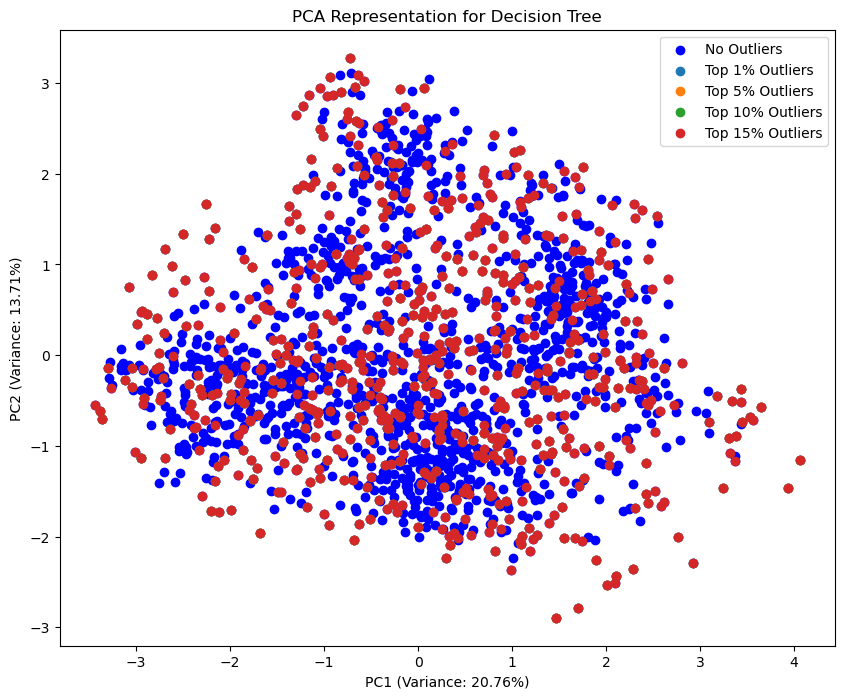

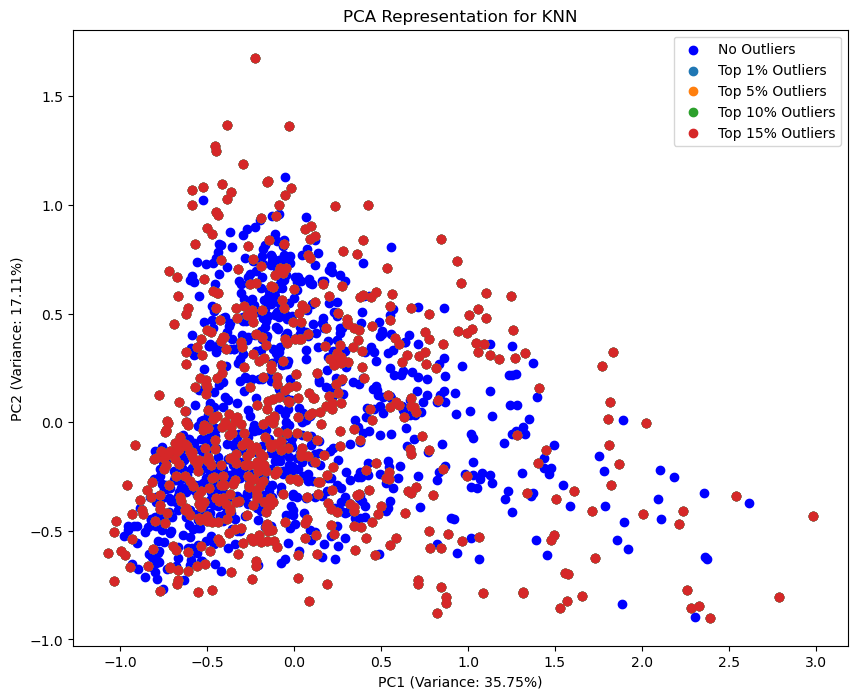

  Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0             1.0   21.0  0.998359  0.692308   0.778264  0.748397
1             5.0  116.0  0.980306  0.684295   0.776076  0.750000
2            10.0  364.0  0.930525  0.637821   0.773888  0.745192
3            15.0  663.0  0.884573  0.641026   0.756382  0.740385
4              No    0.0  0.998906  0.685897   0.778264  0.748397


In [7]:
# just Get PCA values
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the threshold values
threshold_values = [1, 5, 10, 15, None]  # None represents no outlier removal

# Create a table to store the results
results_table = pd.DataFrame(columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT', 'Train KNN', 'Test KNN'])

# Iterate over the threshold values
for threshold in threshold_values:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]
    inliers = np.where(in_degree > T)[0]

    # Remove the outliers from the training set for Decision Tree
    X_train_filtered_DT = X_train.iloc[inliers]
    y_train_filtered_DT = y_train.iloc[inliers]

    # Train a Decision Tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered_DT, y_train_filtered_DT)

    # Make predictions on the train set for Decision Tree
    y_train_pred_DT = dtc.predict(X_train)
    train_accuracy_DT = accuracy_score(y_train, y_train_pred_DT)

    # Make predictions on the test set for Decision Tree
    y_test_pred_DT = dtc.predict(X_test)
    test_accuracy_DT = accuracy_score(y_test, y_test_pred_DT)

    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]
    inliers_KNN = np.where(in_degree_KNN > T)[0]
-
    # Remove the outliers from the training set for KNN
    X_train_filtered_KNN = X_train_KNN.iloc[inliers_KNN]
    y_train_filtered_KNN = y_train_KNN.iloc[inliers_KNN]

    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_filtered_KNN, y_train_filtered_KNN)

    # Make predictions on the train set for KNN
    y_train_pred_KNN = knn.predict(X_train_KNN)
    train_accuracy_KNN = accuracy_score(y_train_KNN, y_train_pred_KNN)

    # Make predictions on the test set for KNN
    y_test_pred_KNN = knn.predict(X_test_KNN)
    test_accuracy_KNN = accuracy_score(y_test_KNN, y_test_pred_KNN)

    # Add the results to the table
    if threshold is not None:
        results_table = results_table.append({'Threshold Elim.': threshold,
                                              'Obs.': len(outliers),
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)
    else:
        results_table = results_table.append({'Threshold Elim.': 'No',
                                              'Obs.': 0,
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)

# Generate PCA representation for Decision Tree
pca_DT = PCA(n_components=2)
pca_data_DT = pca_DT.fit_transform(X_train)

# Generate PCA representation for KNN
pca_KNN = PCA(n_components=2)
pca_data_KNN = pca_KNN.fit_transform(X_train_KNN)

# Plot PCA representation for Decision Tree
plt.figure(figsize=(10, 8))
plt.scatter(pca_data_DT[:, 0], pca_data_DT[:, 1], color='blue', label='No Outliers')

# Iterate over the threshold values
for threshold in threshold_values[:-1]:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]

    # Generate PCA representation for outliers
    pca_data_outliers_DT = pca_DT.transform(X_train.iloc[outliers])
    label = f'Top {threshold}% Outliers' if threshold is not None else 'All Outliers'
    plt.scatter(pca_data_outliers_DT[:, 0], pca_data_outliers_DT[:, 1], label=label)

plt.title('PCA Representation for Decision Tree')
plt.xlabel(f'PC1 (Variance: {round(pca_DT.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PC2 (Variance: {round(pca_DT.explained_variance_ratio_[1] * 100, 2)}%)')
plt.legend()
plt.show()

# Plot PCA representation for KNN
plt.figure(figsize=(10, 8))
plt.scatter(pca_data_KNN[:, 0], pca_data_KNN[:, 1], color='blue', label='No Outliers')

# Iterate over the threshold values
for threshold in threshold_values[:-1]:
    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]

    # Generate PCA representation for outliers
    pca_data_outliers_KNN = pca_KNN.transform(X_train_KNN.iloc[outliers_KNN])
    label = f'Top {threshold}% Outliers' if threshold is not None else 'All Outliers'
    plt.scatter(pca_data_outliers_KNN[:, 0], pca_data_outliers_KNN[:, 1], label=label)

plt.title('PCA Representation for KNN')
plt.xlabel(f'PC1 (Variance: {round(pca_KNN.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PC2 (Variance: {round(pca_KNN.explained_variance_ratio_[1] * 100, 2)}%)')
plt.legend()
plt.show()

# Print the table
print(results_table)


# Final

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/4104121775.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/4104121775.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/4104121775.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/4104121775.py:88: FutureWarning: The frame.append method is deprecated and wi

  Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0             1.0   21.0  0.998359  0.692308   0.778264  0.748397
1             5.0  116.0  0.980306  0.684295   0.776076  0.750000
2            10.0  364.0  0.930525  0.637821   0.773888  0.745192
3            15.0  663.0  0.884573  0.641026   0.756382  0.740385
4              No    0.0  0.998906  0.685897   0.778264  0.748397


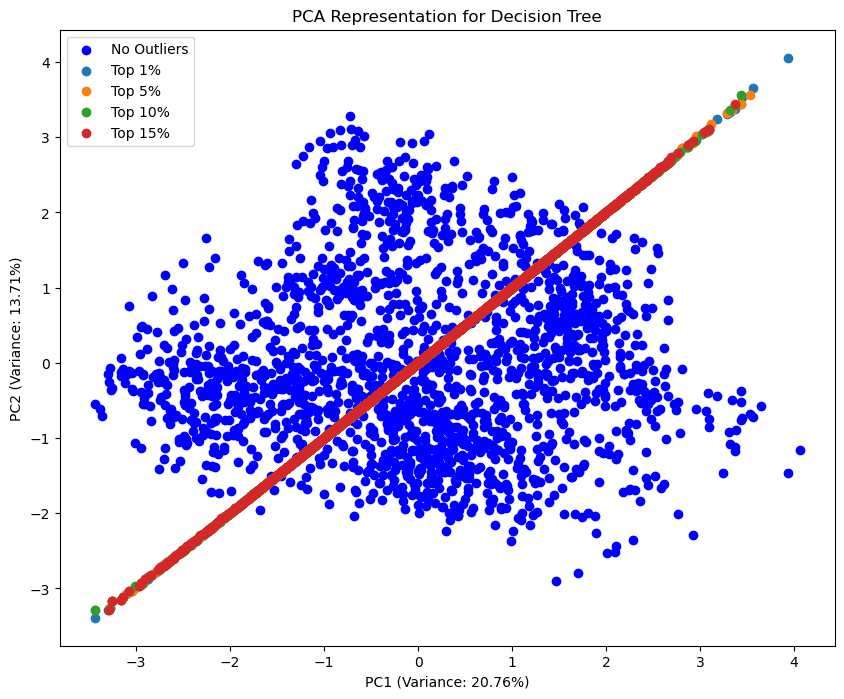

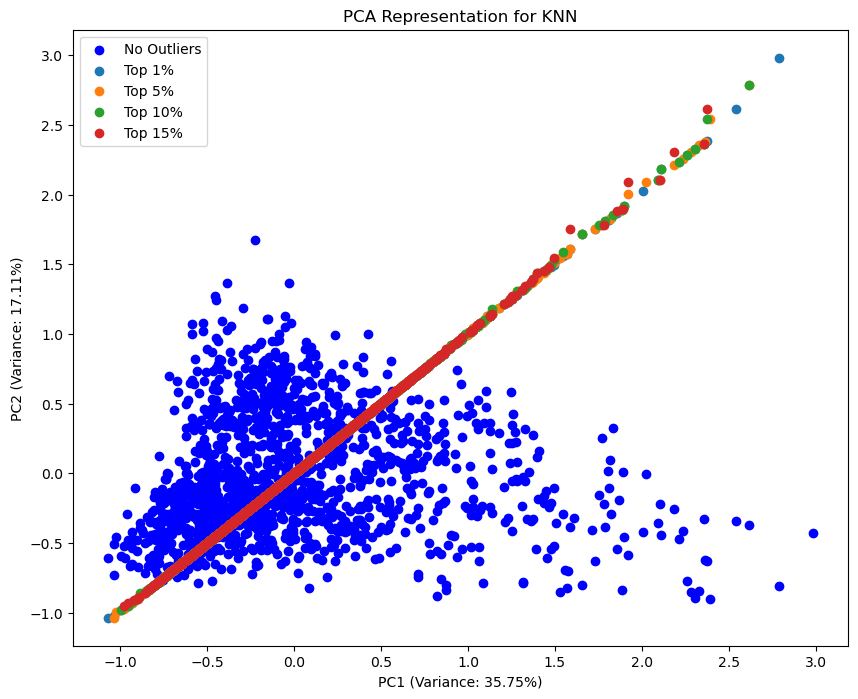

In [9]:
# FINAL 2D

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the threshold values
threshold_values = [1, 5, 10, 15, None]  # None represents no outlier removal

# Create a table to store the results
results_table = pd.DataFrame(
    columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT', 'Train KNN', 'Test KNN'])

# Initialize a dictionary to store PCA points for each threshold elimination
pca_points_DT = {}
pca_points_KNN = {}

# Iterate over the threshold values
for threshold in threshold_values:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]
    inliers = np.where(in_degree > T)[0]

    # Remove the outliers from the training set for Decision Tree
    X_train_filtered_DT = X_train.iloc[inliers]
    y_train_filtered_DT = y_train.iloc[inliers]

    # Train a Decision Tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered_DT, y_train_filtered_DT)

    # Make predictions on the train set for Decision Tree
    y_train_pred_DT = dtc.predict(X_train)
    train_accuracy_DT = accuracy_score(y_train, y_train_pred_DT)

    # Make predictions on the test set for Decision Tree
    y_test_pred_DT = dtc.predict(X_test)
    test_accuracy_DT = accuracy_score(y_test, y_test_pred_DT)

    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]
    inliers_KNN = np.where(in_degree_KNN > T)[0]

    # Remove the outliers from the training set for KNN
    X_train_filtered_KNN = X_train_KNN.iloc[inliers_KNN]
    y_train_filtered_KNN = y_train_KNN.iloc[inliers_KNN]

    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_filtered_KNN, y_train_filtered_KNN)

    # Make predictions on the train set for KNN
    y_train_pred_KNN = knn.predict(X_train_KNN)
    train_accuracy_KNN = accuracy_score(y_train_KNN, y_train_pred_KNN)

    # Make predictions on the test set for KNN
    y_test_pred_KNN = knn.predict(X_test_KNN)
    test_accuracy_KNN = accuracy_score(y_test_KNN, y_test_pred_KNN)

    # Add the results to the table
    if threshold is not None:
        results_table = results_table.append({'Threshold Elim.': threshold,
                                              'Obs.': len(outliers),
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)
        # Store the PCA points for the current threshold elimination for Decision Tree
        pca_points_DT[threshold] = pca_data_DT[outliers]

        # Store the PCA points for the current threshold elimination for KNN
        pca_points_KNN[threshold] = pca_data_KNN[outliers_KNN]
    else:
        results_table = results_table.append({'Threshold Elim.': 'No',
                                              'Obs.': 0,
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)

# Print the table
print(results_table)

# Remove overlapping points from PCA points for Decision Tree
no_outliers_DT = np.vstack((pca_data_DT, pca_points_DT[1], pca_points_DT[5], pca_points_DT[10], pca_points_DT[15]))
no_outliers_DT = np.unique(no_outliers_DT, axis=0)
pca_points_DT[1] = np.setxor1d(pca_points_DT[1], no_outliers_DT)
pca_points_DT[5] = np.setxor1d(pca_points_DT[5], no_outliers_DT)
pca_points_DT[10] = np.setxor1d(pca_points_DT[10], no_outliers_DT)
pca_points_DT[15] = np.setxor1d(pca_points_DT[15], no_outliers_DT)

# Remove overlapping points from PCA points for KNN
no_outliers_KNN = np.vstack((pca_data_KNN, pca_points_KNN[1], pca_points_KNN[5], pca_points_KNN[10], pca_points_KNN[15]))
no_outliers_KNN = np.unique(no_outliers_KNN, axis=0)
pca_points_KNN[1] = np.setxor1d(pca_points_KNN[1], no_outliers_KNN)
pca_points_KNN[5] = np.setxor1d(pca_points_KNN[5], no_outliers_KNN)
pca_points_KNN[10] = np.setxor1d(pca_points_KNN[10], no_outliers_KNN)
pca_points_KNN[15] = np.setxor1d(pca_points_KNN[15], no_outliers_KNN)


# # Reshape the points array to have two columns
# points = points.reshape(-1, 2)

# Plot PCA representation for Decision Tree
plt.figure(figsize=(10, 8))
plt.scatter(pca_data_DT[:, 0], pca_data_DT[:, 1], color='blue', label='No Outliers')
for threshold, points in pca_points_DT.items():
    points = points.reshape(-1, 2)  # Reshape points to have two columns
    plt.scatter(points[:, 0], points[:, 1], label=f'Top {threshold}%')
plt.title('PCA Representation for Decision Tree')
plt.xlabel(f'PC1 (Variance: {round(pca_DT.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PC2 (Variance: {round(pca_DT.explained_variance_ratio_[1] * 100, 2)}%)')
plt.legend()
plt.show()

# Plot PCA representation for KNN
plt.figure(figsize=(10, 8))
plt.scatter(pca_data_KNN[:, 0], pca_data_KNN[:, 1], color='blue', label='No Outliers')
for threshold, points in pca_points_KNN.items():
    points = points.reshape(-1, 2)  # Reshape points to have two columns
    plt.scatter(points[:, 0], points[:, 1], label=f'Top {threshold}%')
plt.title('PCA Representation for KNN')
plt.xlabel(f'PC1 (Variance: {round(pca_KNN.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PC2 (Variance: {round(pca_KNN.explained_variance_ratio_[1] * 100, 2)}%)')
plt.legend()
plt.show()






In [10]:
pca_points_DT

{1: array([-3.43692039, -3.38896627, -3.295024  , ...,  3.64995551,
         3.93046087,  4.0566503 ]),
 5: array([-3.43692039, -3.2922958 , -3.28114602, ...,  3.44332107,
         3.53283949,  3.56074016]),
 10: array([-3.43692039, -3.2922958 , -3.28114602, ...,  3.42992364,
         3.4385845 ,  3.56074016]),
 15: array([-3.2922958 , -3.28114602, -3.25691612, ...,  3.11127659,
         3.37179843,  3.4385845 ])}

In [12]:
pca_points_KNN

{1: array([-1.06951766, -1.03576253, -1.03564252, ...,  2.61357017,
         2.78837909,  2.98278283]),
 5: array([-1.03576253, -1.03564252, -1.02221228, ...,  2.54383468,
         2.61357017,  2.78837909]),
 10: array([-0.99638779, -0.97716733, -0.95446323, ...,  2.54383468,
         2.61357017,  2.78837909]),
 15: array([-0.97716733, -0.95446323, -0.95314051, ...,  2.36250617,
         2.37525567,  2.61357017])}

In [31]:
# FINAL 2D

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the threshold values
threshold_values = [1, 5, 10, 15, None]  # None represents no outlier removal

# Create a table to store the results
results_table = pd.DataFrame(
    columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT', 'Train KNN', 'Test KNN'])

# Initialize a dictionary to store PCA points for each threshold elimination
pca_points_DT = {}
pca_points_KNN = {}

# Iterate over the threshold values
for threshold in threshold_values:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]
    inliers = np.where(in_degree > T)[0]

    # Remove the outliers from the training set for Decision Tree
    X_train_filtered_DT = X_train.iloc[inliers]
    y_train_filtered_DT = y_train.iloc[inliers]

    # Train a Decision Tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered_DT, y_train_filtered_DT)

    # Make predictions on the train set for Decision Tree
    y_train_pred_DT = dtc.predict(X_train)
    train_accuracy_DT = accuracy_score(y_train, y_train_pred_DT)

    # Make predictions on the test set for Decision Tree
    y_test_pred_DT = dtc.predict(X_test)
    test_accuracy_DT = accuracy_score(y_test, y_test_pred_DT)

    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]
    inliers_KNN = np.where(in_degree_KNN > T)[0]

    # Remove the outliers from the training set for KNN
    X_train_filtered_KNN = X_train_KNN.iloc[inliers_KNN]
    y_train_filtered_KNN = y_train_KNN.iloc[inliers_KNN]

    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_filtered_KNN, y_train_filtered_KNN)

    # Make predictions on the train set for KNN
    y_train_pred_KNN = knn.predict(X_train_KNN)
    train_accuracy_KNN = accuracy_score(y_train_KNN, y_train_pred_KNN)

    # Make predictions on the test set for KNN
    y_test_pred_KNN = knn.predict(X_test_KNN)
    test_accuracy_KNN = accuracy_score(y_test_KNN, y_test_pred_KNN)

    # Add the results to the table
    if threshold is not None:
        results_table = results_table.append({'Threshold Elim.': threshold,
                                              'Obs.': len(outliers),
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)
        # Store the PCA points for the current threshold elimination for Decision Tree
        pca_points_DT[threshold] = pca_data_DT[outliers]

        # Store the PCA points for the current threshold elimination for KNN
        pca_points_KNN[threshold] = pca_data_KNN[outliers_KNN]
    else:
        results_table = results_table.append({'Threshold Elim.': 'No',
                                              'Obs.': 0,
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)

# Print the table
print(results_table)

# Remove overlapping points from PCA points for Decision Tree
no_outliers_DT = np.vstack((pca_data_DT, pca_points_DT[1], pca_points_DT[5], pca_points_DT[10], pca_points_DT[15]))
no_outliers_DT = np.unique(no_outliers_DT, axis=0)

top_15_DT = [value for value in pca_points_DT[15]]
top_10_DT = [value for value in pca_points_DT[10]]
top_5_DT = [value for value in pca_points_DT[5]]
top_1_DT = [value for value in pca_points_DT[1]]

not_top_15_DT = np.setdiff1d(top_15_DT, no_outliers_DT)
not_top_10_DT = np.setdiff1d(top_10_DT, top_15_DT)
not_top_5_DT = np.setdiff1d(top_5_DT, top_10_DT)
not_top_1_DT = np.setdiff1d(top_1_DT, top_5_DT)


# # Remove overlapping points from PCA points for KNN
# no_outliers_KNN = np.vstack((pca_data_KNN, pca_points_KNN[1], pca_points_KNN[5], pca_points_KNN[10], pca_points_KNN[15]))
# no_outliers_KNN = np.unique(no_outliers_KNN, axis=0)

# top_15_KNN = [value for value in pca_points_KNN[15]]
# top_10_KNN = [value for value in pca_points_KNN[10]]
# top_5_KNN = [value for value in pca_points_KNN[5]]
# top_1_KNN = [value for value in pca_points_KNN[1]]

# not_top_15_KNN = np.setdiff1d(pca_points_KNN[15], no_outliers_KNN)
# not_top_10_KNN = np.setdiff1d(pca_points_KNN[10], pca_points_KNN[15])
# not_top_5_KNN = np.setdiff1d(pca_points_KNN[5], pca_points_KNN[10])
# not_top_1_KNN = np.setdiff1d(np.arange(len(pca_points_KNN[1])), pca_points_KNN[5])


# # Reshape the points array to have two columns
# points = points.reshape(-1, 2)

# Plot PCA representation for Decision Tree
# plt.figure(figsize=(10, 8))
# plt.scatter(pca_data_DT[:, 0], pca_data_DT[:, 1], color='blue', label='No Outliers')
# for threshold, points in pca_points_DT.items():
#     points = points.reshape(-1, 2)  # Reshape points to have two columns
#     plt.scatter(points[:, 0], points[:, 1], label=f'Top {threshold}%')
# plt.title('PCA Representation for Decision Tree')
# plt.xlabel(f'PC1 (Variance: {round(pca_DT.explained_variance_ratio_[0] * 100, 2)}%)')
# plt.ylabel(f'PC2 (Variance: {round(pca_DT.explained_variance_ratio_[1] * 100, 2)}%)')
# plt.legend()
# plt.show()

# # Plot PCA representation for KNN
# plt.figure(figsize=(10, 8))
# plt.scatter(pca_data_KNN[:, 0], pca_data_KNN[:, 1], color='blue', label='No Outliers')
# for threshold, points in pca_points_KNN.items():
#     points = points.reshape(-1, 2)  # Reshape points to have two columns
#     plt.scatter(points[:, 0], points[:, 1], label=f'Top {threshold}%')
# plt.title('PCA Representation for KNN')
# plt.xlabel(f'PC1 (Variance: {round(pca_KNN.explained_variance_ratio_[0] * 100, 2)}%)')
# plt.ylabel(f'PC2 (Variance: {round(pca_KNN.explained_variance_ratio_[1] * 100, 2)}%)')
# plt.legend()
# plt.show()






/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/3325420778.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/3325420778.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/3325420778.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/3325420778.py:88: FutureWarning: The frame.append method is deprecated and wi

  Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0             1.0   21.0  0.998359  0.692308   0.778264  0.748397
1             5.0  116.0  0.980306  0.684295   0.776076  0.750000
2            10.0  364.0  0.930525  0.637821   0.773888  0.745192
3            15.0  663.0  0.884573  0.641026   0.756382  0.740385
4              No    0.0  0.998906  0.685897   0.778264  0.748397


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/3325420778.py:100: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': 'No',


In [34]:
pca_points_DT

{1: array([[-2.88656543,  0.45293543],
        [ 1.91957821, -1.0017661 ],
        [ 0.69721377, -0.8545882 ],
        [ 0.08473046,  1.39189938],
        [ 0.58610311, -0.93235065],
        [ 2.10770222, -2.43911313],
        [ 2.61085813, -0.14532224],
        [-0.97154207, -1.15071581],
        [-0.19468817,  0.63467265],
        [-0.19233047, -1.16200284],
        [-2.94766836, -1.13816984],
        [-3.35889698, -0.70535315],
        [-1.76843332,  0.97786077],
        [ 0.24996311, -0.69781149],
        [ 0.9802645 ,  0.26614029],
        [ 1.37261394, -0.1731455 ],
        [ 2.0251279 , -1.10957073],
        [-2.32476749, -0.37052091],
        [-1.75171628, -1.36449999],
        [-1.70042161, -0.65937645],
        [ 1.09333131, -2.08400486]]),
 5: array([[-2.88656543e+00,  4.52935432e-01],
        [-2.91281975e+00, -4.70414633e-01],
        [ 1.91957821e+00, -1.00176610e+00],
        [ 4.05665030e+00, -1.15342043e+00],
        [ 6.97213771e-01, -8.54588199e-01],
        [-8.4303

In [14]:
CAT_DT = [
    'vocal_channel',
    'emotion_0',
    'emotion_1',
    'emotion_2',
    'emotion_3',
    'emotion_4',
    'emotion_5',
    'emotion_6',
    'emotion_7',
    'statement',
    'repetition',
    'sex',
]


num = [i for i in X_train.columns if i not in CAT_DT]

In [18]:
X_test_num = X_test[num]
X_train_num = X_train[num]

In [24]:
top1_DT = pca_points_DT[1]
top1_KNN = pca_points_KNN[1]

In [ ]:
# Plotting PCA for 2nd and 3d plot

KeyError: "None of [Index([(-2.8865654268853977, 0.45293543227582683),\n           (1.91957821318872, -1.001766104141325),\n         (0.697213771460916, -0.8545881988744549),\n        (0.08473046284589614, 1.3918993829906803),\n        (0.5861031132927942, -0.9323506541625647),\n           (2.10770222409289, -2.439113132393531),\n         (2.61085812936024, -0.14532224054155266),\n       (-0.9715420682281709, -1.1507158129232942),\n       (-0.19468816585557783, 0.6346726531768311),\n        (-0.1923304746013295, -1.162002844734415),\n        (-2.947668364426133, -1.1381698351489766),\n       (-3.3588969848158268, -0.7053531496009077),\n        (-1.7684333232126654, 0.9778607735492875),\n        (0.2499631109835927, -0.6978114883376724),\n        (0.9802644962447689, 0.26614028599980416),\n       (1.3726139401178548, -0.17314549636537055),\n         (2.0251279002148843, -1.109570732789186),\n       (-2.324767491364679, -0.37052091157064243),\n        (-1.751716279951003, -1.3644999936850963),\n       (-1.7004216105860999, -0.6593764549079743),\n         (1.0933313103010196, -2.084004855514499)],\n      dtype='object')] are in the [index]"

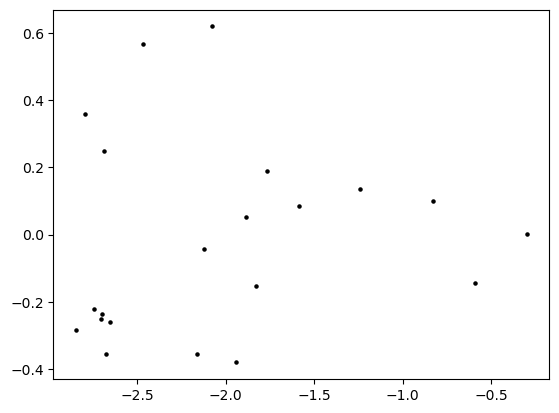

In [32]:
pca = PCA(n_components = 3)
pca.fit(X_train_num)
df_pca = pd.DataFrame(pca.transform(X_train_num), columns=['PC1', 'PC2', 'PC3'])


# plot all points and a legend for the top 5%, 10% and 15% 
plt.scatter(df_pca['PC1'][not_top_15_DT], df_pca['PC2'][not_top_15_DT], c='yellow', s=1, label='All Points')
plt.scatter(df_pca['PC1'][not_top_10_DT], df_pca['PC2'][not_top_10_DT], c='green', s=5, label='Top 15%')
plt.scatter(df_pca['PC1'][not_top_5_DT], df_pca['PC2'][not_top_5_DT], c='red', s=5, label='Top 10%')
plt.scatter(df_pca['PC1'][not_top_1_DT], df_pca['PC2'][not_top_1_DT], c='black', s=5, label='Top 5%')
plt.scatter(df_pca['PC1'][top_1_DT], df_pca['PC2'][top_1_DT], c='blue', s=10, label='Top 1%')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
plt.close()




fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'][not_top_15_DT], df_pca['PC2'][not_top_15_DT], df_pca['PC3'][not_top_15_DT], c='yellow', s=1, label='All Points')
ax.scatter(df_pca['PC1'][not_top_10_DT], df_pca['PC2'][not_top_10_DT], df_pca['PC3'][not_top_10_DT], c='green', s=5, label='Top 15% outliers')
ax.scatter(df_pca['PC1'][not_top_5_DT], df_pca['PC2'][not_top_5_DT], df_pca['PC3'][not_top_5_DT], c='red', s=5, label='Top 10% outliers')
ax.scatter(df_pca['PC1'][not_top_1_DT], df_pca['PC2'][not_top_1_DT], df_pca['PC3'][not_top_1_DT], c='black', s=5, label='Top 5% outliers')
ax.scatter(df_pca['PC1'][top_1_DT], df_pca['PC2'][top_1_DT], df_pca['PC3'][top_1_DT], c='blue', s=10, label='Top 1% outliers')
ax.set_xlabel('PC1 0.23 of variance')
ax.set_ylabel('PC2 0.15 of variance' )
ax.set_zlabel('PC3 0.12 of variance')
plt.legend()
plt.show()
plt.close()

ValueError: Cannot index with multidimensional key

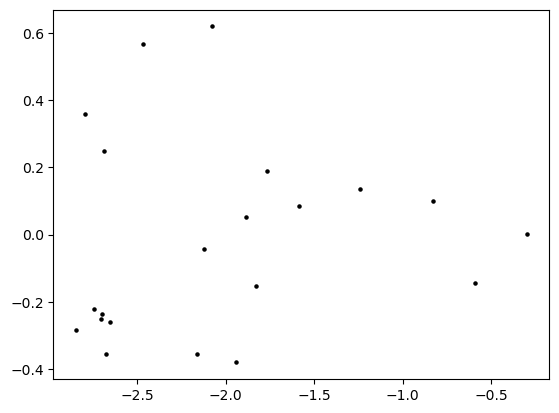

In [27]:
pca = PCA(n_components = 3)
pca.fit(X_train_num)
df_pca = pd.DataFrame(pca.transform(X_train_num), columns=['PC1', 'PC2', 'PC3'])


plt.scatter(df_pca['PC1'][not_top_15_DT], df_pca['PC2'][not_top_15_DT], c='yellow', s=1, label='All Points')
plt.scatter(df_pca['PC1'][not_top_10_DT], df_pca['PC2'][not_top_10_DT], c='green', s=5, label='Top 15% outliers')
plt.scatter(df_pca['PC1'][not_top_5_DT], df_pca['PC2'][not_top_5_DT], c='red', s=5, label='Top 10% outliers')
plt.scatter(df_pca['PC1'][not_top_1_DT], df_pca['PC2'][not_top_1_DT], c='black', s=5, label='Top 5% outliers')
plt.scatter(df_pca['PC1'][top1_DT], df_pca['PC2'][top1_DT], c='blue', s=10, label='Top 1% outliers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
plt.close()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'][not_top_15_DT], df_pca['PC2'][not_top_15_DT], df_pca['PC3'][not_top_15_DT], c='yellow', s=1, label='All Points')
ax.scatter(df_pca['PC1'][not_top_10_DT], df_pca['PC2'][not_top_10_DT], df_pca['PC3'][not_top_10_DT], c='green', s=5, label='Top 15% outliers')
ax.scatter(df_pca['PC1'][not_top_5_DT], df_pca['PC2'][not_top_5_DT], df_pca['PC3'][not_top_5_DT], c='red', s=5, label='Top 10% outliers')
ax.scatter(df_pca['PC1'][not_top_1_DT], df_pca['PC2'][not_top_1_DT], df_pca['PC3'][not_top_1_DT], c='black', s=5, label='Top 5% outliers')
ax.scatter(df_pca['PC1'][top1_DT], df_pca['PC2'][top1_DT], df_pca['PC3'][top1_DT], c='blue', s=10, label='Top 1% outliers')
ax.set_xlabel('PC1 (0.23 of variance)')
ax.set_ylabel('PC2 (0.15 of variance)')
ax.set_zlabel('PC3 (0.12 of variance)')
plt.legend()
plt.show()
plt.close()


In [30]:
top1_DT

array([[-2.88656543,  0.45293543],
       [ 1.91957821, -1.0017661 ],
       [ 0.69721377, -0.8545882 ],
       [ 0.08473046,  1.39189938],
       [ 0.58610311, -0.93235065],
       [ 2.10770222, -2.43911313],
       [ 2.61085813, -0.14532224],
       [-0.97154207, -1.15071581],
       [-0.19468817,  0.63467265],
       [-0.19233047, -1.16200284],
       [-2.94766836, -1.13816984],
       [-3.35889698, -0.70535315],
       [-1.76843332,  0.97786077],
       [ 0.24996311, -0.69781149],
       [ 0.9802645 ,  0.26614029],
       [ 1.37261394, -0.1731455 ],
       [ 2.0251279 , -1.10957073],
       [-2.32476749, -0.37052091],
       [-1.75171628, -1.36449999],
       [-1.70042161, -0.65937645],
       [ 1.09333131, -2.08400486]])

# Bernanrdo Code Reference

In [35]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the threshold values
threshold_values = [1, 5, 10, 15, None]  # None represents no outlier removal

# Create a table to store the results
results_table = pd.DataFrame(
    columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT', 'Train KNN', 'Test KNN'])

# Initialize a dictionary to store PCA points for each threshold elimination
pca_points_DT = {}
pca_points_KNN = {}

# Initialize lists to store outlier indices
outlier_indices_DT = []
outlier_indices_KNN = []

# Iterate over the threshold values
for threshold in threshold_values:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]
    outlier_indices_DT.extend(outliers.tolist())

    # Remove the outliers from the training set for Decision Tree
    X_train_filtered_DT = X_train.iloc[inliers]
    y_train_filtered_DT = y_train.iloc[inliers]

    # Train a Decision Tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered_DT, y_train_filtered_DT)

    # Make predictions on the train set for Decision Tree
    y_train_pred_DT = dtc.predict(X_train)
    train_accuracy_DT = accuracy_score(y_train, y_train_pred_DT)

    # Make predictions on the test set for Decision Tree
    y_test_pred_DT = dtc.predict(X_test)
    test_accuracy_DT = accuracy_score(y_test, y_test_pred_DT)

    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]
    outlier_indices_KNN.extend(outliers_KNN.tolist())

    # Remove the outliers from the training set for KNN
    X_train_filtered_KNN = X_train_KNN.iloc[inliers_KNN]
    y_train_filtered_KNN = y_train_KNN.iloc[inliers_KNN]

    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_filtered_KNN, y_train_filtered_KNN)

    # Make predictions on the train set for KNN
    y_train_pred_KNN = knn.predict(X_train_KNN)
    train_accuracy_KNN = accuracy_score(y_train_KNN, y_train_pred_KNN)

    # Make predictions on the test set for KNN
    y_test_pred_KNN = knn.predict(X_test_KNN)
    test_accuracy_KNN = accuracy_score(y_test_KNN, y_test_pred_KNN)

    # Add the results to the table
    if threshold is not None:
        results_table = results_table.append({'Threshold Elim.': threshold,
                                              'Obs.': len(outliers),
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)
        # Store the PCA points for the current threshold elimination for Decision Tree
        pca_points_DT[threshold] = pca_data_DT[outliers]

        # Store the PCA points for the current threshold elimination for KNN
        pca_points_KNN[threshold] = pca_data_KNN[outliers_KNN]
    else:
        results_table = results_table.append({'Threshold Elim.': 'No',
                                              'Obs.': 0,
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)

# Print the table
print(results_table)

# Print the list of outlier indices for Decision Tree
print("Outlier indices for Decision Tree:", outlier_indices_DT)

# Print the list of outlier indices for KNN
print("Outlier indices for KNN:", outlier_indices_KNN)


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/1476486339.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/1476486339.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/1476486339.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/1476486339.py:90: FutureWarning: The frame.append method is deprecated and wi

  Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0             1.0   21.0  0.998906  0.685897   0.778264  0.748397
1             5.0  116.0  0.998906  0.685897   0.778264  0.748397
2            10.0  364.0  0.998906  0.685897   0.778264  0.748397
3            15.0  663.0  0.998906  0.685897   0.778264  0.748397
4              No    0.0  0.998906  0.685897   0.778264  0.748397
Outlier indices for Decision Tree: [0, 33, 40, 223, 234, 292, 382, 633, 683, 698, 832, 841, 843, 927, 1204, 1206, 1241, 1296, 1512, 1678, 1738, 0, 8, 33, 35, 40, 44, 46, 176, 177, 216, 223, 229, 234, 235, 243, 292, 308, 309, 314, 315, 324, 332, 352, 361, 382, 403, 425, 426, 467, 512, 525, 532, 533, 544, 545, 546, 554, 563, 564, 589, 614, 633, 650, 683, 698, 701, 718, 755, 832, 840, 841, 843, 854, 856, 868, 869, 870, 884, 909, 910, 911, 927, 942, 984, 987, 1029, 1067, 1089, 1160, 1161, 1170, 1176, 1204, 1206, 1231, 1240, 1241, 1247, 1283, 1296, 1360, 1367, 1398, 1421, 1441, 1454, 1480, 1481, 1488, 

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/1476486339.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': 'No',


In [36]:
outlier_indices_DT

[0,
 33,
 40,
 223,
 234,
 292,
 382,
 633,
 683,
 698,
 832,
 841,
 843,
 927,
 1204,
 1206,
 1241,
 1296,
 1512,
 1678,
 1738,
 0,
 8,
 33,
 35,
 40,
 44,
 46,
 176,
 177,
 216,
 223,
 229,
 234,
 235,
 243,
 292,
 308,
 309,
 314,
 315,
 324,
 332,
 352,
 361,
 382,
 403,
 425,
 426,
 467,
 512,
 525,
 532,
 533,
 544,
 545,
 546,
 554,
 563,
 564,
 589,
 614,
 633,
 650,
 683,
 698,
 701,
 718,
 755,
 832,
 840,
 841,
 843,
 854,
 856,
 868,
 869,
 870,
 884,
 909,
 910,
 911,
 927,
 942,
 984,
 987,
 1029,
 1067,
 1089,
 1160,
 1161,
 1170,
 1176,
 1204,
 1206,
 1231,
 1240,
 1241,
 1247,
 1283,
 1296,
 1360,
 1367,
 1398,
 1421,
 1441,
 1454,
 1480,
 1481,
 1488,
 1512,
 1546,
 1597,
 1678,
 1703,
 1704,
 1707,
 1714,
 1715,
 1736,
 1738,
 1757,
 1758,
 1759,
 1765,
 1797,
 1801,
 1802,
 1803,
 1805,
 1813,
 1814,
 1816,
 1817,
 1818,
 1819,
 1827,
 0,
 1,
 2,
 3,
 5,
 8,
 11,
 13,
 17,
 22,
 28,
 33,
 35,
 36,
 40,
 44,
 45,
 46,
 49,
 53,
 55,
 59,
 76,
 78,
 79,
 92,
 165,
 17

In [37]:
# Function to return top outliers based on percentages
def get_top_outliers(outlier_indices, percentage):
    num_outliers = len(outlier_indices)
    num_top = int(np.ceil(num_outliers * (percentage / 100)))
    top_outliers = outlier_indices[:num_top]
    return top_outliers

# Calculate the top outliers based on percentages
top_10 = get_top_outliers(outlier_indices_DT, 10)
top_5 = get_top_outliers(outlier_indices_DT, 5)
top_1 = get_top_outliers(outlier_indices_DT, 1)

# Print the table
print(results_table)

# Print the list of outlier indices for Decision Tree
print("Outlier indices for Decision Tree:", outlier_indices_DT)

# Print the top outliers
print("Top 10% outliers:", top_10)
print("Top 5% outliers:", top_5)
print("Top 1% outliers:", top_1)


  Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0             1.0   21.0  0.998906  0.685897   0.778264  0.748397
1             5.0  116.0  0.998906  0.685897   0.778264  0.748397
2            10.0  364.0  0.998906  0.685897   0.778264  0.748397
3            15.0  663.0  0.998906  0.685897   0.778264  0.748397
4              No    0.0  0.998906  0.685897   0.778264  0.748397
Outlier indices for Decision Tree: [0, 33, 40, 223, 234, 292, 382, 633, 683, 698, 832, 841, 843, 927, 1204, 1206, 1241, 1296, 1512, 1678, 1738, 0, 8, 33, 35, 40, 44, 46, 176, 177, 216, 223, 229, 234, 235, 243, 292, 308, 309, 314, 315, 324, 332, 352, 361, 382, 403, 425, 426, 467, 512, 525, 532, 533, 544, 545, 546, 554, 563, 564, 589, 614, 633, 650, 683, 698, 701, 718, 755, 832, 840, 841, 843, 854, 856, 868, 869, 870, 884, 909, 910, 911, 927, 942, 984, 987, 1029, 1067, 1089, 1160, 1161, 1170, 1176, 1204, 1206, 1231, 1240, 1241, 1247, 1283, 1296, 1360, 1367, 1398, 1421, 1441, 1454, 1480, 1481, 1488, 

In [38]:
top_10

[0,
 33,
 40,
 223,
 234,
 292,
 382,
 633,
 683,
 698,
 832,
 841,
 843,
 927,
 1204,
 1206,
 1241,
 1296,
 1512,
 1678,
 1738,
 0,
 8,
 33,
 35,
 40,
 44,
 46,
 176,
 177,
 216,
 223,
 229,
 234,
 235,
 243,
 292,
 308,
 309,
 314,
 315,
 324,
 332,
 352,
 361,
 382,
 403,
 425,
 426,
 467,
 512,
 525,
 532,
 533,
 544,
 545,
 546,
 554,
 563,
 564,
 589,
 614,
 633,
 650,
 683,
 698,
 701,
 718,
 755,
 832,
 840,
 841,
 843,
 854,
 856,
 868,
 869,
 870,
 884,
 909,
 910,
 911,
 927,
 942,
 984,
 987,
 1029,
 1067,
 1089,
 1160,
 1161,
 1170,
 1176,
 1204,
 1206,
 1231,
 1240,
 1241,
 1247,
 1283,
 1296,
 1360,
 1367,
 1398,
 1421,
 1441,
 1454,
 1480,
 1481,
 1488,
 1512,
 1546,
 1597,
 1678,
 1703,
 1704,
 1707,
 1714]

# DT

In [56]:
# FINAL TRY
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the threshold values
threshold_values = [1, 5, 10, 15, None]  # None represents no outlier removal

# Create a table to store the results
results_table = pd.DataFrame(
    columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT', 'Train KNN', 'Test KNN'])

# Initialize a dictionary to store PCA points for each threshold elimination
pca_points_DT = {}
pca_points_KNN = {}

# Initialize lists to store outlier indices
outlier_indices_DT = []
outlier_indices_KNN = []
no_outliers_indices_DT = []
no_outliers_indices_KNN = []

# Iterate over the threshold values
for threshold in threshold_values:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]
    outlier_indices_DT.extend(outliers.tolist())

    # Remove the outliers from the training set for Decision Tree
    X_train_filtered_DT = X_train.iloc[inliers]
    y_train_filtered_DT = y_train.iloc[inliers]

    # Train a Decision Tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered_DT, y_train_filtered_DT)

    # Make predictions on the train set for Decision Tree
    y_train_pred_DT = dtc.predict(X_train)
    train_accuracy_DT = accuracy_score(y_train, y_train_pred_DT)

    # Make predictions on the test set for Decision Tree
    y_test_pred_DT = dtc.predict(X_test)
    test_accuracy_DT = accuracy_score(y_test, y_test_pred_DT)

    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]
    outlier_indices_KNN.extend(outliers_KNN.tolist())

    # Remove the outliers from the training set for KNN
    X_train_filtered_KNN = X_train_KNN.iloc[inliers_KNN]
    y_train_filtered_KNN = y_train_KNN.iloc[inliers_KNN]

    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_filtered_KNN, y_train_filtered_KNN)

    # Make predictions on the train set for KNN
    y_train_pred_KNN = knn.predict(X_train_KNN)
    train_accuracy_KNN = accuracy_score(y_train_KNN, y_train_pred_KNN)

    # Make predictions on the test set for KNN
    y_test_pred_KNN = knn.predict(X_test_KNN)
    test_accuracy_KNN = accuracy_score(y_test_KNN, y_test_pred_KNN)

    # Add the results to the table
    if threshold is not None:
        results_table = results_table.append({'Threshold Elim.': threshold,
                                              'Obs.': len(outliers),
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)
        # Store the PCA points for the current threshold elimination for Decision Tree
        pca_points_DT[threshold] = pca_data_DT[outliers]

        # Store the PCA points for the current threshold elimination for KNN
        pca_points_KNN[threshold] = pca_data_KNN[outliers_KNN]
    else:
        results_table = results_table.append({'Threshold Elim.': 'No',
                                              'Obs.': 0,
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)

    # Add the indices of no outliers for Decision Tree
    no_outliers_DT = np.where(in_degree > T)[0]
    no_outliers_indices_DT.extend(no_outliers_DT.tolist())

    # Add the indices of no outliers for KNN
    no_outliers_KNN = np.where(in_degree_KNN > T)[0]
    no_outliers_indices_KNN.extend(no_outliers_KNN.tolist())

# Print the table
print(results_table)

# Print the list of outlier indices for Decision Tree
print("Outlier indices for Decision Tree:", outlier_indices_DT)

# Print the list of outlier indices for KNN
print("Outlier indices for KNN:", outlier_indices_KNN)

# Print the indices of no outliers for Decision Tree
print("Indices of no outliers for Decision Tree:", no_outliers_indices_DT)

# Print the indices of no outliers for KNN
print("Indices of no outliers for KNN:", no_outliers_indices_KNN)


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/3513556770.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/3513556770.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/3513556770.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/3513556770.py:93: FutureWarning: The frame.append method is deprecated and wi

  Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0             1.0   21.0  0.998906  0.685897   0.778264  0.748397
1             5.0  116.0  0.998906  0.685897   0.778264  0.748397
2            10.0  364.0  0.998906  0.685897   0.778264  0.748397
3            15.0  663.0  0.998906  0.685897   0.778264  0.748397
4              No    0.0  0.998906  0.685897   0.778264  0.748397
Outlier indices for Decision Tree: [0, 33, 40, 223, 234, 292, 382, 633, 683, 698, 832, 841, 843, 927, 1204, 1206, 1241, 1296, 1512, 1678, 1738, 0, 8, 33, 35, 40, 44, 46, 176, 177, 216, 223, 229, 234, 235, 243, 292, 308, 309, 314, 315, 324, 332, 352, 361, 382, 403, 425, 426, 467, 512, 525, 532, 533, 544, 545, 546, 554, 563, 564, 589, 614, 633, 650, 683, 698, 701, 718, 755, 832, 840, 841, 843, 854, 856, 868, 869, 870, 884, 909, 910, 911, 927, 942, 984, 987, 1029, 1067, 1089, 1160, 1161, 1170, 1176, 1204, 1206, 1231, 1240, 1241, 1247, 1283, 1296, 1360, 1367, 1398, 1421, 1441, 1454, 1480, 1481, 1488, 

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_62850/3513556770.py:105: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': 'No',


In [57]:
# Function to return top outliers based on percentages
def get_top_outliers(outlier_indices, percentage):
    num_outliers = len(outlier_indices)
    num_top = int(np.ceil(num_outliers * (percentage / 100)))
    top_outliers = outlier_indices[:num_top]
    return top_outliers

# Calculate the top outliers based on percentages
top_10 = get_top_outliers(outlier_indices_DT, 10)
top_5 = get_top_outliers(outlier_indices_DT, 5)
top_1 = get_top_outliers(outlier_indices_DT, 1)

# Print the table
print(results_table)

# Print the list of outlier indices for Decision Tree
print("Outlier indices for Decision Tree:", outlier_indices_DT)

# Print the top outliers
print("Top 10% outliers:", top_10)
print("Top 5% outliers:", top_5)
print("Top 1% outliers:", top_1)


  Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0             1.0   21.0  0.998906  0.685897   0.778264  0.748397
1             5.0  116.0  0.998906  0.685897   0.778264  0.748397
2            10.0  364.0  0.998906  0.685897   0.778264  0.748397
3            15.0  663.0  0.998906  0.685897   0.778264  0.748397
4              No    0.0  0.998906  0.685897   0.778264  0.748397
Outlier indices for Decision Tree: [0, 33, 40, 223, 234, 292, 382, 633, 683, 698, 832, 841, 843, 927, 1204, 1206, 1241, 1296, 1512, 1678, 1738, 0, 8, 33, 35, 40, 44, 46, 176, 177, 216, 223, 229, 234, 235, 243, 292, 308, 309, 314, 315, 324, 332, 352, 361, 382, 403, 425, 426, 467, 512, 525, 532, 533, 544, 545, 546, 554, 563, 564, 589, 614, 633, 650, 683, 698, 701, 718, 755, 832, 840, 841, 843, 854, 856, 868, 869, 870, 884, 909, 910, 911, 927, 942, 984, 987, 1029, 1067, 1089, 1160, 1161, 1170, 1176, 1204, 1206, 1231, 1240, 1241, 1247, 1283, 1296, 1360, 1367, 1398, 1421, 1441, 1454, 1480, 1481, 1488, 

In [58]:

not_top_10 = np.setdiff1d(outlier_indices_DT, top_10)
# get points in 10% but not in 5%
not_top_5 = np.setdiff1d(top_10, top_5)
# get points in 5% but not in 1%
not_top_1 = np.setdiff1d(top_5, top_1)

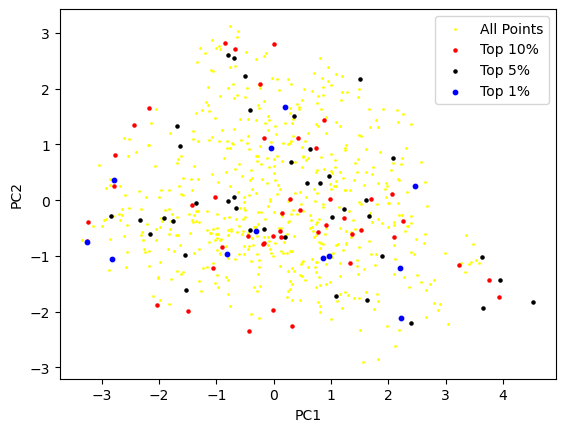

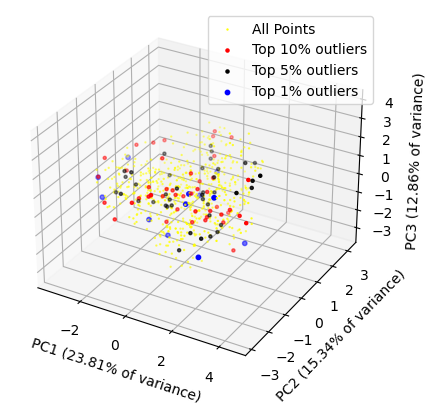

In [59]:
# plots for dt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

CAT_DT = [
    'vocal_channel',
    'emotion_0',
    'emotion_1',
    'emotion_2',
    'emotion_3',
    'emotion_4',
    'emotion_5',
    'emotion_6',
    'emotion_7',
    'statement',
    'repetition',
    'sex',
]


num = [i for i in X_train.columns if i not in CAT_DT]

# y_test = y_test['emotional_intensity']
# X_test = X_test.drop(['emotional_intensity'], axis=1)

X_test_num = X_test[num]
X_train_num = X_train[num]


pca = PCA(n_components = 3)
pca.fit(X_train_num)
df_pca = pd.DataFrame(pca.transform(X_train_num), columns=['PC1', 'PC2', 'PC3'])


# plot all points and a legend for the top 5%, 10% and 15% 
plt.scatter(df_pca['PC1'][not_top_10], df_pca['PC2'][not_top_10], c='yellow', s=1, label='All Points')
plt.scatter(df_pca['PC1'][not_top_5], df_pca['PC2'][not_top_5], c='red', s=5, label='Top 10%')
plt.scatter(df_pca['PC1'][not_top_1], df_pca['PC2'][not_top_1], c='black', s=5, label='Top 5%')
plt.scatter(df_pca['PC1'][top_1], df_pca['PC2'][top_1], c='blue', s=10, label='Top 1%')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
plt.close()




fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'][not_top_10], df_pca['PC2'][not_top_10], df_pca['PC3'][not_top_10], c='yellow', s=0.5, label='All Points')
ax.scatter(df_pca['PC1'][not_top_5], df_pca['PC2'][not_top_5], df_pca['PC3'][not_top_5], c='red', s=5, label='Top 10% outliers')
ax.scatter(df_pca['PC1'][not_top_1], df_pca['PC2'][not_top_1], df_pca['PC3'][not_top_1], c='black', s=5, label='Top 5% outliers')
ax.scatter(df_pca['PC1'][top_1], df_pca['PC2'][top_1], df_pca['PC3'][top_1], c='blue', s=10, label='Top 1% outliers')
ax.set_xlabel(f'PC1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}% of variance)')
ax.set_ylabel(f'PC2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}% of variance)')
ax.set_zlabel(f'PC3 ({round(pca.explained_variance_ratio_[2] * 100, 2)}% of variance)')
plt.legend()
plt.show()

# KNN

In [61]:
# Function to return top outliers based on percentages
def get_top_outliers(outlier_indices, percentage):
    num_outliers = len(outlier_indices)
    num_top = int(np.ceil(num_outliers * (percentage / 100)))
    top_outliers = outlier_indices[:num_top]
    return top_outliers

# Calculate the top outliers based on percentages
top_10 = get_top_outliers(outlier_indices_KNN, 10)
top_5 = get_top_outliers(outlier_indices_KNN, 5)
top_1 = get_top_outliers(outlier_indices_KNN, 1)

# Print the table
print(results_table)

# Print the list of outlier indices for Decision Tree
print("Outlier indices for Decision Tree:", outlier_indices_DT)

# Print the top outliers
print("Top 10% outliers:", top_10)
print("Top 5% outliers:", top_5)
print("Top 1% outliers:", top_1)


  Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0             1.0   21.0  0.998906  0.685897   0.778264  0.748397
1             5.0  116.0  0.998906  0.685897   0.778264  0.748397
2            10.0  364.0  0.998906  0.685897   0.778264  0.748397
3            15.0  663.0  0.998906  0.685897   0.778264  0.748397
4              No    0.0  0.998906  0.685897   0.778264  0.748397
Outlier indices for Decision Tree: [0, 33, 40, 223, 234, 292, 382, 633, 683, 698, 832, 841, 843, 927, 1204, 1206, 1241, 1296, 1512, 1678, 1738, 0, 8, 33, 35, 40, 44, 46, 176, 177, 216, 223, 229, 234, 235, 243, 292, 308, 309, 314, 315, 324, 332, 352, 361, 382, 403, 425, 426, 467, 512, 525, 532, 533, 544, 545, 546, 554, 563, 564, 589, 614, 633, 650, 683, 698, 701, 718, 755, 832, 840, 841, 843, 854, 856, 868, 869, 870, 884, 909, 910, 911, 927, 942, 984, 987, 1029, 1067, 1089, 1160, 1161, 1170, 1176, 1204, 1206, 1231, 1240, 1241, 1247, 1283, 1296, 1360, 1367, 1398, 1421, 1441, 1454, 1480, 1481, 1488, 

In [62]:

not_top_10 = np.setdiff1d(outlier_indices_KNN, top_10)
# get points in 10% but not in 5%
not_top_5 = np.setdiff1d(top_10, top_5)
# get points in 5% but not in 1%
not_top_1 = np.setdiff1d(top_5, top_1)

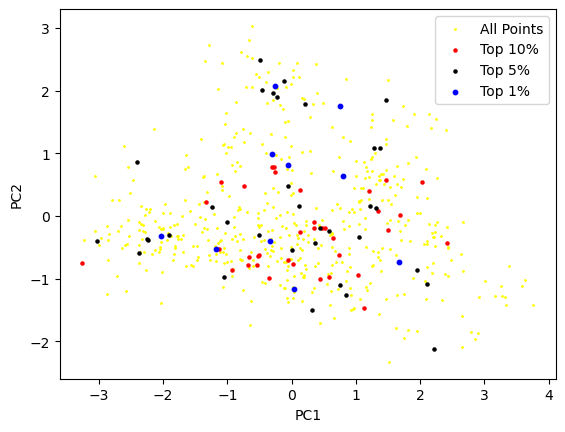

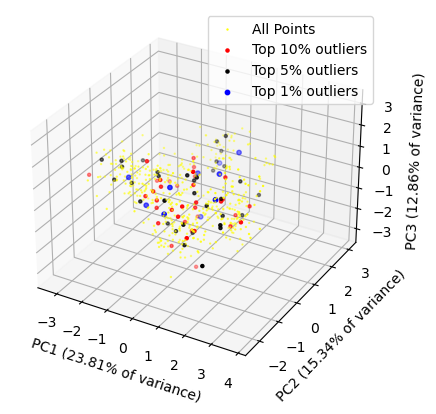

In [63]:
# plots for dt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

CAT_DT = [
    'vocal_channel',
    'emotion_0',
    'emotion_1',
    'emotion_2',
    'emotion_3',
    'emotion_4',
    'emotion_5',
    'emotion_6',
    'emotion_7',
    'statement',
    'repetition',
    'sex',
]


num = [i for i in X_train.columns if i not in CAT_DT]

# y_test = y_test['emotional_intensity']
# X_test = X_test.drop(['emotional_intensity'], axis=1)

X_test_num = X_test[num]
X_train_num = X_train[num]


pca = PCA(n_components = 3)
pca.fit(X_train_num)
df_pca = pd.DataFrame(pca.transform(X_train_num), columns=['PC1', 'PC2', 'PC3'])


# plot all points and a legend for the top 5%, 10% and 15% 
plt.scatter(df_pca['PC1'][not_top_10], df_pca['PC2'][not_top_10], c='yellow', s=1, label='All Points')
plt.scatter(df_pca['PC1'][not_top_5], df_pca['PC2'][not_top_5], c='red', s=5, label='Top 10%')
plt.scatter(df_pca['PC1'][not_top_1], df_pca['PC2'][not_top_1], c='black', s=5, label='Top 5%')
plt.scatter(df_pca['PC1'][top_1], df_pca['PC2'][top_1], c='blue', s=10, label='Top 1%')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
plt.close()




fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'][not_top_10], df_pca['PC2'][not_top_10], df_pca['PC3'][not_top_10], c='yellow', s=0.5, label='All Points')
ax.scatter(df_pca['PC1'][not_top_5], df_pca['PC2'][not_top_5], df_pca['PC3'][not_top_5], c='red', s=5, label='Top 10% outliers')
ax.scatter(df_pca['PC1'][not_top_1], df_pca['PC2'][not_top_1], df_pca['PC3'][not_top_1], c='black', s=5, label='Top 5% outliers')
ax.scatter(df_pca['PC1'][top_1], df_pca['PC2'][top_1], df_pca['PC3'][top_1], c='blue', s=10, label='Top 1% outliers')
ax.set_xlabel(f'PC1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}% of variance)')
ax.set_ylabel(f'PC2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}% of variance)')
ax.set_zlabel(f'PC3 ({round(pca.explained_variance_ratio_[2] * 100, 2)}% of variance)')
plt.legend()
plt.show()

# Additional Testing

## Decision Tree

### Checking performance of classification Before outlier removal

In [8]:
# Checking performance of classification Before outlier removal
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define the hyperparameters to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Use the best estimator to make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_val)

# Print the evaluation metrics
print('Decision Tree Classifier Performance BEFORE removing outliers:')
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Decision Tree Classifier Performance BEFORE removing outliers:
Accuracy 0.7308533916849015
F1-score [0.73202614 0.72967033]
              precision    recall  f1-score   support

           0       0.79      0.69      0.73       245
           1       0.68      0.78      0.73       212

    accuracy                           0.73       457
   macro avg       0.73      0.73      0.73       457
weighted avg       0.74      0.73      0.73       457



### # Finding the best K and T

In [9]:
# Finding the best K and T
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# define a range of values for k and T
k_values = [5, 10, 15, 20]
T_values = [2, 5, 8, 10]

# initialize variables to store the best hyperparameters and performance
max_f1_score = 0
max_accuracy = 0
best_k = None
best_T = None

# iterate over all possible combinations of k and T
for k in k_values:
    for T in T_values:
        
        # calculate the in-degree of each vertex in the kNN graph
        n = X_train.shape[0] # number of vertices in graph
        graph = np.zeros((n, n))
        for i in range(n):
            distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
            neighbors = np.argsort(distances)[1:k+1] # exclude self as nearest neighbor
            for j in neighbors:
                graph[i][j] = 1 # add directed edge from i to j
        in_degree = np.sum(graph, axis=0)

        # detect outliers based on in-degree threshold
        outliers = np.where(in_degree <= T)[0]
        inliers = np.where(in_degree > T)[0]

        # remove the outliers from the training set
        X_train_filtered = X_train.iloc[inliers]
        y_train_filtered = y_train.iloc[inliers]

        # train a decision tree classifier
        dtc = DecisionTreeClassifier(random_state=42)
        dtc.fit(X_train_filtered, y_train_filtered)

        # make predictions on the test set
        y_pred = dtc.predict(X_val)

        # evaluate the performance of the decision tree classifier
        f1 = f1_score(y_val, y_pred, average='weighted')
        acc = accuracy_score(y_val, y_pred)
        # print('k =', k, ', T =', T)
        # print('Accuracy:', acc)
        # print('F1 Score:', f1)
        # print(classification_report(y_test, y_pred)) 
        
        # update max_f1_score and max_accuracy if current values are higher
        if f1 > max_f1_score and acc > max_accuracy:
            max_f1_score = f1
            max_accuracy = acc
            best_k = k
            best_T = T
            
print('Best k =', best_k, ', Best T =', best_T)
print('Accuracy:', max_accuracy)
print('F1 Score:', max_f1_score)

Best k = 20 , Best T = 5
Accuracy: 0.7067307692307693
F1 Score: 0.7071046377075165


In [25]:
# Using the found values for K=20 and T=5
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# print the shape of the dataset before removing outliers
print('Shape of X_train before removing outliers:', X_train.shape)
print('Shape of y_train before removing outliers:', y_train.shape)

# calculate the in-degree of each vertex in the kNN graph
k = 20 # number of neighbors for kNN graph
T = 1 # in-degree threshold for outlier detection
n = X_train.shape[0] # number of vertices in graph
graph = np.zeros((n, n))
for i in range(n):
    distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
    neighbors = np.argsort(distances)[1:k+1] # exclude self as nearest neighbor
    for j in neighbors:
        graph[i][j] = 1 # add directed edge from i to j
in_degree = np.sum(graph, axis=0)

# detect outliers based on in-degree threshold
outliers = np.where(in_degree <= T)[0]
inliers = np.where(in_degree > T)[0]

# remove the outliers from the training set
X_train_rem = X_train.iloc[inliers]
y_train_rem = y_train.iloc[inliers]

# train a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_rem, y_train_rem)

Shape of X_train before removing outliers: (1371, 386)
Shape of y_train before removing outliers: (1371,)


DecisionTreeClassifier(random_state=42)

In [26]:
# print the shape of the dataset before removing outliers
print('Shape of X_train after removing outliers:', X_train_rem.shape)
print('Shape of y_train after removing outliers:', y_train_rem.shape)

Shape of X_train after removing outliers: (1279, 386)
Shape of y_train after removing outliers: (1279,)


### # Checking performance of classification fter outlier removal

In [16]:
# Checking performance of classification fter outlier removal
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define the hyperparameters to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train_rem, y_train_rem)

# Use the best estimator to make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_val)

# Print the evaluation metrics
print('Decision Tree Classifier Performance AFTER removing outliers:')
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Decision Tree Classifier Performance AFTER removing outliers:
Accuracy 0.7133479212253829
F1-score [0.77452668 0.60660661]
              precision    recall  f1-score   support

           0       0.67      0.92      0.77       245
           1       0.83      0.48      0.61       212

    accuracy                           0.71       457
   macro avg       0.75      0.70      0.69       457
weighted avg       0.75      0.71      0.70       457



In [ ]:
# Decision Tree Classifier Performance AFTER removing outliers: with X_val
# Accuracy 0.7155361050328227
# F1-score [0.77430556 0.61538462]
#               precision    recall  f1-score   support

#          0.0       0.67      0.91      0.77       245
#          1.0       0.83      0.49      0.62       212

#     accuracy                           0.72       457
#    macro avg       0.75      0.70      0.69       457
# weighted avg       0.74      0.72      0.70       457

In [ ]:
# Decision Tree Classifier Performance AFTER removing outliers: with X_test
# Accuracy 0.5384615384615384
# F1-score [0.7 0. ]
#               precision    recall  f1-score   support

#            0       0.54      1.00      0.70       336
#            1       0.00      0.00      0.00       288

#     accuracy                           0.54       624
#    macro avg       0.27      0.50      0.35       624
# weighted avg       0.29      0.54      0.38       624


## KNN

In [19]:
target_name = 'emotional_intensity'

attributes = [col for col in df_train_KNN.columns if col != target_name]

X_train_KNN = df_train_KNN[attributes]
y_train_KNN = df_train_KNN[target_name]
X_test_KNN = df_test_KNN[attributes]
y_test_KNN = df_test_KNN[target_name]

from sklearn.model_selection import train_test_split
X_train_KNN, X_val_KNN, y_train_KNN, y_val_KNN = train_test_split(X_train_KNN, y_train_KNN, test_size=0.25, random_state=42)

### Checking performance of classification Before outlier removal

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define the hyperparameters to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create a k-NN classifier object
clf = KNeighborsClassifier()

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train_KNN, y_train_KNN)

# Use the best estimator to make predictions on the test set
y_pred_KNN = grid_search.best_estimator_.predict(X_val_KNN)

# Print the evaluation metrics
print('k-NN Classifier Performance BEFORE removing outliers:')
print('Accuracy %s' % accuracy_score(y_val_KNN, y_pred_KNN))
print('F1-score %s' % f1_score(y_val_KNN, y_pred_KNN, average=None))
print(classification_report(y_val_KNN, y_pred_KNN))


k-NN Classifier Performance BEFORE removing outliers:
Accuracy 0.7636761487964989
F1-score [0.78740157 0.73399015]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       245
           1       0.77      0.70      0.73       212

    accuracy                           0.76       457
   macro avg       0.76      0.76      0.76       457
weighted avg       0.76      0.76      0.76       457



### Finding the best K and T

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# define a range of values for k and T
k_values = [5, 10, 15, 20]
T_values = [2, 5, 8, 10]

# initialize variables to store the best hyperparameters and performance
max_f1_score_KNN = 0
max_accuracy_KNN = 0
best_k_KNN = None
best_T_KNN = None

# iterate over all possible combinations of k and T
for k in k_values:
    for T in T_values:
        
        # calculate the in-degree of each vertex in the kNN graph
        n = X_train_KNN.shape[0] # number of vertices in graph
        graph = np.zeros((n, n))
        for i in range(n):
            distances = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
            neighbors = np.argsort(distances)[1:k+1] # exclude self as nearest neighbor
            for j in neighbors:
                graph[i][j] = 1 # add directed edge from i to j
        in_degree = np.sum(graph, axis=0)

        # detect outliers based on in-degree threshold
        outliers = np.where(in_degree <= T)[0]
        inliers = np.where(in_degree > T)[0]

        # remove the outliers from the training set
        X_train_filtered_KNN = X_train_KNN.iloc[inliers]
        y_train_filtered_KNN = y_train_KNN.iloc[inliers]

        # train a KNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_filtered_KNN, y_train_filtered_KNN)

        # make predictions on the validation set
        y_pred_KNN = knn.predict(X_val_KNN)

        # evaluate the performance of the KNN classifier
        f1_KNN = f1_score(y_val_KNN, y_pred_KNN, average='weighted')
        acc_KNN = accuracy_score(y_val_KNN, y_pred_KNN)
        
        # update max_f1_score_KNN and max_accuracy_KNN if current values are higher
        if f1_KNN > max_f1_score_KNN and acc_KNN > max_accuracy_KNN:
            max_f1_score_KNN = f1_KNN
            max_accuracy_KNN = acc_KNN
            best_k_KNN = k
            best_T_KNN = T
            
print('Best k_KNN =', best_k_KNN, ', Best T_KNN =', best_T_KNN)
print('Accuracy_KNN:', max_accuracy_KNN)
print('F1 Score_KNN:', max_f1_score_KNN)

Best k_KNN = 15 , Best T_KNN = 5
Accuracy_KNN: 0.7549234135667396
F1 Score_KNN: 0.7488443120637964


In [24]:
# Using the found values for K=20 and T=5
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# print the shape of the dataset before removing outliers
print('Shape of X_train before removing outliers:', X_train_KNN.shape)
print('Shape of y_train before removing outliers:', y_train_KNN.shape)

# calculate the in-degree of each vertex in the kNN graph
k = 15 # number of neighbors for kNN graph
T = 5 # in-degree threshold for outlier detection

n = X_train_KNN.shape[0] # number of vertices in graph
graph = np.zeros((n, n))
for i in range(n):
    distances = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
    neighbors = np.argsort(distances)[1:k+1] # exclude self as nearest neighbor
    for j in neighbors:
        graph[i][j] = 1 # add directed edge from i to j
in_degree = np.sum(graph, axis=0)

# detect outliers based on in-degree threshold
outliers = np.where(in_degree <= T)[0]
inliers = np.where(in_degree > T)[0]

# remove the outliers from the training set
X_train_rem_KNN = X_train_KNN.iloc[inliers]
y_train_rem_KNN = y_train_KNN.iloc[inliers]


Shape of X_train before removing outliers: (1371, 50)
Shape of y_train before removing outliers: (1371,)


In [23]:
# print the shape of the dataset before removing outliers
print('Shape of X_train after removing outliers:', X_train_rem_KNN.shape)
print('Shape of y_train after removing outliers:', y_train_rem_KNN.shape)

Shape of X_train after removing outliers: (1205, 50)
Shape of y_train after removing outliers: (1205,)


### Checking permformance of Outliers removal Algo AFTER REMOVAL using KNN

In [25]:
### KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define the hyperparameters to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a KNN classifier object
clf = KNeighborsClassifier()

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train_rem_KNN, y_train_rem_KNN)

# Use the best estimator to make predictions on the test set
y_pred_KNN = grid_search.best_estimator_.predict(X_val_KNN)

# Print the evaluation metrics
print('Decision Tree Classifier Performance AFTER removing outliers:')
print('Accuracy %s' % accuracy_score(y_val_KNN, y_pred_KNN))
print('F1-score %s' % f1_score(y_val_KNN, y_pred_KNN, average=None))
print(classification_report(y_val_KNN, y_pred_KNN))

Decision Tree Classifier Performance AFTER removing outliers:
Accuracy 0.7636761487964989
F1-score [0.79545455 0.72020725]
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       245
           1       0.80      0.66      0.72       212

    accuracy                           0.76       457
   macro avg       0.77      0.76      0.76       457
weighted avg       0.77      0.76      0.76       457



In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# define a range of values for k and T
k_values = [5, 10, 15, 20]
T_values = [2, 5, 8, 10]

# initialize variables to store the best hyperparameters and performance
best_outliers = None
best_accuracy = 0
best_f1_score = 0
best_k = None
best_T = None

# iterate over all possible combinations of k and T
for k in k_values:
    for T in T_values:
        
        # calculate the in-degree of each vertex in the kNN graph
        n = X_train.shape[0] # number of vertices in graph
        graph = np.zeros((n, n))
        for i in range(n):
            distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
            neighbors = np.argsort(distances)[1:k+1] # exclude self as nearest neighbor
            for j in neighbors:
                graph[i][j] = 1 # add directed edge from i to j
        in_degree = np.sum(graph, axis=0)

        # detect outliers based on in-degree threshold
        outliers = np.where(in_degree <= T)[0]
        inliers = np.where(in_degree > T)[0]

        # remove the outliers from the training set
        X_train_filtered = X_train.iloc[inliers]
        y_train_filtered = y_train.iloc[inliers]

        # train a decision tree classifier
        dtc = DecisionTreeClassifier(random_state=42)
        dtc.fit(X_train_filtered, y_train_filtered)

        # make predictions on the test set
        y_pred = dtc.predict(X_val)

        # evaluate the performance of the decision tree classifier
        f1 = f1_score(y_val, y_pred, average='weighted')
        acc = accuracy_score(y_val, y_pred)
        
        # update best_accuracy and best_f1_score if current values are higher
        if f1 > best_f1_score and acc > best_accuracy:
            best_f1_score = f1
            best_accuracy = acc
            best_k = k
            best_T = T
            best_outliers = len(outliers)
            
        # Print accuracy and number of outliers removed for each percentage
        percentage = len(outliers) / X_train.shape[0] * 100
        print(f"{percentage:.1f}% Outliers Removed - Accuracy: {acc:.3f} - Outliers Removed: {len(outliers)}")

# Print the best results
print('\nBest Results:')
print('Best k =', best_k, ', Best T =', best_T)
print('Accuracy:', best_accuracy)
print('F1 Score:', best_f1_score)
print('Outliers Removed:', best_outliers)


21.4% Outliers Removed - Accuracy: 0.641 - Outliers Removed: 294
60.2% Outliers Removed - Accuracy: 0.613 - Outliers Removed: 825
87.1% Outliers Removed - Accuracy: 0.565 - Outliers Removed: 1194
95.0% Outliers Removed - Accuracy: 0.545 - Outliers Removed: 1302
5.9% Outliers Removed - Accuracy: 0.667 - Outliers Removed: 81
22.3% Outliers Removed - Accuracy: 0.641 - Outliers Removed: 306
43.2% Outliers Removed - Accuracy: 0.643 - Outliers Removed: 592
57.8% Outliers Removed - Accuracy: 0.611 - Outliers Removed: 792
2.7% Outliers Removed - Accuracy: 0.687 - Outliers Removed: 37
11.1% Outliers Removed - Accuracy: 0.694 - Outliers Removed: 152
23.0% Outliers Removed - Accuracy: 0.681 - Outliers Removed: 315
32.2% Outliers Removed - Accuracy: 0.674 - Outliers Removed: 442
2.1% Outliers Removed - Accuracy: 0.700 - Outliers Removed: 29
6.7% Outliers Removed - Accuracy: 0.687 - Outliers Removed: 92
13.4% Outliers Removed - Accuracy: 0.665 - Outliers Removed: 184
19.3% Outliers Removed - Accura

In [13]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Create a table to store the results
results_table = pd.DataFrame(columns=['Threshold', 'Outliers Removed', 'Train DT', 'Test DT'])

# Define the list of thresholds
thresholds = [0.01, 0.05, 0.1, 0.15]

# Calculate the initial in-degree of each vertex in the kNN graph
k = 20  # number of neighbors for kNN graph
n = X_train.shape[0]  # number of vertices in graph
graph = np.zeros((n, n))
for i in range(n):
    distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
    neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
    for j in neighbors:
        graph[i][j] = 1  # add directed edge from i to j
in_degree = np.sum(graph, axis=0)

# Iterate over the thresholds and calculate the results
for threshold in thresholds:
    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= threshold * n)[0]
    inliers = np.where(in_degree > threshold * n)[0]

    # Remove the outliers from the training set
    X_train_rem = X_train.iloc[inliers]
    y_train_rem = y_train.iloc[inliers]

    # Train a decision tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_rem, y_train_rem)

    # Make predictions on the train and test set
    y_train_pred = dtc.predict(X_train_rem)
    y_test_pred = dtc.predict(X_test)

    # Evaluate the performance of the decision tree classifier
    train_accuracy = accuracy_score(y_train_rem, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Add the results to the table
    results_table = results_table.append({
        'Threshold': f'{threshold*100:.0f}%',
        'Outliers Removed': len(outliers),
        'Train DT': train_accuracy,
        'Test DT': test_accuracy
    }, ignore_index=True)

# Add the row for no outliers removed
results_table = results_table.append({
    'Threshold': 'No',
    'Outliers Removed': 0,
    'Train DT': accuracy_score(y_train, dtc.predict(X_train)),
    'Test DT': accuracy_score(y_test, dtc.predict(X_test))
}, ignore_index=True)

# Print the results table
print(results_table)


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36253/2620414655.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({


ValueError: Found array with 0 sample(s) (shape=(0, 386)) while a minimum of 1 is required.

In [14]:
X_train.shape

(1371, 386)

In [15]:
y_train.shape

(1371,)

In [17]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# define a range of values for k and T
k_values = [5, 10, 15, 20]
T_values = [2, 5, 8, 10]

# create a table to store the results
results_table = pd.DataFrame(columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT'])

# initialize variables to store the best hyperparameters and performance
best_f1_score = 0
best_k = None
best_T = None

# iterate over all possible combinations of k and T
for k in k_values:
    for T in T_values:
        
        # calculate the in-degree of each vertex in the kNN graph
        n = X_train.shape[0] # number of vertices in graph
        graph = np.zeros((n, n))
        for i in range(n):
            distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
            neighbors = np.argsort(distances)[1:k+1] # exclude self as nearest neighbor
            for j in neighbors:
                graph[i][j] = 1 # add directed edge from i to j
        in_degree = np.sum(graph, axis=0)

        # detect outliers based on in-degree threshold
        outliers = np.where(in_degree <= T)[0]
        inliers = np.where(in_degree > T)[0]

        # remove the outliers from the training set
        X_train_filtered = X_train.iloc[inliers]
        y_train_filtered = y_train.iloc[inliers]

        # train a decision tree classifier
        dtc = DecisionTreeClassifier(random_state=42)
        dtc.fit(X_train_filtered, y_train_filtered)

        # make predictions on the test set
        y_pred = dtc.predict(X_val)

        # evaluate the performance of the decision tree classifier
        f1 = f1_score(y_val, y_pred, average='weighted')
        acc = accuracy_score(y_val, y_pred)
        
        # update best_f1_score if current value is higher
        if f1 > best_f1_score:
            best_f1_score = f1
            best_k = k
            best_T = T
        
        # add the results to the table
        percentage = len(outliers) / X_train.shape[0] * 100
        results_table = results_table.append({'Threshold Elim.': f"{percentage:.1f}%", 
                                              'Obs.': len(outliers),
                                              'Train DT': acc,
                                              'Test DT': f1}, ignore_index=True)

# add the row for no outliers removed
results_table = results_table.append({'Threshold Elim.': 'No',
                                      'Obs.': 0,
                                      'Train DT': accuracy_score(y_val, dtc.predict(X_val)),
                                      'Test DT': f1_score(y_val, dtc.predict(X_val), average='weighted')}, ignore_index=True)

# Print the table
print(results_table)

# Print the best results
print('\nBest Results:')
print('Best k =', best_k, ', Best T =', best_T)
print('Accuracy:', best_f1_score)


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36253/980215515.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': f"{percentage:.1f}%",
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36253/980215515.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': f"{percentage:.1f}%",
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36253/980215515.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': f"{percentage:.1f}%",
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36253/980215515.py:59: FutureWarning: The frame.appen

   Threshold Elim.  Obs.  Train DT   Test DT
0            21.4%   294  0.641138  0.641483
1            60.2%   825  0.612691  0.611341
2            87.1%  1194  0.564551  0.565031
3            95.0%  1302  0.544858  0.545438
4             5.9%    81  0.667396  0.664912
5            22.3%   306  0.641138  0.639028
6            43.2%   592  0.643326  0.641362
7            57.8%   792  0.610503  0.609486
8             2.7%    37  0.687090  0.686358
9            11.1%   152  0.693654  0.693746
10           23.0%   315  0.680525  0.680019
11           32.2%   442  0.673961  0.674339
12            2.1%    29  0.700219  0.699352
13            6.7%    92  0.687090  0.687038
14           13.4%   184  0.665208  0.662845
15           19.3%   265  0.693654  0.693949
16              No     0  0.693654  0.693949

Best Results:
Best k = 20 , Best T = 2
Accuracy: 0.6993516653543365


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36253/980215515.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': f"{percentage:.1f}%",
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36253/980215515.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': 'No',


In [18]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the threshold elimination values
thresholds = [0.01, 0.05, 0.1, 0.15, 0]

# Initialize the table as a list of dictionaries
table = []

# Iterate over the threshold elimination values
for threshold in thresholds:
    # Calculate the number of outliers to be removed
    num_outliers = int(threshold * X_train.shape[0])
    
    # Remove outliers from the training set
    X_train_filtered = X_train.iloc[num_outliers:]
    y_train_filtered = y_train.iloc[num_outliers:]
    
    # Train a decision tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered, y_train_filtered)
    
    # Make predictions on the test set
    y_pred = dtc.predict(X_test)
    
    # Calculate accuracy and f1-score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Add the results to the table
    table.append({
        'Threshold Elim.': f'{threshold * 100}%',
        'Obs.': num_outliers,
        'Train DT': accuracy,
        'Test DT': f1
    })

# Convert the table to a DataFrame for better visualization
table_df = pd.DataFrame(table)
print(table_df)


  Threshold Elim.  Obs.  Train DT   Test DT
0            1.0%    13  0.673077  0.673558
1            5.0%    68  0.663462  0.663947
2           10.0%   137  0.657051  0.657207
3           15.0%   205  0.637821  0.637281
4              0%     0  0.628205  0.628619


In [ ]:
# Using the found values for K=20 and T=5
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# print the shape of the dataset before removing outliers
print('Shape of X_train before removing outliers:', X_train.shape)
print('Shape of y_train before removing outliers:', y_train.shape)

# calculate the in-degree of each vertex in the kNN graph
k = 20 # number of neighbors for kNN graph
T = 1 # in-degree threshold for outlier detection
n = X_train.shape[0] # number of vertices in graph
graph = np.zeros((n, n))
for i in range(n):
    distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
    neighbors = np.argsort(distances)[1:k+1] # exclude self as nearest neighbor
    for j in neighbors:
        graph[i][j] = 1 # add directed edge from i to j
in_degree = np.sum(graph, axis=0)

# detect outliers based on in-degree threshold
outliers = np.where(in_degree <= T)[0]
inliers = np.where(in_degree > T)[0]

# remove the outliers from the training set
X_train_rem = X_train.iloc[inliers]
y_train_rem = y_train.iloc[inliers]

# train a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_rem, y_train_rem)

In [ ]:
# DT

In [31]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# define the threshold values
threshold_values = [1, 5, 10, 15, None]  # None represents no outlier removal

# create a table to store the results
results_table = pd.DataFrame(columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT'])

# iterate over the threshold values
for threshold in threshold_values:
    # remove outliers based on the threshold value
    if threshold is not None:
        outliers = np.where(in_degree <= threshold)[0]
        inliers = np.where(in_degree > threshold)[0]
        X_train_filtered = X_train.iloc[inliers]
        y_train_filtered = y_train.iloc[inliers]
    else:
        X_train_filtered = X_train
        y_train_filtered = y_train
    
    # train a decision tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered, y_train_filtered)
    
    # make predictions on the train set
    y_train_pred = dtc.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # make predictions on the test set
    y_test_pred = dtc.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # add the results to the table
    if threshold is not None:
        results_table = results_table.append({'Threshold Elim.': threshold,
                                              'Obs.': len(outliers),
                                              'Train DT': train_accuracy,
                                              'Test DT': test_accuracy}, ignore_index=True)
    else:
        results_table = results_table.append({'Threshold Elim.': 'No',
                                              'Obs.': 0,
                                              'Train DT': train_accuracy,
                                              'Test DT': test_accuracy}, ignore_index=True)

# Print the table
print(results_table)


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36253/3666826548.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36253/3666826548.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36253/3666826548.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36253/3666826548.py:38: FutureWarning: The frame.append method is deprecated and wi

  Threshold Elim.   Obs.  Train DT   Test DT
0             1.0   18.0  0.993435  0.657051
1             5.0   92.0  0.980306  0.706731
2            10.0  265.0  0.942378  0.684295
3            15.0  506.0  0.881109  0.639423
4              No    0.0  1.000000  0.628205


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36253/3666826548.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': 'No',


In [5]:
target_name = 'emotional_intensity'

attributes_KNN = [col for col in df_train_KNN.columns if col != target_name]

In [6]:
X_train_KNN = df_train_KNN[attributes_KNN]
y_train_KNN = df_train_KNN[target_name]
X_test_KNN = df_test_KNN[attributes_KNN]
y_test_KNN = df_test_KNN[target_name]

from sklearn.model_selection import train_test_split
X_train_KNN, X_val_KNN, y_train_KNN, y_val_KNN = train_test_split(X_train_KNN, y_train_KNN, test_size=0.25, random_state=42)

In [40]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# define the threshold values
threshold_values = [1, 5, 10, 15, None]  # None represents no outlier removal

# create a table to store the results
results_table = pd.DataFrame(columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT', 'Train KNN', 'Test KNN'])

# iterate over the threshold values
for threshold in threshold_values:
    # calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]
    inliers = np.where(in_degree > T)[0]

    # remove the outliers from the training set for Decision Tree
    X_train_filtered_DT = X_train.iloc[inliers]
    y_train_filtered_DT = y_train.iloc[inliers]

    # train a decision tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered_DT, y_train_filtered_DT)

    # make predictions on the train set for Decision Tree
    y_train_pred_DT = dtc.predict(X_train)
    train_accuracy_DT = accuracy_score(y_train, y_train_pred_DT)

    # make predictions on the test set for Decision Tree
    y_test_pred_DT = dtc.predict(X_test)
    test_accuracy_DT = accuracy_score(y_test, y_test_pred_DT)

    # calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]
    inliers_KNN = np.where(in_degree_KNN > T)[0]

    # remove the outliers from the training set for KNN
    X_train_filtered_KNN = X_train_KNN.iloc[inliers_KNN]
    y_train_filtered_KNN = y_train_KNN.iloc[inliers_KNN]

    # train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_filtered_KNN, y_train_filtered_KNN)

    # make predictions on the train set for KNN
    y_train_pred_KNN = knn.predict(X_train_KNN)
    train_accuracy_KNN = accuracy_score(y_train_KNN, y_train_pred_KNN)

    # make predictions on the test set for KNN
    y_test_pred_KNN = knn.predict(X_test_KNN)
    test_accuracy_KNN = accuracy_score(y_test_KNN, y_test_pred_KNN)

    # add the results to the table
    if threshold is not None:
        results_table = results_table.append({'Threshold Elim.': threshold,
                                              'Obs.': len(outliers),
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)
    else:
        results_table = results_table.append({'Threshold Elim.': 'No',
                                              'Obs.': 0,
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)

# Print the table
print(results_table)


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36253/1143011095.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36253/1143011095.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36253/1143011095.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36253/1143011095.py:79: FutureWarning: The frame.append method is deprecated and wi

  Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0             1.0   18.0  0.993435  0.657051   0.778264  0.748397
1             5.0   92.0  0.980306  0.706731   0.776076  0.750000
2            10.0  265.0  0.942378  0.684295   0.773888  0.745192
3            15.0  506.0  0.881109  0.639423   0.756382  0.740385
4              No    0.0  0.998541  0.647436   0.778264  0.748397


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36253/1143011095.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': 'No',


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/3814873669.py:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,


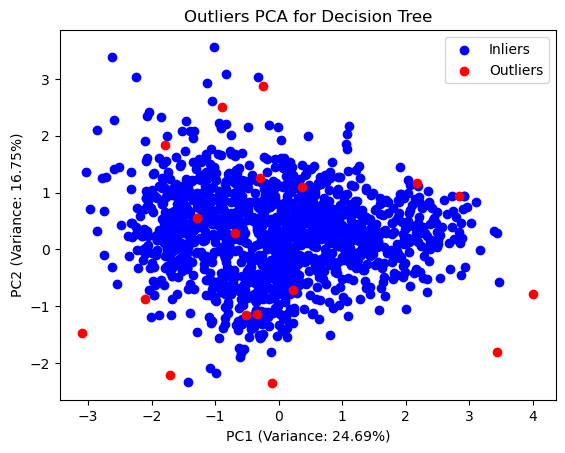

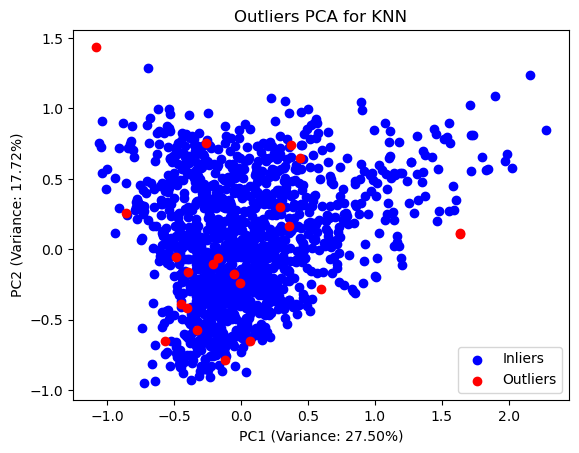

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/3814873669.py:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,


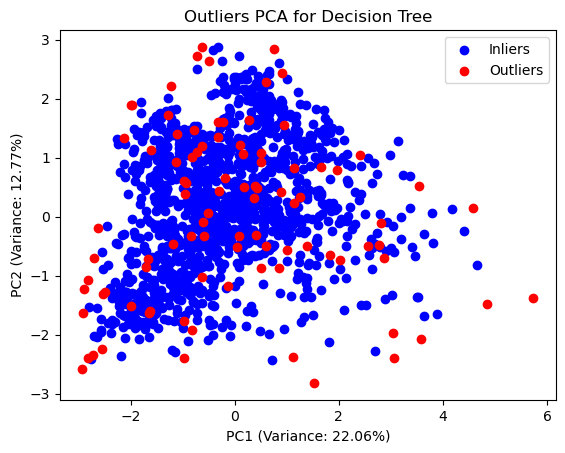

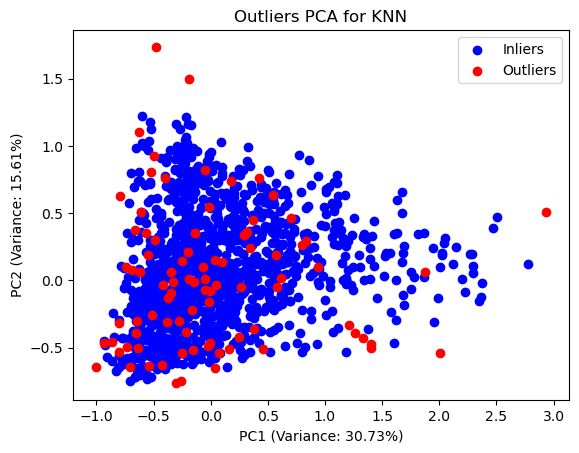

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/3814873669.py:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,


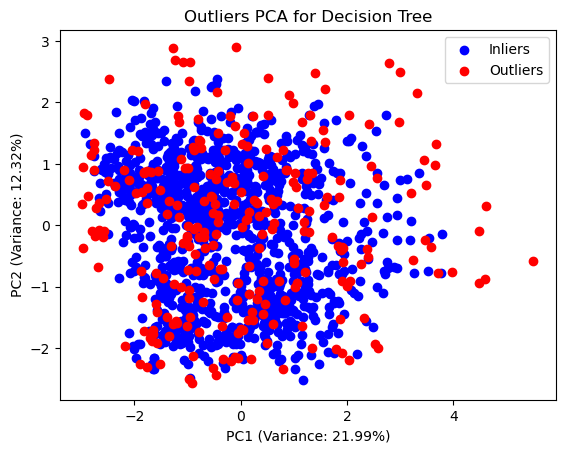

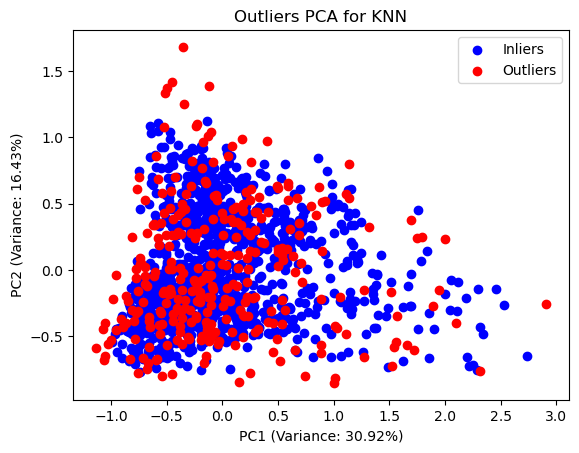

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/3814873669.py:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,


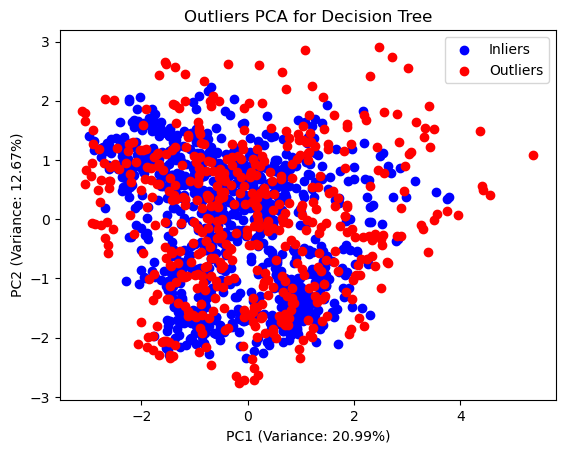

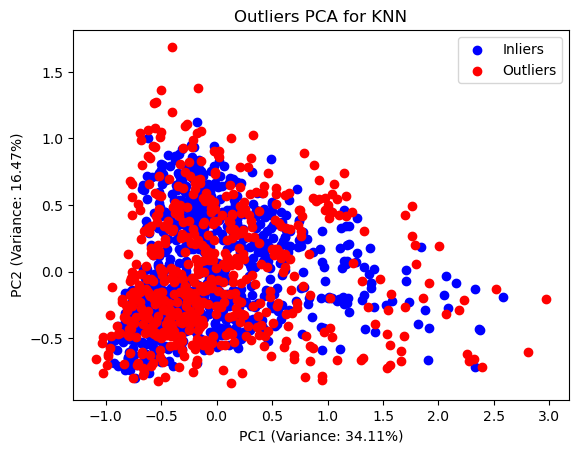

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/3814873669.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': 'No',


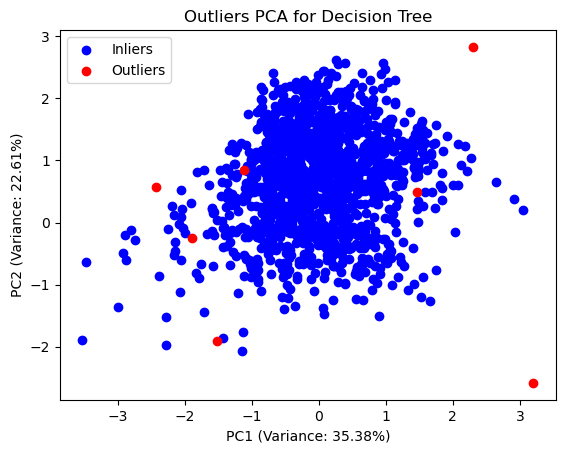

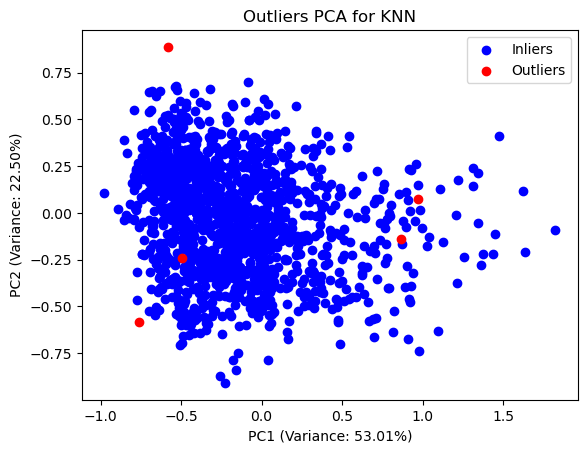

  Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0             1.0   18.0  0.993435  0.657051   0.778264  0.748397
1             5.0   92.0  0.980306  0.706731   0.776076  0.750000
2            10.0  265.0  0.942378  0.684295   0.773888  0.745192
3            15.0  506.0  0.881109  0.639423   0.756382  0.740385
4              No    0.0  0.998541  0.647436   0.778264  0.748397


In [8]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the threshold values
threshold_values = [1, 5, 10, 15, None]  # None represents no outlier removal

# Create a table to store the results
results_table = pd.DataFrame(columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT', 'Train KNN', 'Test KNN'])

# Iterate over the threshold values
for threshold in threshold_values:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]
    inliers = np.where(in_degree > T)[0]

    # Remove the outliers from the training set for Decision Tree
    X_train_filtered_DT = X_train.iloc[inliers]
    y_train_filtered_DT = y_train.iloc[inliers]

    # Train a Decision Tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered_DT, y_train_filtered_DT)

    # Make predictions on the train set for Decision Tree
    y_train_pred_DT = dtc.predict(X_train)
    train_accuracy_DT = accuracy_score(y_train, y_train_pred_DT)

    # Make predictions on the test set for Decision Tree
    y_test_pred_DT = dtc.predict(X_test)
    test_accuracy_DT = accuracy_score(y_test, y_test_pred_DT)

    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]
    inliers_KNN = np.where(in_degree_KNN > T)[0]

    # Remove the outliers from the training set for KNN
    X_train_filtered_KNN = X_train_KNN.iloc[inliers_KNN]
    y_train_filtered_KNN = y_train_KNN.iloc[inliers_KNN]

    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_filtered_KNN, y_train_filtered_KNN)

    # Make predictions on the train set for KNN
    y_train_pred_KNN = knn.predict(X_train_KNN)
    train_accuracy_KNN = accuracy_score(y_train_KNN, y_train_pred_KNN)

    # Make predictions on the test set for KNN
    y_test_pred_KNN = knn.predict(X_test_KNN)
    test_accuracy_KNN = accuracy_score(y_test_KNN, y_test_pred_KNN)

    # Add the results to the table
    if threshold is not None:
        results_table = results_table.append({'Threshold Elim.': threshold,
                                              'Obs.': len(outliers),
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)
    else:
        results_table = results_table.append({'Threshold Elim.': 'No',
                                              'Obs.': 0,
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)

    # Generate PCA representation of outliers for Decision Tree
    pca = PCA(n_components=2)
    outliers_pca_DT = pca.fit_transform(X_train.iloc[outliers])
    inliers_pca_DT = pca.transform(X_train.iloc[inliers])

    # Plot outliers and inliers for Decision Tree
    plt.scatter(inliers_pca_DT[:, 0], inliers_pca_DT[:, 1], c='b', label='Inliers')
    plt.scatter(outliers_pca_DT[:, 0], outliers_pca_DT[:, 1], c='r', label='Outliers')
    plt.title('Outliers PCA for Decision Tree')
    plt.xlabel('PC1 (Variance: {:.2f}%)'.format(pca.explained_variance_ratio_[0] * 100))
    plt.ylabel('PC2 (Variance: {:.2f}%)'.format(pca.explained_variance_ratio_[1] * 100))
    plt.legend()
    plt.show()

    # Generate PCA representation of outliers for KNN
    outliers_pca_KNN = pca.fit_transform(X_train_KNN.iloc[outliers_KNN])
    inliers_pca_KNN = pca.transform(X_train_KNN.iloc[inliers_KNN])

    # Plot outliers and inliers for KNN
    plt.scatter(inliers_pca_KNN[:, 0], inliers_pca_KNN[:, 1], c='b', label='Inliers')
    plt.scatter(outliers_pca_KNN[:, 0], outliers_pca_KNN[:, 1], c='r', label='Outliers')
    plt.title('Outliers PCA for KNN')
    plt.xlabel('PC1 (Variance: {:.2f}%)'.format(pca.explained_variance_ratio_[0] * 100))
    plt.ylabel('PC2 (Variance: {:.2f}%)'.format(pca.explained_variance_ratio_[1] * 100))
    plt.legend()
    plt.show()

# Print the table
print(results_table)


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/3111601017.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/3111601017.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/3111601017.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/3111601017.py:81: FutureWarning: The frame.append method is deprecated and wi

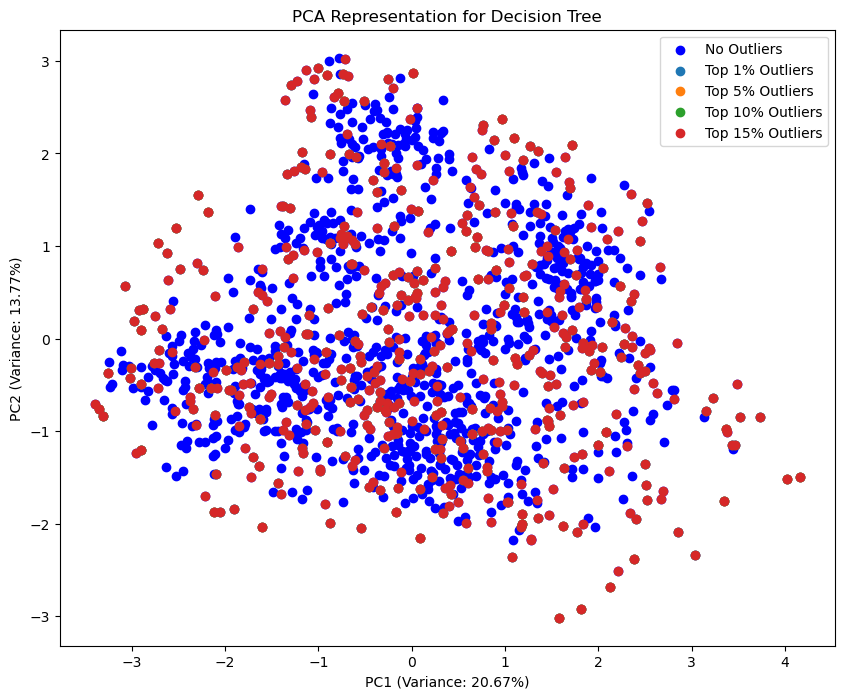

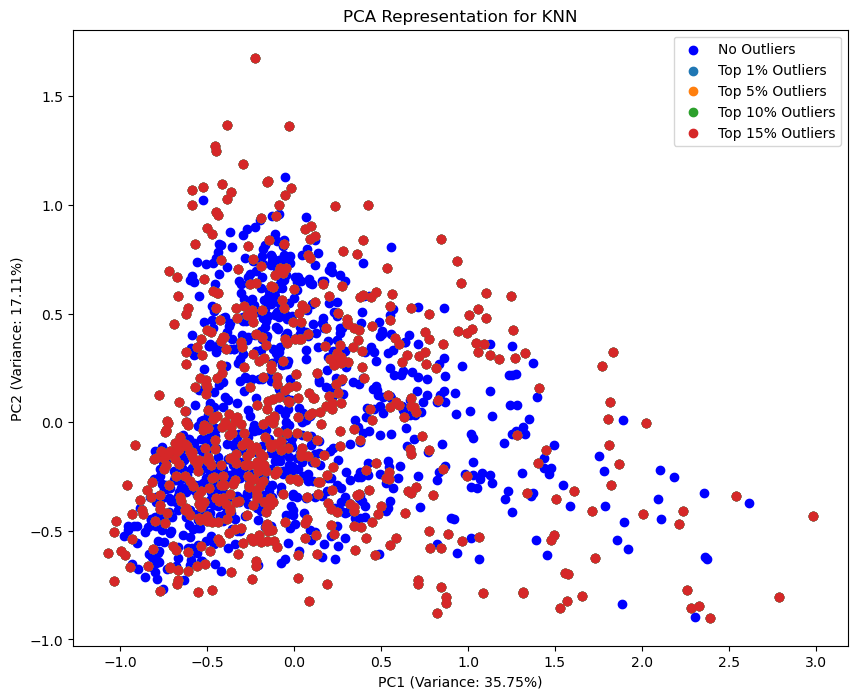

  Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0             1.0   18.0  0.993435  0.657051   0.778264  0.748397
1             5.0   92.0  0.980306  0.706731   0.776076  0.750000
2            10.0  265.0  0.942378  0.684295   0.773888  0.745192
3            15.0  506.0  0.881109  0.639423   0.756382  0.740385
4              No    0.0  0.998541  0.647436   0.778264  0.748397


In [9]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the threshold values
threshold_values = [1, 5, 10, 15, None]  # None represents no outlier removal

# Create a table to store the results
results_table = pd.DataFrame(columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT', 'Train KNN', 'Test KNN'])

# Iterate over the threshold values
for threshold in threshold_values:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]
    inliers = np.where(in_degree > T)[0]

    # Remove the outliers from the training set for Decision Tree
    X_train_filtered_DT = X_train.iloc[inliers]
    y_train_filtered_DT = y_train.iloc[inliers]

    # Train a Decision Tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered_DT, y_train_filtered_DT)

    # Make predictions on the train set for Decision Tree
    y_train_pred_DT = dtc.predict(X_train)
    train_accuracy_DT = accuracy_score(y_train, y_train_pred_DT)

    # Make predictions on the test set for Decision Tree
    y_test_pred_DT = dtc.predict(X_test)
    test_accuracy_DT = accuracy_score(y_test, y_test_pred_DT)

    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]
    inliers_KNN = np.where(in_degree_KNN > T)[0]

    # Remove the outliers from the training set for KNN
    X_train_filtered_KNN = X_train_KNN.iloc[inliers_KNN]
    y_train_filtered_KNN = y_train_KNN.iloc[inliers_KNN]

    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_filtered_KNN, y_train_filtered_KNN)

    # Make predictions on the train set for KNN
    y_train_pred_KNN = knn.predict(X_train_KNN)
    train_accuracy_KNN = accuracy_score(y_train_KNN, y_train_pred_KNN)

    # Make predictions on the test set for KNN
    y_test_pred_KNN = knn.predict(X_test_KNN)
    test_accuracy_KNN = accuracy_score(y_test_KNN, y_test_pred_KNN)

    # Add the results to the table
    if threshold is not None:
        results_table = results_table.append({'Threshold Elim.': threshold,
                                              'Obs.': len(outliers),
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)
    else:
        results_table = results_table.append({'Threshold Elim.': 'No',
                                              'Obs.': 0,
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)

# Generate PCA representation for Decision Tree
pca_DT = PCA(n_components=2)
pca_data_DT = pca_DT.fit_transform(X_train)

# Generate PCA representation for KNN
pca_KNN = PCA(n_components=2)
pca_data_KNN = pca_KNN.fit_transform(X_train_KNN)

# Plot PCA representation for Decision Tree
plt.figure(figsize=(10, 8))
plt.scatter(pca_data_DT[:, 0], pca_data_DT[:, 1], color='blue', label='No Outliers')

# Iterate over the threshold values
for threshold in threshold_values[:-1]:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]

    # Generate PCA representation for outliers
    pca_data_outliers_DT = pca_DT.transform(X_train.iloc[outliers])
    label = f'Top {threshold}% Outliers' if threshold is not None else 'All Outliers'
    plt.scatter(pca_data_outliers_DT[:, 0], pca_data_outliers_DT[:, 1], label=label)

plt.title('PCA Representation for Decision Tree')
plt.xlabel(f'PC1 (Variance: {round(pca_DT.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PC2 (Variance: {round(pca_DT.explained_variance_ratio_[1] * 100, 2)}%)')
plt.legend()
plt.show()

# Plot PCA representation for KNN
plt.figure(figsize=(10, 8))
plt.scatter(pca_data_KNN[:, 0], pca_data_KNN[:, 1], color='blue', label='No Outliers')

# Iterate over the threshold values
for threshold in threshold_values[:-1]:
    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]

    # Generate PCA representation for outliers
    pca_data_outliers_KNN = pca_KNN.transform(X_train_KNN.iloc[outliers_KNN])
    label = f'Top {threshold}% Outliers' if threshold is not None else 'All Outliers'
    plt.scatter(pca_data_outliers_KNN[:, 0], pca_data_outliers_KNN[:, 1], label=label)

plt.title('PCA Representation for KNN')
plt.xlabel(f'PC1 (Variance: {round(pca_KNN.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PC2 (Variance: {round(pca_KNN.explained_variance_ratio_[1] * 100, 2)}%)')
plt.legend()
plt.show()

# Print the table
print(results_table)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the threshold values
threshold_values = [1, 5, 10, 15, None]  # None represents no outlier removal

# Create a table to store the results
results_table = pd.DataFrame(columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT', 'Train KNN', 'Test KNN'])

# Initialize a dictionary to store PCA points for each threshold elimination
pca_points_DT = {}
pca_points_KNN = {} 


# Iterate over the threshold values
for threshold in threshold_values:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]
    inliers = np.where(in_degree > T)[0]

    # Remove the outliers from the training set for Decision Tree
    X_train_filtered_DT = X_train.iloc[inliers]
    y_train_filtered_DT = y_train.iloc[inliers]

    # Train a Decision Tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered_DT, y_train_filtered_DT)

    # Make predictions on the train set for Decision Tree
    y_train_pred_DT = dtc.predict(X_train)
    train_accuracy_DT = accuracy_score(y_train, y_train_pred_DT)

    # Make predictions on the test set for Decision Tree
    y_test_pred_DT = dtc.predict(X_test)
    test_accuracy_DT = accuracy_score(y_test, y_test_pred_DT)

    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]
    inliers_KNN = np.where(in_degree_KNN > T)[0]

    # Remove the outliers from the training set for KNN
    X_train_filtered_KNN = X_train_KNN.iloc[inliers_KNN]
    y_train_filtered_KNN = y_train_KNN.iloc[inliers_KNN]

    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_filtered_KNN, y_train_filtered_KNN)

    # Make predictions on the train set for KNN
    y_train_pred_KNN = knn.predict(X_train_KNN)
    train_accuracy_KNN = accuracy_score(y_train_KNN, y_train_pred_KNN)

    # Make predictions on the test set for KNN
    y_test_pred_KNN = knn.predict(X_test_KNN)
    test_accuracy_KNN = accuracy_score(y_test_KNN, y_test_pred_KNN)

    # Add the results to the table
    if threshold is not None:
        results_table = results_table.append({'Threshold Elim.': threshold,
                                              'Obs.': len(outliers),
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)
    else:
        results_table = results_table.append({'Threshold Elim.': 'No',
                                              'Obs.': 0,
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)

# Generate PCA representation for Decision Tree
pca_DT = PCA(n_components=2)
pca_data_DT = pca_DT.fit_transform(X_train)

# Generate PCA representation for KNN
pca_KNN = PCA(n_components=2)
pca_data_KNN = pca_KNN.fit_transform(X_train_KNN)

# Plot PCA representation for Decision Tree
plt.figure(figsize=(10, 8))
plt.scatter(pca_data_DT[:, 0], pca_data_DT[:, 1], color='blue', label='No Outliers')

# Iterate over the threshold values
for threshold in threshold_values[:-1]:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]

    # Generate PCA representation for outliers
    pca_data_outliers_DT = pca_DT.transform(X_train.iloc[outliers])
    label = f'Top {threshold}% Outliers' if threshold is not None else 'All Outliers'
    plt.scatter(pca_data_outliers_DT[:, 0], pca_data_outliers_DT[:, 1], label=label)

plt.title('PCA Representation for Decision Tree')
plt.xlabel(f'PC1 (Variance: {round(pca_DT.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PC2 (Variance: {round(pca_DT.explained_variance_ratio_[1] * 100, 2)}%)')
plt.legend()
plt.show()

# Plot PCA representation for KNN
plt.figure(figsize=(10, 8))
plt.scatter(pca_data_KNN[:, 0], pca_data_KNN[:, 1], color='blue', label='No Outliers')

# Iterate over the threshold values
for threshold in threshold_values[:-1]:
    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]

    # Generate PCA representation for outliers
    pca_data_outliers_KNN = pca_KNN.transform(X_train_KNN.iloc[outliers_KNN])
    label = f'Top {threshold}% Outliers' if threshold is not None else 'All Outliers'
    plt.scatter(pca_data_outliers_KNN[:, 0], pca_data_outliers_KNN[:, 1], label=label)

plt.title('PCA Representation for KNN')
plt.xlabel(f'PC1 (Variance: {round(pca_KNN.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PC2 (Variance: {round(pca_KNN.explained_variance_ratio_[1] * 100, 2)}%)')
plt.legend()
plt.show()

# Print the table
print(results_table)


In [ ]:
# Initialize a dictionary to store PCA points for each threshold elimination
pca_points_DT = {}
pca_points_KNN = {}

# Iterate over the threshold values
for threshold in threshold_values:
    ...
    # Add the results to the table
    if threshold is not None:
        results_table = results_table.append({'Threshold Elim.': threshold,
                                              ...
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)
        # Store the PCA points for the current threshold elimination for Decision Tree
        pca_points_DT[threshold] = pca_data_outliers_DT
        
        # Store the PCA points for the current threshold elimination for KNN
        pca_points_KNN[threshold] = pca_data_outliers_KNN
    else:
        results_table = results_table.append({'Threshold Elim.': 'No',
                                              ...
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)

# Print the table
print(results_table)

# Return the PCA points for each threshold elimination
print("PCA points for Decision Tree:")
for threshold, points in pca_points_DT.items():
    print(f"Threshold {threshold}: {points}")

print("PCA points for KNN:")
for threshold, points in pca_points_KNN.items():
    print(f"Threshold {threshold}: {points}")

In [19]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the threshold values
threshold_values = [1, 5, 10, 15, None]  # None represents no outlier removal

# Create a table to store the results
results_table = pd.DataFrame(
    columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT', 'Train KNN', 'Test KNN'])

# Initialize a dictionary to store PCA points for each threshold elimination
pca_points_DT = {}
pca_points_KNN = {}

# Iterate over the threshold values
for threshold in threshold_values:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]
    inliers = np.where(in_degree > T)[0]

    # Remove the outliers from the training set for Decision Tree
    X_train_filtered_DT = X_train.iloc[inliers]
    y_train_filtered_DT = y_train.iloc[inliers]

    # Train a Decision Tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered_DT, y_train_filtered_DT)

    # Make predictions on the train set for Decision Tree
    y_train_pred_DT = dtc.predict(X_train)
    train_accuracy_DT = accuracy_score(y_train, y_train_pred_DT)

    # Make predictions on the test set for Decision Tree
    y_test_pred_DT = dtc.predict(X_test)
    test_accuracy_DT = accuracy_score(y_test, y_test_pred_DT)

    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]
    inliers_KNN = np.where(in_degree_KNN > T)[0]

    # Remove the outliers from the training set for KNN
    X_train_filtered_KNN = X_train_KNN.iloc[inliers_KNN]
    y_train_filtered_KNN = y_train_KNN.iloc[inliers_KNN]

    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_filtered_KNN, y_train_filtered_KNN)

    # Make predictions on the train set for KNN
    y_train_pred_KNN = knn.predict(X_train_KNN)
    train_accuracy_KNN = accuracy_score(y_train_KNN, y_train_pred_KNN)

    # Make predictions on the test set for KNN
    y_test_pred_KNN = knn.predict(X_test_KNN)
    test_accuracy_KNN = accuracy_score(y_test_KNN, y_test_pred_KNN)

    # Add the results to the table
    if threshold is not None:
        results_table = results_table.append({'Threshold Elim.': threshold,
                                              'Obs.': len(outliers),
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)
        # Store the PCA points for the current threshold elimination for Decision Tree
        pca_points_DT[threshold] = pca_data_outliers_DT

        # Store the PCA points for the current threshold elimination for KNN
        pca_points_KNN[threshold] = pca_data_outliers_KNN
    else:
        results_table = results_table.append({'Threshold Elim.': 'No',
                                              'Obs.': 0,
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)

# Print the table
print(results_table)

# Return the PCA points for each threshold elimination
print("PCA points for Decision Tree:")
for threshold, points in pca_points_DT.items():
    print(f"Threshold {threshold}: {points}")

print("PCA points for KNN:")
for threshold, points in pca_points_KNN.items():
    print(f"Threshold {threshold}: {points}")


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/647175402.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/647175402.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/647175402.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/647175402.py:86: FutureWarning: The frame.append method is deprecated and will b

  Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0             1.0   18.0  0.993435  0.657051   0.778264  0.748397
1             5.0   92.0  0.980306  0.706731   0.776076  0.750000
2            10.0  265.0  0.942378  0.684295   0.773888  0.745192
3            15.0  506.0  0.881109  0.639423   0.756382  0.740385
4              No    0.0  0.998541  0.647436   0.778264  0.748397
PCA points for Decision Tree:
Threshold 1: [[-0.64056797  0.80838894]
 [ 3.36857265 -0.97518949]
 [ 0.8157727   0.64216445]
 ...
 [ 0.49477962 -1.76797276]
 [-1.04289285 -0.22235887]
 [-2.32189851 -0.31131045]]
Threshold 5: [[-0.64056797  0.80838894]
 [ 3.36857265 -0.97518949]
 [ 0.8157727   0.64216445]
 ...
 [ 0.49477962 -1.76797276]
 [-1.04289285 -0.22235887]
 [-2.32189851 -0.31131045]]
Threshold 10: [[-0.64056797  0.80838894]
 [ 3.36857265 -0.97518949]
 [ 0.8157727   0.64216445]
 ...
 [ 0.49477962 -1.76797276]
 [-1.04289285 -0.22235887]
 [-2.32189851 -0.31131045]]
Threshold 15: [[-0.64056797  0

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/647175402.py:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': 'No',


In [20]:
results_table

Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0             1.0   18.0  0.993435  0.657051   0.778264  0.748397
1             5.0   92.0  0.980306  0.706731   0.776076  0.750000
2            10.0  265.0  0.942378  0.684295   0.773888  0.745192
3            15.0  506.0  0.881109  0.639423   0.756382  0.740385
4              No    0.0  0.998541  0.647436   0.778264  0.748397

In [21]:
pca_points_DT

{1: array([[-0.64056797,  0.80838894],
        [ 3.36857265, -0.97518949],
        [ 0.8157727 ,  0.64216445],
        ...,
        [ 0.49477962, -1.76797276],
        [-1.04289285, -0.22235887],
        [-2.32189851, -0.31131045]]),
 5: array([[-0.64056797,  0.80838894],
        [ 3.36857265, -0.97518949],
        [ 0.8157727 ,  0.64216445],
        ...,
        [ 0.49477962, -1.76797276],
        [-1.04289285, -0.22235887],
        [-2.32189851, -0.31131045]]),
 10: array([[-0.64056797,  0.80838894],
        [ 3.36857265, -0.97518949],
        [ 0.8157727 ,  0.64216445],
        ...,
        [ 0.49477962, -1.76797276],
        [-1.04289285, -0.22235887],
        [-2.32189851, -0.31131045]]),
 15: array([[-0.64056797,  0.80838894],
        [ 3.36857265, -0.97518949],
        [ 0.8157727 ,  0.64216445],
        ...,
        [ 0.49477962, -1.76797276],
        [-1.04289285, -0.22235887],
        [-2.32189851, -0.31131045]])}

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/1878800300.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/1878800300.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/1878800300.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/1878800300.py:86: FutureWarning: The frame.append method is deprecated and wi

  Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0             1.0   18.0  0.993435  0.657051   0.778264  0.748397
1             5.0   92.0  0.980306  0.706731   0.776076  0.750000
2            10.0  265.0  0.942378  0.684295   0.773888  0.745192
3            15.0  506.0  0.881109  0.639423   0.756382  0.740385
4              No    0.0  0.998541  0.647436   0.778264  0.748397
PCA points for Decision Tree:
Threshold 1: [[-0.64056797  0.80838894]
 [ 3.36857265 -0.97518949]
 [ 0.8157727   0.64216445]
 ...
 [ 0.49477962 -1.76797276]
 [-1.04289285 -0.22235887]
 [-2.32189851 -0.31131045]]


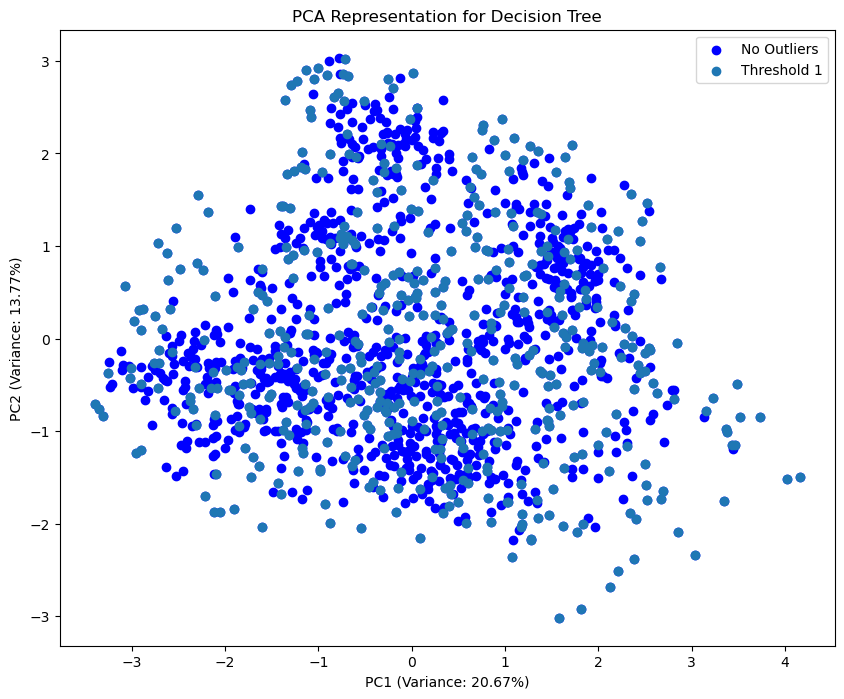

Threshold 5: [[-0.64056797  0.80838894]
 [ 3.36857265 -0.97518949]
 [ 0.8157727   0.64216445]
 ...
 [ 0.49477962 -1.76797276]
 [-1.04289285 -0.22235887]
 [-2.32189851 -0.31131045]]


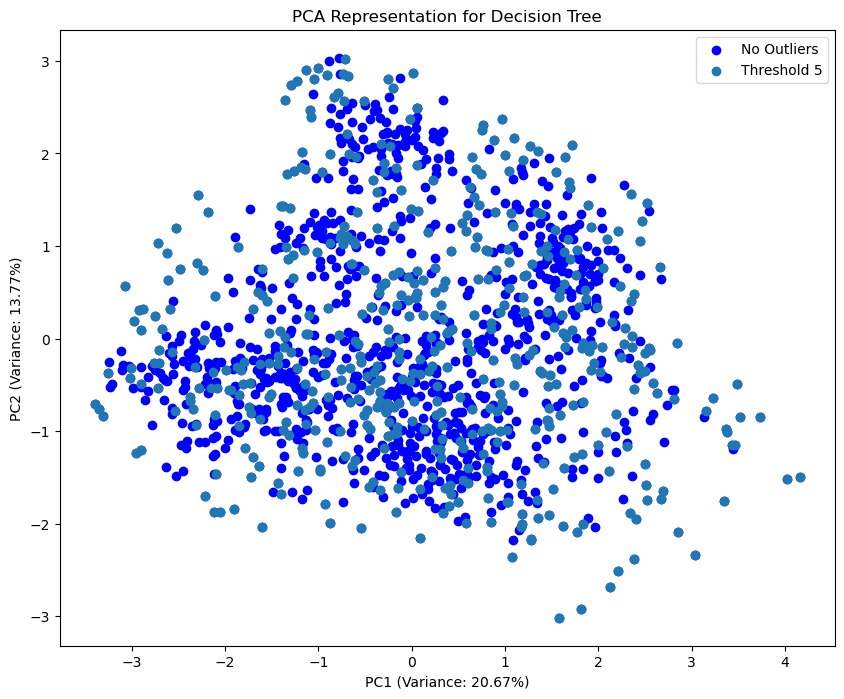

Threshold 10: [[-0.64056797  0.80838894]
 [ 3.36857265 -0.97518949]
 [ 0.8157727   0.64216445]
 ...
 [ 0.49477962 -1.76797276]
 [-1.04289285 -0.22235887]
 [-2.32189851 -0.31131045]]


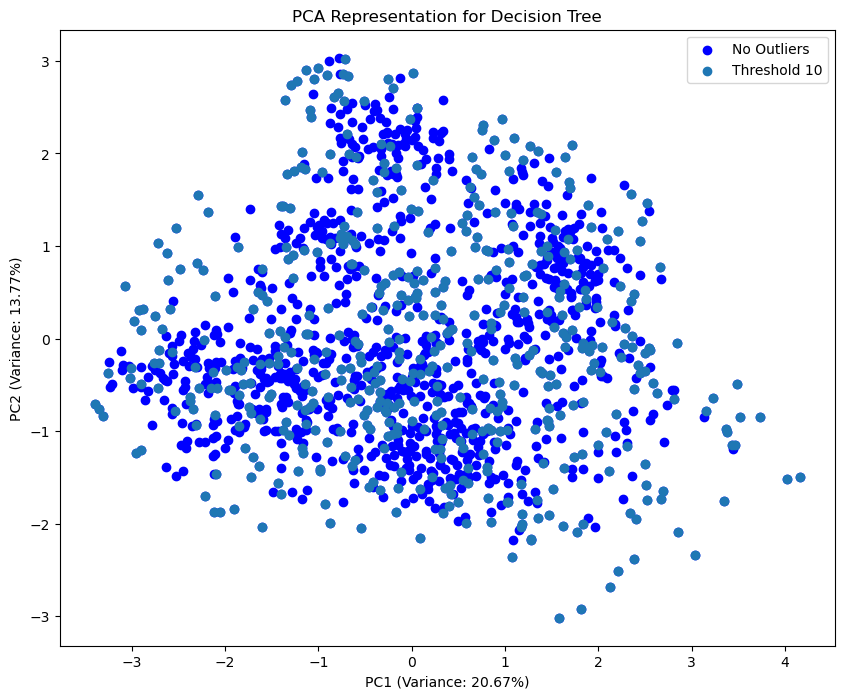

Threshold 15: [[-0.64056797  0.80838894]
 [ 3.36857265 -0.97518949]
 [ 0.8157727   0.64216445]
 ...
 [ 0.49477962 -1.76797276]
 [-1.04289285 -0.22235887]
 [-2.32189851 -0.31131045]]


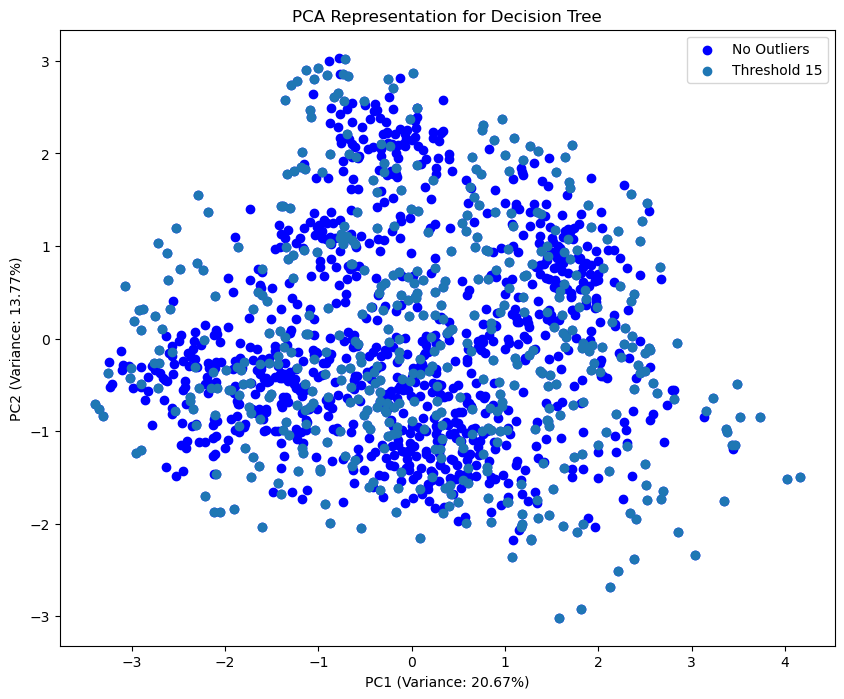

PCA points for KNN:
Threshold 1: [[ 0.03811126 -0.15704226]
 [ 1.32688393  0.31759437]
 [-0.50321943  0.89579629]
 ...
 [-0.21797857 -0.66231595]
 [-0.42925472 -0.55080132]
 [-0.50040474 -0.43276329]]


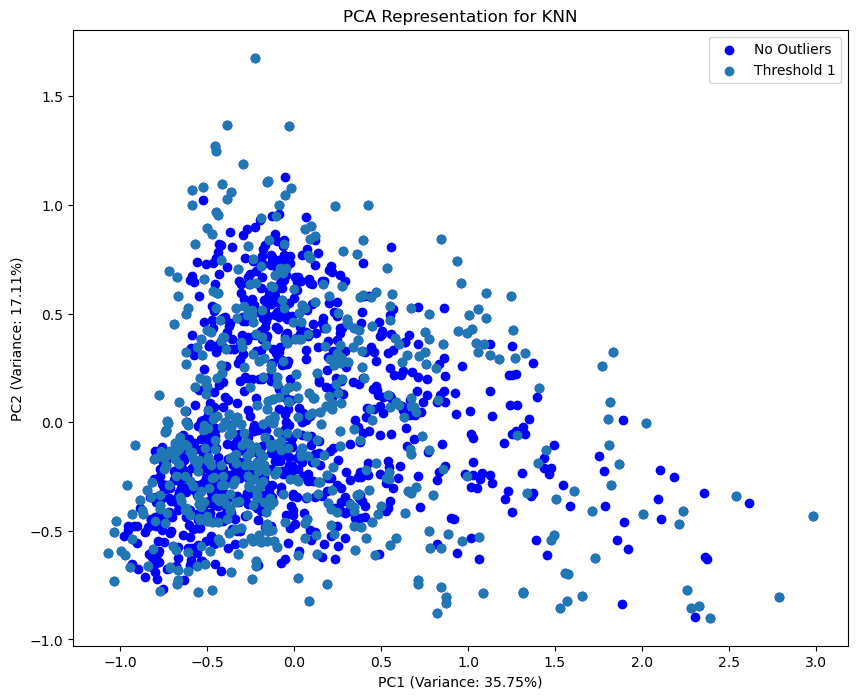

Threshold 5: [[ 0.03811126 -0.15704226]
 [ 1.32688393  0.31759437]
 [-0.50321943  0.89579629]
 ...
 [-0.21797857 -0.66231595]
 [-0.42925472 -0.55080132]
 [-0.50040474 -0.43276329]]


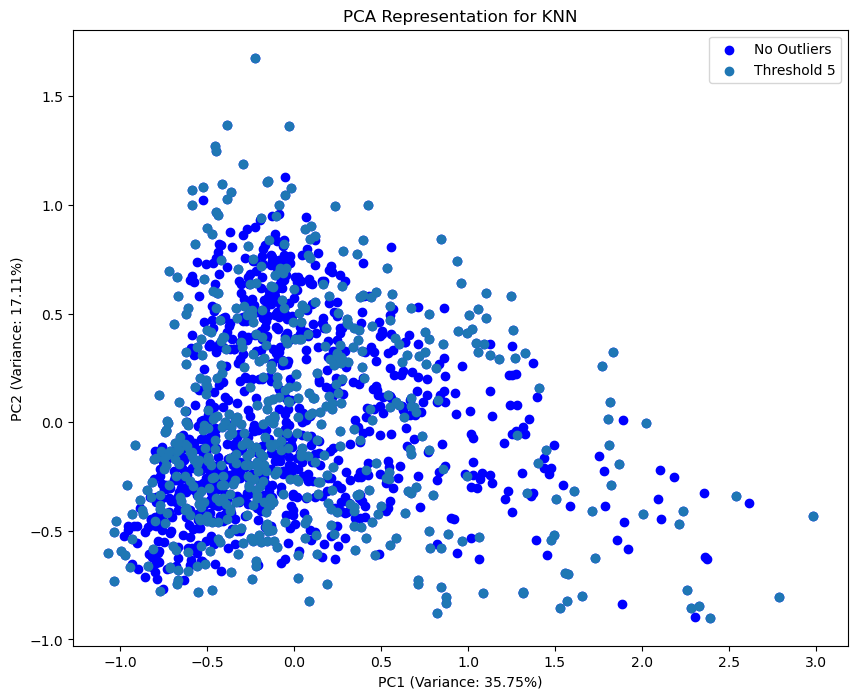

Threshold 10: [[ 0.03811126 -0.15704226]
 [ 1.32688393  0.31759437]
 [-0.50321943  0.89579629]
 ...
 [-0.21797857 -0.66231595]
 [-0.42925472 -0.55080132]
 [-0.50040474 -0.43276329]]


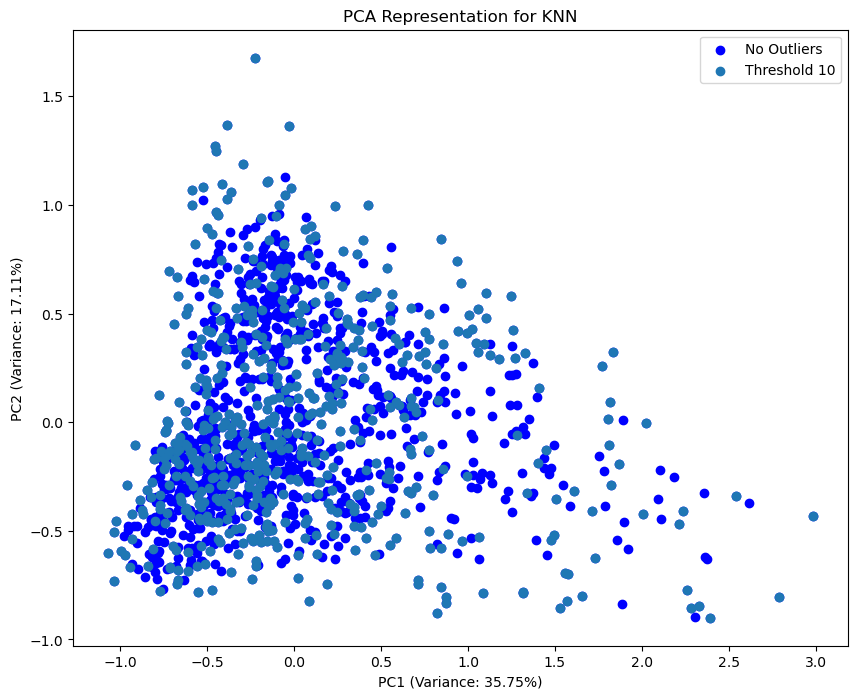

Threshold 15: [[ 0.03811126 -0.15704226]
 [ 1.32688393  0.31759437]
 [-0.50321943  0.89579629]
 ...
 [-0.21797857 -0.66231595]
 [-0.42925472 -0.55080132]
 [-0.50040474 -0.43276329]]


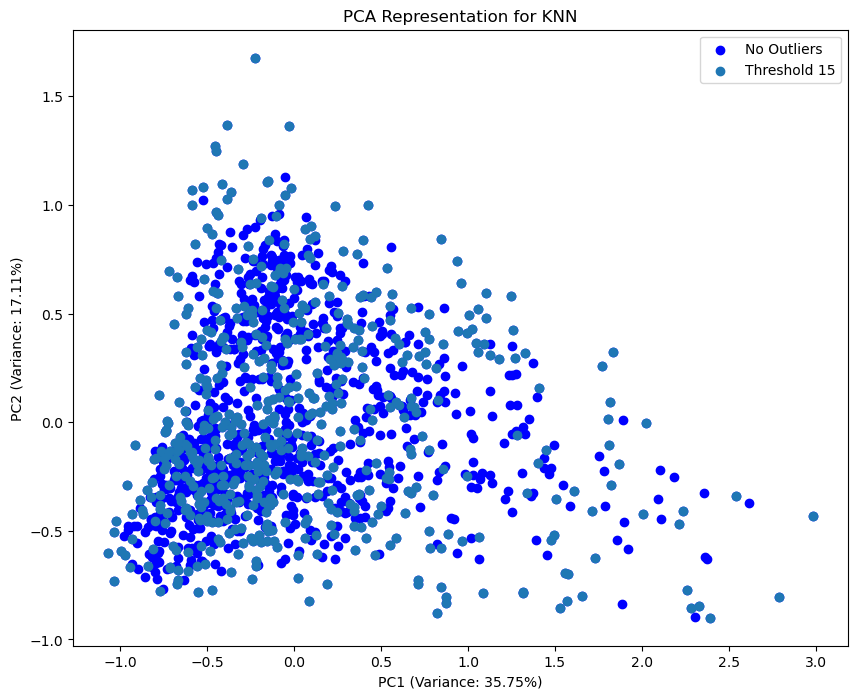

In [22]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the threshold values
threshold_values = [1, 5, 10, 15, None]  # None represents no outlier removal

# Create a table to store the results
results_table = pd.DataFrame(
    columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT', 'Train KNN', 'Test KNN'])

# Initialize a dictionary to store PCA points for each threshold elimination
pca_points_DT = {}
pca_points_KNN = {}

# Iterate over the threshold values
for threshold in threshold_values:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]
    inliers = np.where(in_degree > T)[0]

    # Remove the outliers from the training set for Decision Tree
    X_train_filtered_DT = X_train.iloc[inliers]
    y_train_filtered_DT = y_train.iloc[inliers]

    # Train a Decision Tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered_DT, y_train_filtered_DT)

    # Make predictions on the train set for Decision Tree
    y_train_pred_DT = dtc.predict(X_train)
    train_accuracy_DT = accuracy_score(y_train, y_train_pred_DT)

    # Make predictions on the test set for Decision Tree
    y_test_pred_DT = dtc.predict(X_test)
    test_accuracy_DT = accuracy_score(y_test, y_test_pred_DT)

    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]
    inliers_KNN = np.where(in_degree_KNN > T)[0]

    # Remove the outliers from the training set for KNN
    X_train_filtered_KNN = X_train_KNN.iloc[inliers_KNN]
    y_train_filtered_KNN = y_train_KNN.iloc[inliers_KNN]

    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_filtered_KNN, y_train_filtered_KNN)

    # Make predictions on the train set for KNN
    y_train_pred_KNN = knn.predict(X_train_KNN)
    train_accuracy_KNN = accuracy_score(y_train_KNN, y_train_pred_KNN)

    # Make predictions on the test set for KNN
    y_test_pred_KNN = knn.predict(X_test_KNN)
    test_accuracy_KNN = accuracy_score(y_test_KNN, y_test_pred_KNN)

    # Add the results to the table
    if threshold is not None:
        results_table = results_table.append({'Threshold Elim.': threshold,
                                              'Obs.': len(outliers),
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)
        # Store the PCA points for the current threshold elimination for Decision Tree
        pca_points_DT[threshold] = pca_data_outliers_DT

        # Store the PCA points for the current threshold elimination for KNN
        pca_points_KNN[threshold] = pca_data_outliers_KNN
    else:
        results_table = results_table.append({'Threshold Elim.': 'No',
                                              'Obs.': 0,
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)

# Print the table
print(results_table)

# Plot the PCA representation for Decision Tree
print("PCA points for Decision Tree:")
for threshold, points in pca_points_DT.items():
    print(f"Threshold {threshold}: {points}")
    
    # Plot PCA representation for Decision Tree
    plt.figure(figsize=(10, 8))
    plt.scatter(pca_data_DT[:, 0], pca_data_DT[:, 1], color='blue', label='No Outliers')
    plt.scatter(points[:, 0], points[:, 1], label=f'Threshold {threshold}')
    plt.title('PCA Representation for Decision Tree')
    plt.xlabel(f'PC1 (Variance: {round(pca_DT.explained_variance_ratio_[0] * 100, 2)}%)')
    plt.ylabel(f'PC2 (Variance: {round(pca_DT.explained_variance_ratio_[1] * 100, 2)}%)')
    plt.legend()
    plt.show()

# Plot the PCA representation for KNN
print("PCA points for KNN:")
for threshold, points in pca_points_KNN.items():
    print(f"Threshold {threshold}: {points}")
    
    # Plot PCA representation for KNN
    plt.figure(figsize=(10, 8))
    plt.scatter(pca_data_KNN[:, 0], pca_data_KNN[:, 1], color='blue', label='No Outliers')
    plt.scatter(points[:, 0], points[:, 1], label=f'Threshold {threshold}')
    plt.title('PCA Representation for KNN')
    plt.xlabel(f'PC1 (Variance: {round(pca_KNN.explained_variance_ratio_[0] * 100, 2)}%)')
    plt.ylabel(f'PC2 (Variance: {round(pca_KNN.explained_variance_ratio_[1] * 100, 2)}%)')
    plt.legend()
    plt.show()


In [28]:
pca_points_KNN

{1: array([[ 0.03811126, -0.15704226],
        [ 1.32688393,  0.31759437],
        [-0.50321943,  0.89579629],
        ...,
        [-0.21797857, -0.66231595],
        [-0.42925472, -0.55080132],
        [-0.50040474, -0.43276329]]),
 5: array([[ 0.03811126, -0.15704226],
        [ 1.32688393,  0.31759437],
        [-0.50321943,  0.89579629],
        ...,
        [-0.21797857, -0.66231595],
        [-0.42925472, -0.55080132],
        [-0.50040474, -0.43276329]]),
 10: array([[ 0.03811126, -0.15704226],
        [ 1.32688393,  0.31759437],
        [-0.50321943,  0.89579629],
        ...,
        [-0.21797857, -0.66231595],
        [-0.42925472, -0.55080132],
        [-0.50040474, -0.43276329]]),
 15: array([[ 0.03811126, -0.15704226],
        [ 1.32688393,  0.31759437],
        [-0.50321943,  0.89579629],
        ...,
        [-0.21797857, -0.66231595],
        [-0.42925472, -0.55080132],
        [-0.50040474, -0.43276329]])}

In [30]:
pca_points_DT

{1: array([[-0.64056797,  0.80838894],
        [ 3.36857265, -0.97518949],
        [ 0.8157727 ,  0.64216445],
        ...,
        [ 0.49477962, -1.76797276],
        [-1.04289285, -0.22235887],
        [-2.32189851, -0.31131045]]),
 5: array([[-0.64056797,  0.80838894],
        [ 3.36857265, -0.97518949],
        [ 0.8157727 ,  0.64216445],
        ...,
        [ 0.49477962, -1.76797276],
        [-1.04289285, -0.22235887],
        [-2.32189851, -0.31131045]]),
 10: array([[-0.64056797,  0.80838894],
        [ 3.36857265, -0.97518949],
        [ 0.8157727 ,  0.64216445],
        ...,
        [ 0.49477962, -1.76797276],
        [-1.04289285, -0.22235887],
        [-2.32189851, -0.31131045]]),
 15: array([[-0.64056797,  0.80838894],
        [ 3.36857265, -0.97518949],
        [ 0.8157727 ,  0.64216445],
        ...,
        [ 0.49477962, -1.76797276],
        [-1.04289285, -0.22235887],
        [-2.32189851, -0.31131045]])}

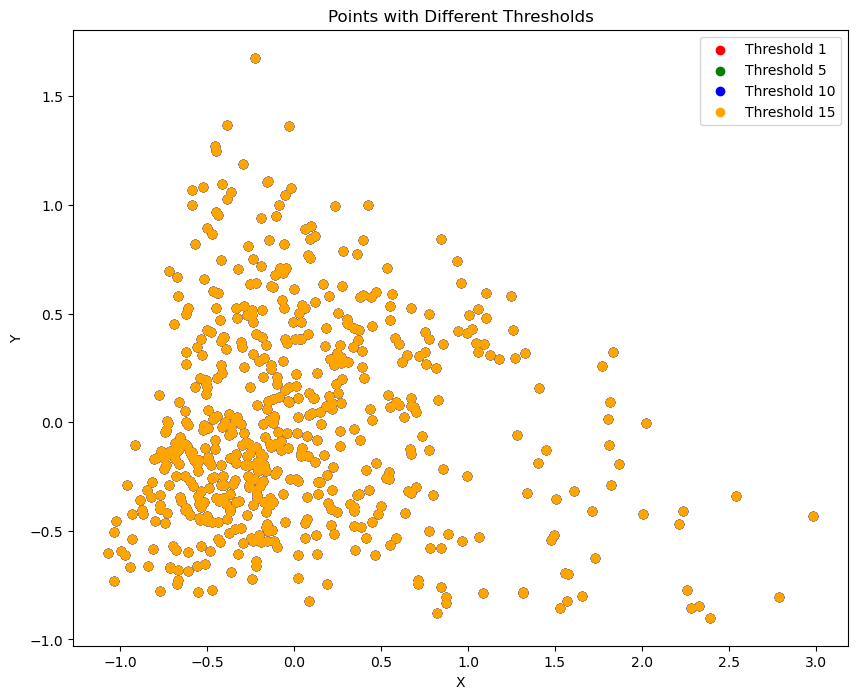

In [31]:
import matplotlib.pyplot as plt

# Dictionary with points
# points_dict = {
#     1: array([[ 0.03811126, -0.15704226],
#              [ 1.32688393,  0.31759437],
#              [-0.50321943,  0.89579629],
#              ...
#             ]),
#     5: array([[ 0.03811126, -0.15704226],
#              [ 1.32688393,  0.31759437],
#              [-0.50321943,  0.89579629],
#              ...
#             ]),
#     10: array([[ 0.03811126, -0.15704226],
#               [ 1.32688393,  0.31759437],
#               [-0.50321943,  0.89579629],
#               ...
#              ]),
#     15: array([[ 0.03811126, -0.15704226],
#               [ 1.32688393,  0.31759437],
#               [-0.50321943,  0.89579629],
#               ...
#              ])
# }

# Plot the points
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue', 'orange']
labels = []

for threshold, points in pca_points_KNN.items():
    plt.scatter(points[:, 0], points[:, 1], color=colors.pop(0), label=f'Threshold {threshold}')
    labels.append(f'Threshold {threshold}')

plt.title('Points with Different Thresholds')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(labels)
plt.show()


In [33]:
import matplotlib.pyplot as plt

# Dictionary with points
points_dict = {
    1: array([[ 0.03811126, -0.15704226],
             [ 1.32688393,  0.31759437],
             [-0.50321943,  0.89579629],
             ...
            ]),
    5: array([[ 0.03811126, -0.15704226],
             [ 1.32688393,  0.31759437],
             [-0.50321943,  0.89579629],
             ...
            ]),
    10: array([[ 0.03811126, -0.15704226],
              [ 1.32688393,  0.31759437],
              [-0.50321943,  0.89579629],
              ...
             ]),
    15: array([[ 0.03811126, -0.15704226],
              [ 1.32688393,  0.31759437],
              [-0.50321943,  0.89579629],
              ...
             ])
}

# Plot the points
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue', 'orange']
labels = []

for threshold, points in pca_points_KNN.items():
    if threshold in points_dict:
        plt.scatter(points[:, 0], points[:, 1], color=colors.pop(0), label=f'Threshold {threshold}')
        labels.append(f'Threshold {threshold}')

plt.title('Points with Different Thresholds')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(labels)
plt.show()


NameError: name 'array' is not defined

In [ ]:
# Real Testing using outliers index

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/1196007011.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/1196007011.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/1196007011.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/1196007011.py:86: FutureWarning: The frame.append method is deprecated and wi

  Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0             1.0   18.0  0.993435  0.657051   0.778264  0.748397
1             5.0   92.0  0.980306  0.706731   0.776076  0.750000
2            10.0  265.0  0.942378  0.684295   0.773888  0.745192
3            15.0  506.0  0.881109  0.639423   0.756382  0.740385
4              No    0.0  0.998541  0.647436   0.778264  0.748397


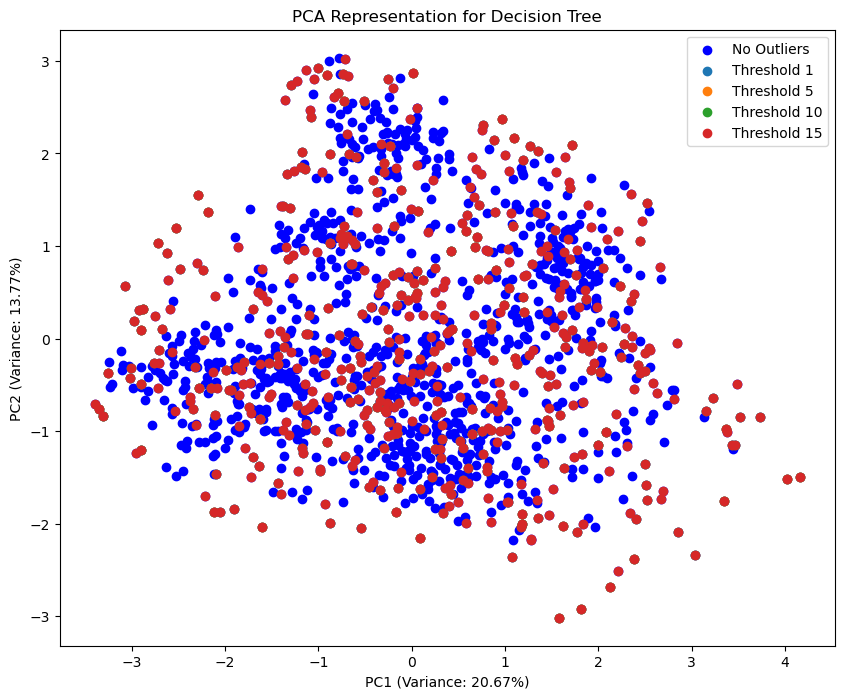

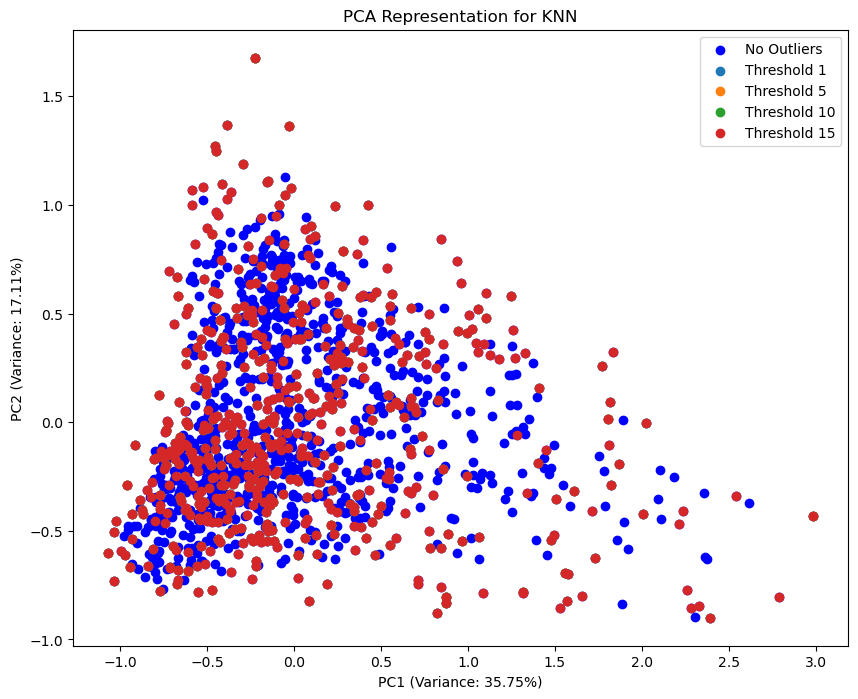

In [23]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the threshold values
threshold_values = [1, 5, 10, 15, None]  # None represents no outlier removal

# Create a table to store the results
results_table = pd.DataFrame(
    columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT', 'Train KNN', 'Test KNN'])

# Initialize a dictionary to store PCA points for each threshold elimination
pca_points_DT = {}
pca_points_KNN = {}

# Iterate over the threshold values
for threshold in threshold_values:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]
    inliers = np.where(in_degree > T)[0]

    # Remove the outliers from the training set for Decision Tree
    X_train_filtered_DT = X_train.iloc[inliers]
    y_train_filtered_DT = y_train.iloc[inliers]

    # Train a Decision Tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered_DT, y_train_filtered_DT)

    # Make predictions on the train set for Decision Tree
    y_train_pred_DT = dtc.predict(X_train)
    train_accuracy_DT = accuracy_score(y_train, y_train_pred_DT)

    # Make predictions on the test set for Decision Tree
    y_test_pred_DT = dtc.predict(X_test)
    test_accuracy_DT = accuracy_score(y_test, y_test_pred_DT)

    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]
    inliers_KNN = np.where(in_degree_KNN > T)[0]

    # Remove the outliers from the training set for KNN
    X_train_filtered_KNN = X_train_KNN.iloc[inliers_KNN]
    y_train_filtered_KNN = y_train_KNN.iloc[inliers_KNN]

    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_filtered_KNN, y_train_filtered_KNN)

    # Make predictions on the train set for KNN
    y_train_pred_KNN = knn.predict(X_train_KNN)
    train_accuracy_KNN = accuracy_score(y_train_KNN, y_train_pred_KNN)

    # Make predictions on the test set for KNN
    y_test_pred_KNN = knn.predict(X_test_KNN)
    test_accuracy_KNN = accuracy_score(y_test_KNN, y_test_pred_KNN)

    # Add the results to the table
    if threshold is not None:
        results_table = results_table.append({'Threshold Elim.': threshold,
                                              'Obs.': len(outliers),
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)
        # Store the PCA points for the current threshold elimination for Decision Tree
        pca_points_DT[threshold] = pca_data_DT[outliers]

        # Store the PCA points for the current threshold elimination for KNN
        pca_points_KNN[threshold] = pca_data_KNN[outliers_KNN]
    else:
        results_table = results_table.append({'Threshold Elim.': 'No',
                                              'Obs.': 0,
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)

# Print the table
print(results_table)

# Plot PCA representation for Decision Tree
plt.figure(figsize=(10, 8))
plt.scatter(pca_data_DT[:, 0], pca_data_DT[:, 1], color='blue', label='No Outliers')
for threshold, points in pca_points_DT.items():
    plt.scatter(points[:, 0], points[:, 1], label=f'Threshold {threshold}')
plt.title('PCA Representation for Decision Tree')
plt.xlabel(f'PC1 (Variance: {round(pca_DT.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PC2 (Variance: {round(pca_DT.explained_variance_ratio_[1] * 100, 2)}%)')
plt.legend()
plt.show()

# Plot PCA representation for KNN
plt.figure(figsize=(10, 8))
plt.scatter(pca_data_KNN[:, 0], pca_data_KNN[:, 1], color='blue', label='No Outliers')
for threshold, points in pca_points_KNN.items():
    plt.scatter(points[:, 0], points[:, 1], label=f'Threshold {threshold}')
plt.title('PCA Representation for KNN')
plt.xlabel(f'PC1 (Variance: {round(pca_KNN.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PC2 (Variance: {round(pca_KNN.explained_variance_ratio_[1] * 100, 2)}%)')
plt.legend()
plt.show()


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/4145864622.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/4145864622.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/4145864622.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/4145864622.py:88: FutureWarning: The frame.append method is deprecated and wi

  Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0             1.0   18.0  0.993435  0.657051   0.778264  0.748397
1             5.0   92.0  0.980306  0.706731   0.776076  0.750000
2            10.0  265.0  0.942378  0.684295   0.773888  0.745192
3            15.0  506.0  0.881109  0.639423   0.756382  0.740385
4              No    0.0  0.998541  0.647436   0.778264  0.748397


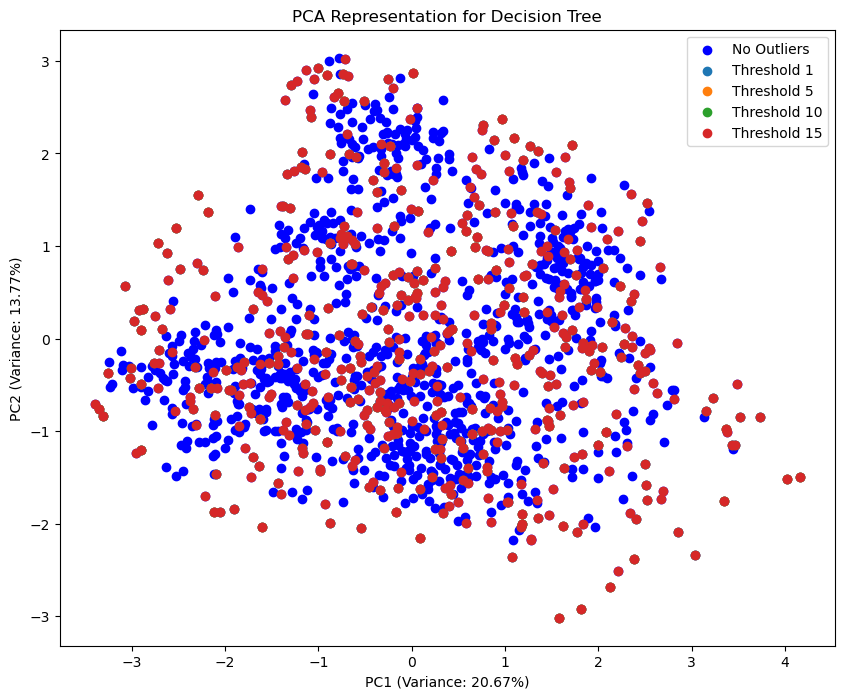

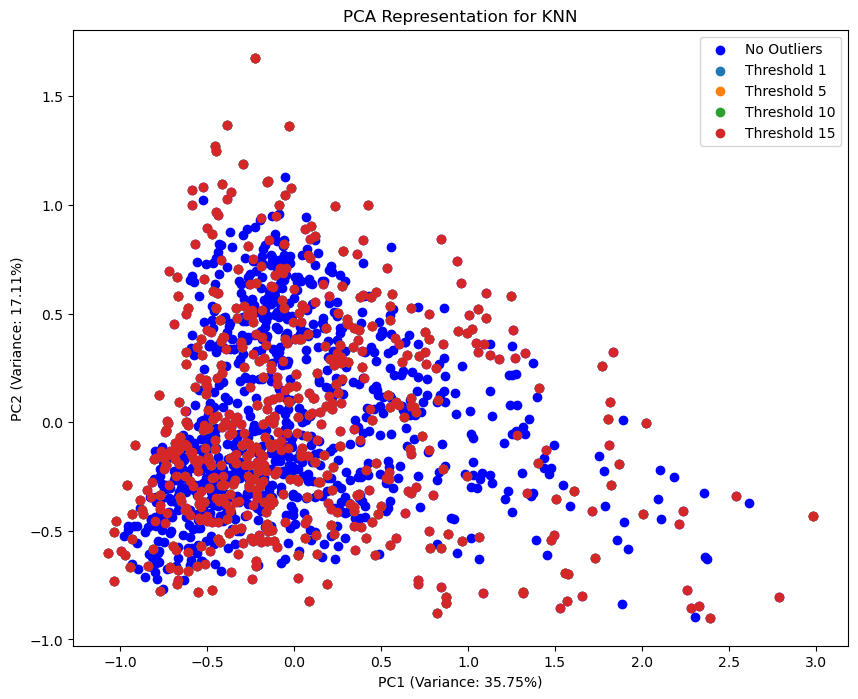

In [36]:
# FINAL

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the threshold values
threshold_values = [1, 5, 10, 15, None]  # None represents no outlier removal

# Create a table to store the results
results_table = pd.DataFrame(
    columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT', 'Train KNN', 'Test KNN'])

# Initialize a dictionary to store PCA points for each threshold elimination
pca_points_DT = {}
pca_points_KNN = {}

# Iterate over the threshold values
for threshold in threshold_values:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]
    inliers = np.where(in_degree > T)[0]

    # Remove the outliers from the training set for Decision Tree
    X_train_filtered_DT = X_train.iloc[inliers]
    y_train_filtered_DT = y_train.iloc[inliers]

    # Train a Decision Tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered_DT, y_train_filtered_DT)

    # Make predictions on the train set for Decision Tree
    y_train_pred_DT = dtc.predict(X_train)
    train_accuracy_DT = accuracy_score(y_train, y_train_pred_DT)

    # Make predictions on the test set for Decision Tree
    y_test_pred_DT = dtc.predict(X_test)
    test_accuracy_DT = accuracy_score(y_test, y_test_pred_DT)

    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]
    inliers_KNN = np.where(in_degree_KNN > T)[0]

    # Remove the outliers from the training set for KNN
    X_train_filtered_KNN = X_train_KNN.iloc[inliers_KNN]
    y_train_filtered_KNN = y_train_KNN.iloc[inliers_KNN]

    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_filtered_KNN, y_train_filtered_KNN)

    # Make predictions on the train set for KNN
    y_train_pred_KNN = knn.predict(X_train_KNN)
    train_accuracy_KNN = accuracy_score(y_train_KNN, y_train_pred_KNN)

    # Make predictions on the test set for KNN
    y_test_pred_KNN = knn.predict(X_test_KNN)
    test_accuracy_KNN = accuracy_score(y_test_KNN, y_test_pred_KNN)

    # Add the results to the table
    if threshold is not None:
        results_table = results_table.append({'Threshold Elim.': threshold,
                                              'Obs.': len(outliers),
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)
        # Store the PCA points for the current threshold elimination for Decision Tree
        pca_points_DT[threshold] = pca_data_DT[outliers]

        # Store the PCA points for the current threshold elimination for KNN
        pca_points_KNN[threshold] = pca_data_KNN[outliers_KNN]
    else:
        results_table = results_table.append({'Threshold Elim.': 'No',
                                              'Obs.': 0,
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)

# Print the table
print(results_table)

# Remove overlapping values from PCA points for KNN
pca_points_KNN[5] = np.unique(np.vstack((pca_points_KNN[5], pca_points_KNN[1])), axis=0)
pca_points_KNN[10] = np.unique(np.vstack((pca_points_KNN[10], pca_points_KNN[5])), axis=0)
pca_points_KNN[15] = np.unique(np.vstack((pca_points_KNN[15], pca_points_KNN[10])), axis=0)

# Remove overlapping values from PCA points for Decision Tree
pca_points_DT[5] = np.unique(np.vstack((pca_points_DT[5], pca_points_DT[1])), axis=0)
pca_points_DT[10] = np.unique(np.vstack((pca_points_DT[10], pca_points_DT[5])), axis=0)
pca_points_DT[15] = np.unique(np.vstack((pca_points_DT[15], pca_points_DT[10])), axis=0)

# Plot PCA representation for Decision Tree
plt.figure(figsize=(10, 8))
plt.scatter(pca_data_DT[:, 0], pca_data_DT[:, 1], color='blue', label='No Outliers')
for threshold, points in pca_points_DT.items():
    plt.scatter(points[:, 0], points[:, 1], label=f'Threshold {threshold}')
plt.title('PCA Representation for Decision Tree')
plt.xlabel(f'PC1 (Variance: {round(pca_DT.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PC2 (Variance: {round(pca_DT.explained_variance_ratio_[1] * 100, 2)}%)')
plt.legend()
plt.show()

# Plot PCA representation for KNN
plt.figure(figsize=(10, 8))
plt.scatter(pca_data_KNN[:, 0], pca_data_KNN[:, 1], color='blue', label='No Outliers')
for threshold, points in pca_points_KNN.items():
    plt.scatter(points[:, 0], points[:, 1], label=f'Threshold {threshold}')
plt.title('PCA Representation for KNN')
plt.xlabel(f'PC1 (Variance: {round(pca_KNN.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PC2 (Variance: {round(pca_KNN.explained_variance_ratio_[1] * 100, 2)}%)')
plt.legend()
plt.show()





# Final some more

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/3345914676.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/3345914676.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/3345914676.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/3345914676.py:88: FutureWarning: The frame.append method is deprecated and wi

  Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0             1.0   18.0  0.993435  0.657051   0.778264  0.748397
1             5.0   92.0  0.980306  0.706731   0.776076  0.750000
2            10.0  265.0  0.942378  0.684295   0.773888  0.745192
3            15.0  506.0  0.881109  0.639423   0.756382  0.740385
4              No    0.0  0.998541  0.647436   0.778264  0.748397


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/3345914676.py:100: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': 'No',


IndexError: index 2 is out of bounds for axis 0 with size 2

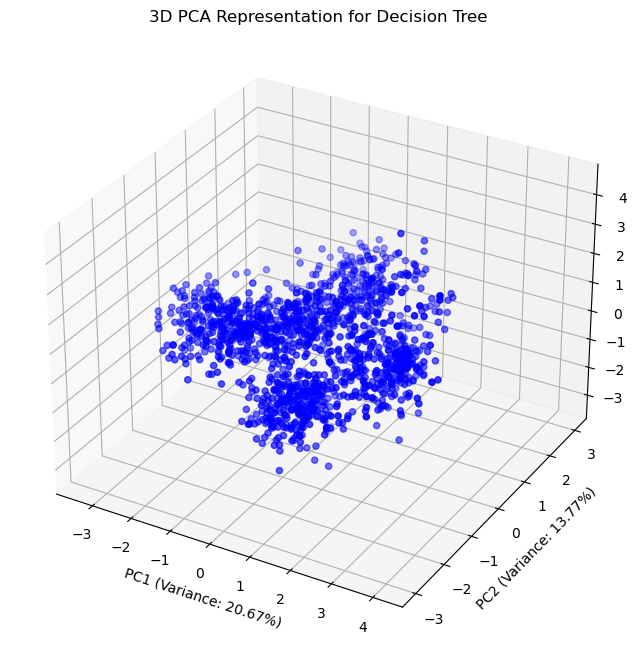

In [46]:
# FINAL

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the threshold values
threshold_values = [1, 5, 10, 15, None]  # None represents no outlier removal

# Create a table to store the results
results_table = pd.DataFrame(
    columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT', 'Train KNN', 'Test KNN'])

# Initialize a dictionary to store PCA points for each threshold elimination
pca_points_DT = {}
pca_points_KNN = {}

# Iterate over the threshold values
for threshold in threshold_values:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]
    inliers = np.where(in_degree > T)[0]

    # Remove the outliers from the training set for Decision Tree
    X_train_filtered_DT = X_train.iloc[inliers]
    y_train_filtered_DT = y_train.iloc[inliers]

    # Train a Decision Tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered_DT, y_train_filtered_DT)

    # Make predictions on the train set for Decision Tree
    y_train_pred_DT = dtc.predict(X_train)
    train_accuracy_DT = accuracy_score(y_train, y_train_pred_DT)

    # Make predictions on the test set for Decision Tree
    y_test_pred_DT = dtc.predict(X_test)
    test_accuracy_DT = accuracy_score(y_test, y_test_pred_DT)

    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]
    inliers_KNN = np.where(in_degree_KNN > T)[0]

    # Remove the outliers from the training set for KNN
    X_train_filtered_KNN = X_train_KNN.iloc[inliers_KNN]
    y_train_filtered_KNN = y_train_KNN.iloc[inliers_KNN]

    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_filtered_KNN, y_train_filtered_KNN)

    # Make predictions on the train set for KNN
    y_train_pred_KNN = knn.predict(X_train_KNN)
    train_accuracy_KNN = accuracy_score(y_train_KNN, y_train_pred_KNN)

    # Make predictions on the test set for KNN
    y_test_pred_KNN = knn.predict(X_test_KNN)
    test_accuracy_KNN = accuracy_score(y_test_KNN, y_test_pred_KNN)

    # Add the results to the table
    if threshold is not None:
        results_table = results_table.append({'Threshold Elim.': threshold,
                                              'Obs.': len(outliers),
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)
        # Store the PCA points for the current threshold elimination for Decision Tree
        pca_points_DT[threshold] = pca_data_DT[outliers]

        # Store the PCA points for the current threshold elimination for KNN
        pca_points_KNN[threshold] = pca_data_KNN[outliers_KNN]
    else:
        results_table = results_table.append({'Threshold Elim.': 'No',
                                              'Obs.': 0,
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)

# Print the table
print(results_table)

# Remove overlapping points from PCA points for Decision Tree
no_outliers_DT = np.vstack((pca_data_DT, pca_points_DT[1], pca_points_DT[5], pca_points_DT[10], pca_points_DT[15]))
no_outliers_DT = np.unique(no_outliers_DT, axis=0)
pca_points_DT[1] = np.setxor1d(pca_points_DT[1], no_outliers_DT)
pca_points_DT[5] = np.setxor1d(pca_points_DT[5], no_outliers_DT)
pca_points_DT[10] = np.setxor1d(pca_points_DT[10], no_outliers_DT)
pca_points_DT[15] = np.setxor1d(pca_points_DT[15], no_outliers_DT)

# Remove overlapping points from PCA points for KNN
no_outliers_KNN = np.vstack((pca_data_KNN, pca_points_KNN[1], pca_points_KNN[5], pca_points_KNN[10], pca_points_KNN[15]))
no_outliers_KNN = np.unique(no_outliers_KNN, axis=0)
pca_points_KNN[1] = np.setxor1d(pca_points_KNN[1], no_outliers_KNN)
pca_points_KNN[5] = np.setxor1d(pca_points_KNN[5], no_outliers_KNN)
pca_points_KNN[10] = np.setxor1d(pca_points_KNN[10], no_outliers_KNN)
pca_points_KNN[15] = np.setxor1d(pca_points_KNN[15], no_outliers_KNN)


# Reshape the points array to have three columns
pca_points_3d_DT = pca_data_DT.reshape(-1, 3)

# Plot 3D PCA representation for Decision Tree
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data_DT[:, 0], pca_data_DT[:, 1], pca_data_DT[:, 2], color='blue', label='No Outliers')
for threshold, points in pca_points_DT.items():
    if points.shape[0] == 3:
        points = points.reshape(-1, 3)
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], label=f'Threshold {threshold}')
    elif points.shape[0] == 2:
        points = points.reshape(-1, 2)
        ax.scatter(points[:, 0], points[:, 1], label=f'Threshold {threshold}')
ax.set_title('3D PCA Representation for Decision Tree')
ax.set_xlabel(f'PC1 (Variance: {round(pca_DT.explained_variance_ratio_[0] * 100, 2)}%)')
ax.set_ylabel(f'PC2 (Variance: {round(pca_DT.explained_variance_ratio_[1] * 100, 2)}%)')
if pca_data_DT.shape[1] >= 3:
    ax.set_zlabel(f'PC3 (Variance: {round(pca_DT.explained_variance_ratio_[2] * 100, 2)}%)')
else:
    ax.set_zlabel('PC3')
ax.legend()
plt.show()

# Plot 3D PCA representation for KNN
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data_KNN[:, 0], pca_data_KNN[:, 1], pca_data_KNN[:, 2], color='blue', label='No Outliers')
for threshold, points in pca_points_KNN.items():
    if points.shape[0] == 3:
        points = points.reshape(-1, 3)
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], label=f'Threshold {threshold}')
    elif points.shape[0] == 2:
        points = points.reshape(-1, 2)
        ax.scatter(points[:, 0], points[:, 1], label=f'Threshold {threshold}')
ax.set_title('3D PCA Representation for KNN')
ax.set_xlabel(f'PC1 (Variance: {round(pca_KNN.explained_variance_ratio_[0] * 100, 2)}%)')
ax.set_ylabel(f'PC2 (Variance: {round(pca_KNN.explained_variance_ratio_[1] * 100, 2)}%)')
if pca_data_KNN.shape[1] >= 3:
    ax.set_zlabel(f'PC3 (Variance: {round(pca_KNN.explained_variance_ratio_[2] * 100, 2)}%)')
else:
    ax.set_zlabel('PC3')
ax.legend()
plt.show()



/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/3735037460.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/3735037460.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/3735037460.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/3735037460.py:86: FutureWarning: The frame.append method is deprecated and wi

  Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0            15.0  506.0  0.881109  0.639423   0.756382  0.740385
1            10.0  265.0  0.942378  0.684295   0.773888  0.745192
2             5.0   92.0  0.980306  0.706731   0.776076  0.750000
3             1.0   18.0  0.993435  0.657051   0.778264  0.748397
4              No    0.0  0.998541  0.647436   0.778264  0.748397
PCA points for Decision Tree:


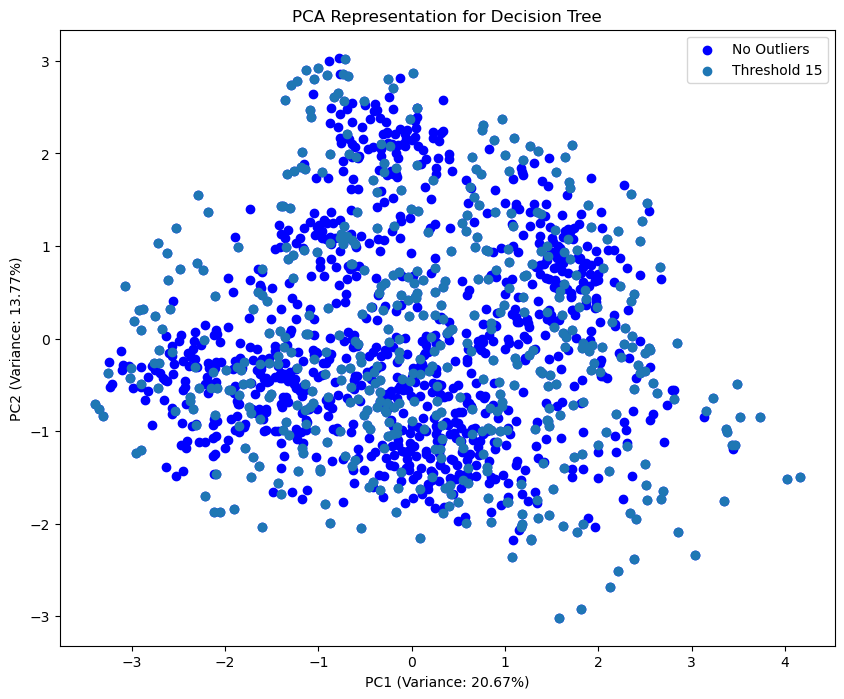

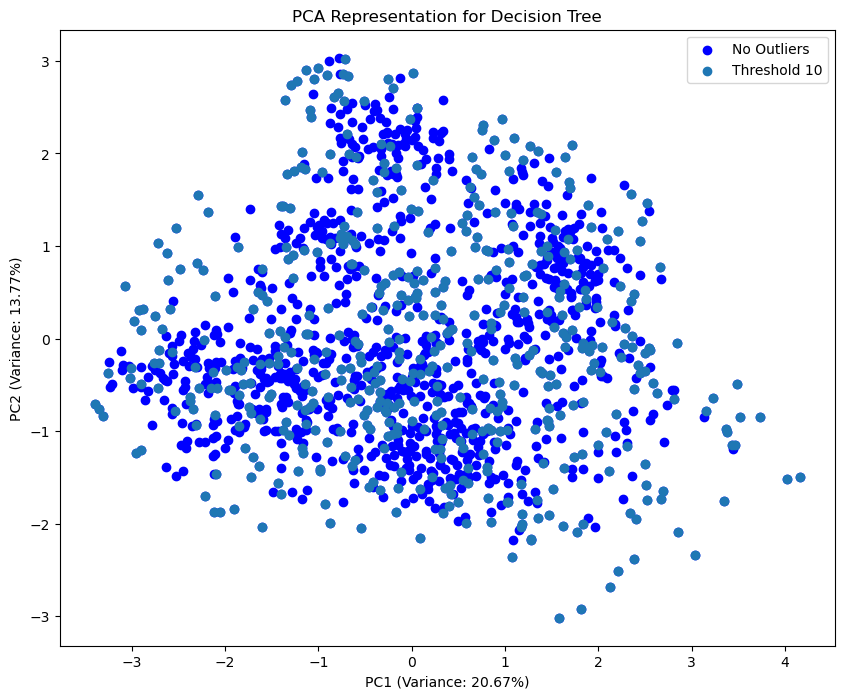

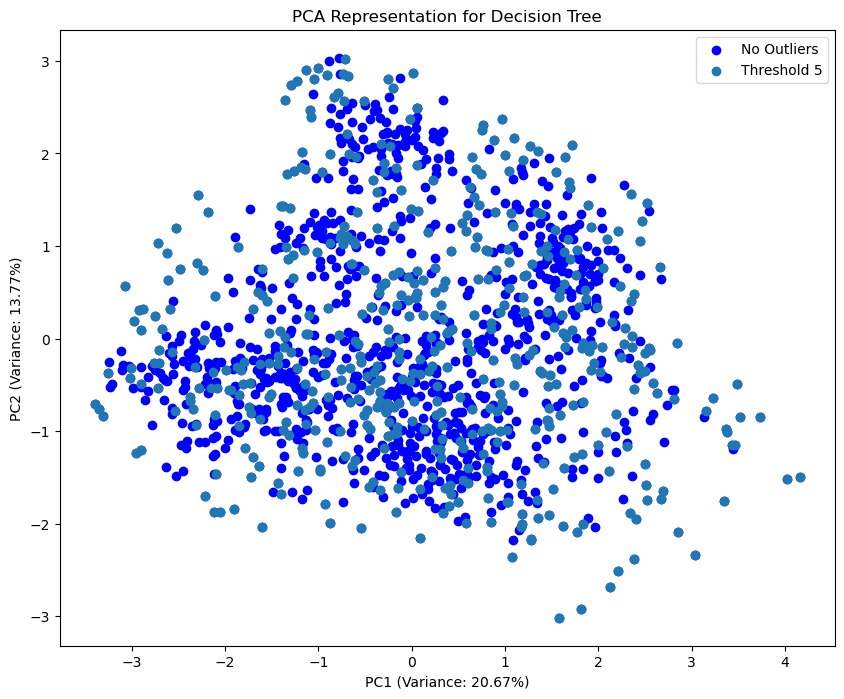

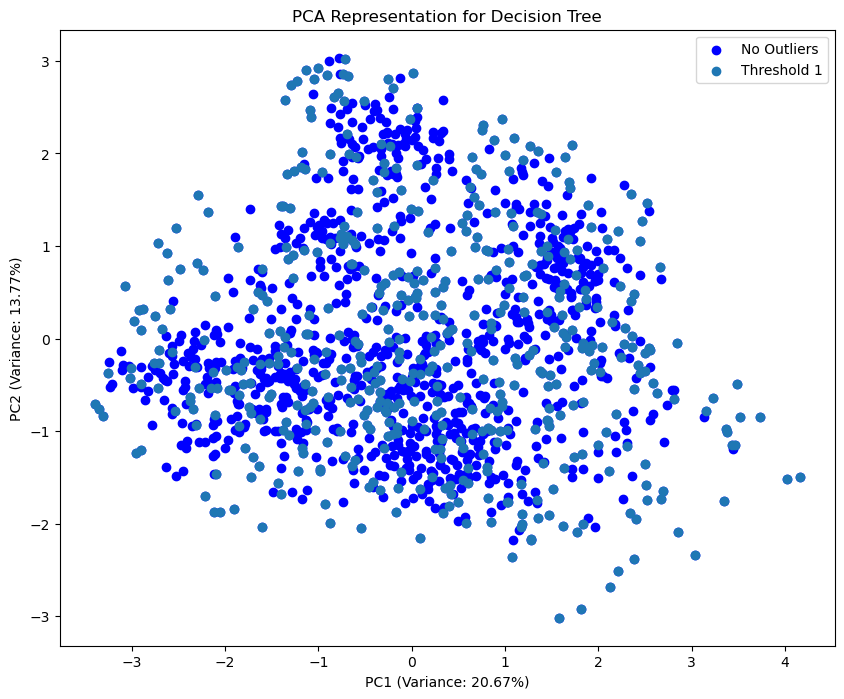

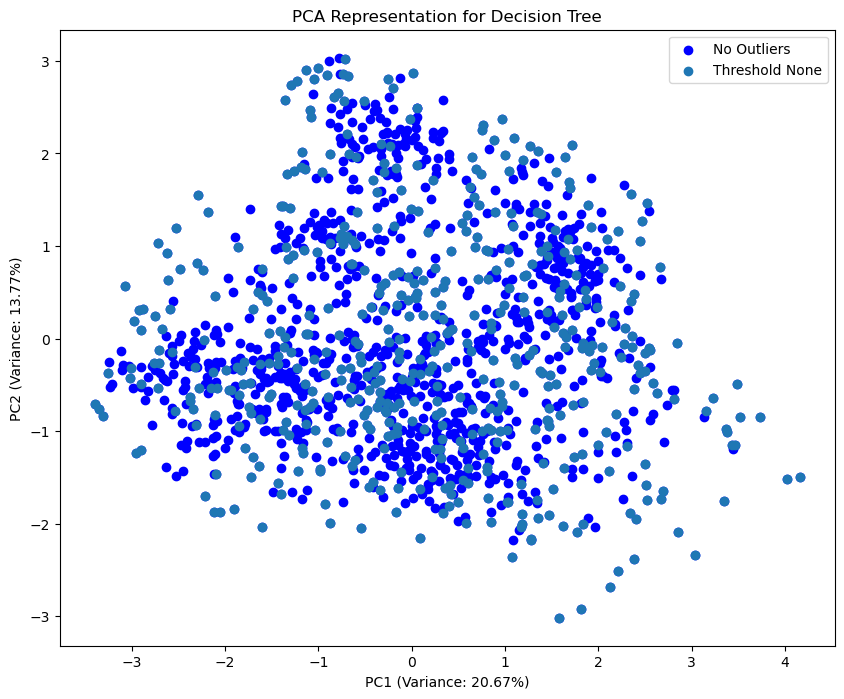

PCA points for KNN:


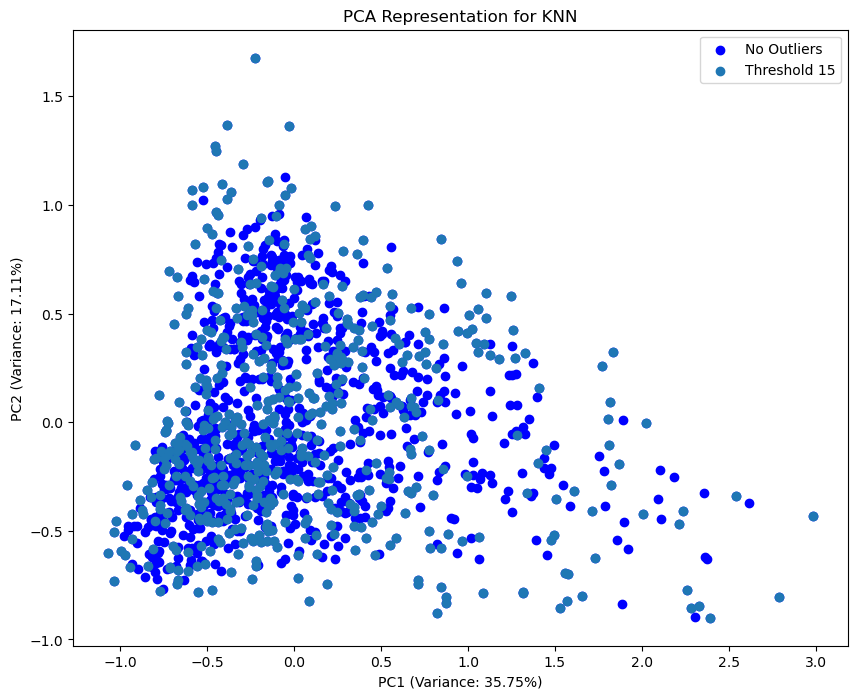

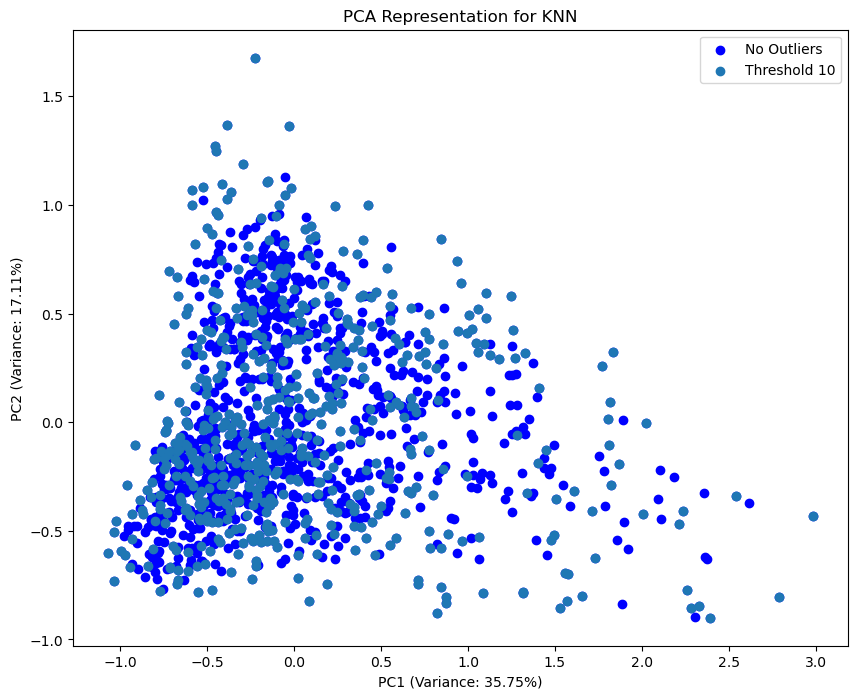

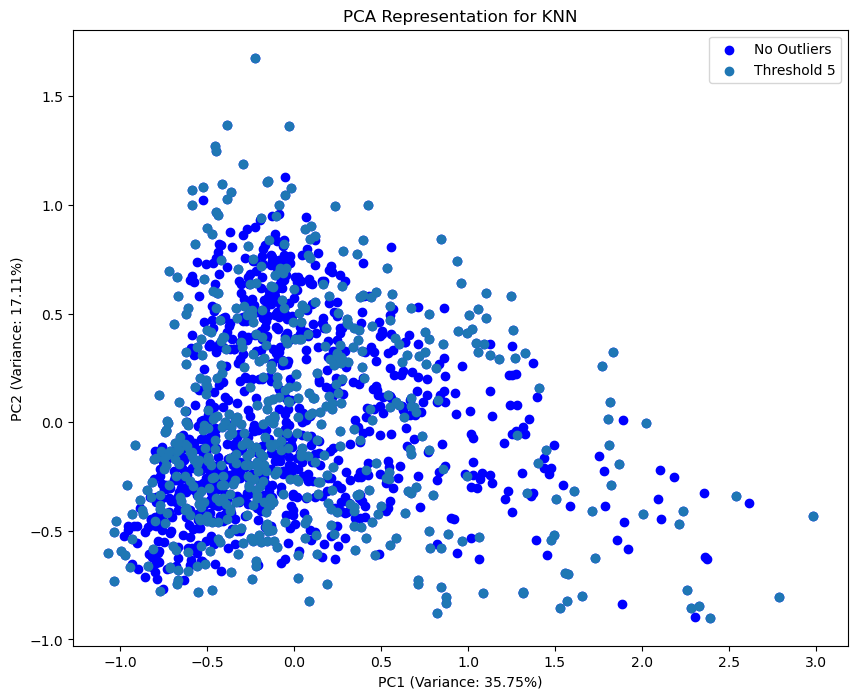

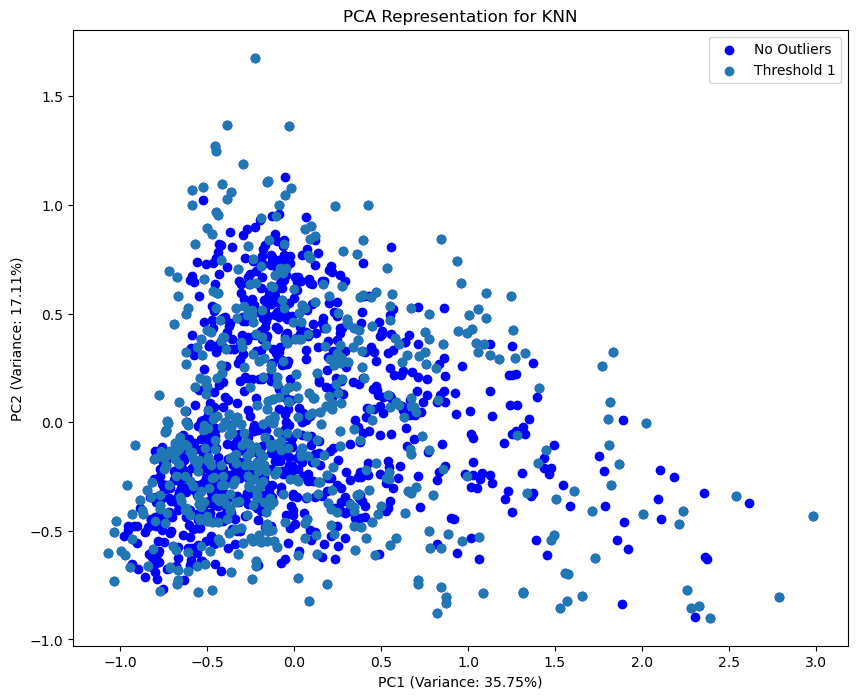

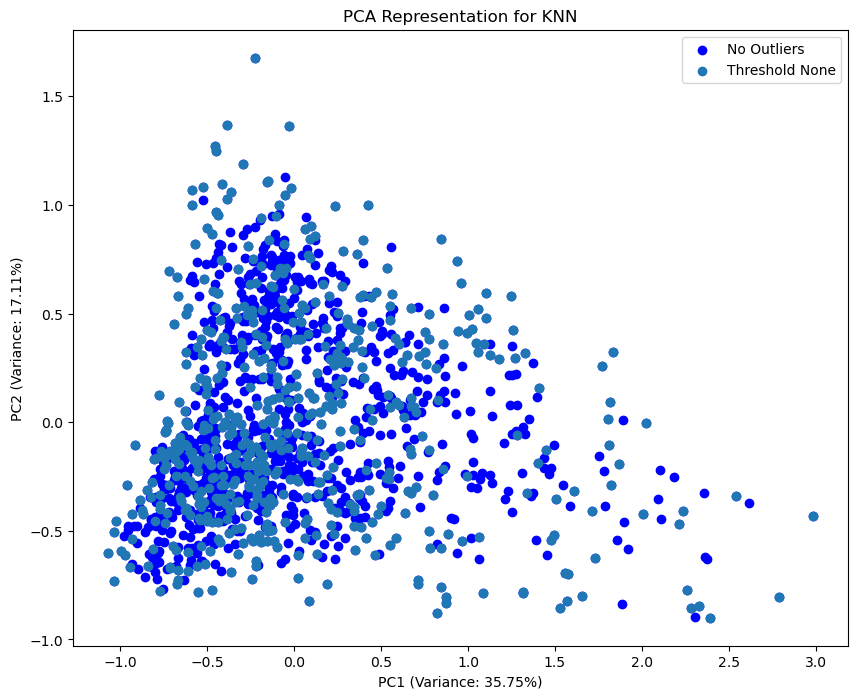

In [26]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the threshold values
threshold_values = [15, 10, 5, 1, None]  # None represents no outlier removal

# Create a table to store the results
results_table = pd.DataFrame(
    columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT', 'Train KNN', 'Test KNN'])

# Initialize a dictionary to store PCA points for each threshold elimination
pca_points_DT = {}
pca_points_KNN = {}

# Iterate over the threshold values
for threshold in threshold_values:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]
    inliers = np.where(in_degree > T)[0]

    # Remove the outliers from the training set for Decision Tree
    X_train_filtered_DT = X_train.iloc[inliers]
    y_train_filtered_DT = y_train.iloc[inliers]

    # Train a Decision Tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered_DT, y_train_filtered_DT)

    # Make predictions on the train set for Decision Tree
    y_train_pred_DT = dtc.predict(X_train)
    train_accuracy_DT = accuracy_score(y_train, y_train_pred_DT)

    # Make predictions on the test set for Decision Tree
    y_test_pred_DT = dtc.predict(X_test)
    test_accuracy_DT = accuracy_score(y_test, y_test_pred_DT)

    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]
    inliers_KNN = np.where(in_degree_KNN > T)[0]

    # Remove the outliers from the training set for KNN
    X_train_filtered_KNN = X_train_KNN.iloc[inliers_KNN]
    y_train_filtered_KNN = y_train_KNN.iloc[inliers_KNN]

    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_filtered_KNN, y_train_filtered_KNN)

    # Make predictions on the train set for KNN
    y_train_pred_KNN = knn.predict(X_train_KNN)
    train_accuracy_KNN = accuracy_score(y_train_KNN, y_train_pred_KNN)

    # Make predictions on the test set for KNN
    y_test_pred_KNN = knn.predict(X_test_KNN)
    test_accuracy_KNN = accuracy_score(y_test_KNN, y_test_pred_KNN)

    # Add the results to the table
    if threshold is not None:
        results_table = results_table.append({'Threshold Elim.': threshold,
                                              'Obs.': len(outliers),
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)
        # Store the PCA points for the current threshold elimination for Decision Tree
        pca_points_DT[threshold] = pca_data_outliers_DT

        # Store the PCA points for the current threshold elimination for KNN
        pca_points_KNN[threshold] = pca_data_outliers_KNN
    else:
        results_table = results_table.append({'Threshold Elim.': 'No',
                                              'Obs.': 0,
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)

# Print the table
print(results_table)

# Plot the PCA representation for Decision Tree
print("PCA points for Decision Tree:")
previous_points_DT = pca_data_DT
for threshold in threshold_values:
    points_DT = pca_points_DT.get(threshold, previous_points_DT)
    
    # Plot PCA representation for Decision Tree
    plt.figure(figsize=(10, 8))
    plt.scatter(pca_data_DT[:, 0], pca_data_DT[:, 1], color='blue', label='No Outliers')
    plt.scatter(points_DT[:, 0], points_DT[:, 1], label=f'Threshold {threshold}')
    plt.title('PCA Representation for Decision Tree')
    plt.xlabel(f'PC1 (Variance: {round(pca_DT.explained_variance_ratio_[0] * 100, 2)}%)')
    plt.ylabel(f'PC2 (Variance: {round(pca_DT.explained_variance_ratio_[1] * 100, 2)}%)')
    plt.legend()
    plt.show()
    
    previous_points_DT = points_DT

# Plot the PCA representation for KNN
print("PCA points for KNN:")
previous_points_KNN = pca_data_KNN
for threshold in threshold_values:
    points_KNN = pca_points_KNN.get(threshold, previous_points_KNN)
    
    # Plot PCA representation for KNN
    plt.figure(figsize=(10, 8))
    plt.scatter(pca_data_KNN[:, 0], pca_data_KNN[:, 1], color='blue', label='No Outliers')
    plt.scatter(points_KNN[:, 0], points_KNN[:, 1], label=f'Threshold {threshold}')
    plt.title('PCA Representation for KNN')
    plt.xlabel(f'PC1 (Variance: {round(pca_KNN.explained_variance_ratio_[0] * 100, 2)}%)')
    plt.ylabel(f'PC2 (Variance: {round(pca_KNN.explained_variance_ratio_[1] * 100, 2)}%)')
    plt.legend()
    plt.show()
    
    previous_points_KNN = points_KNN


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/155817526.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/155817526.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/155817526.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/155817526.py:86: FutureWarning: The frame.append method is deprecated and will b

  Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0             1.0   18.0  0.993435  0.657051   0.778264  0.748397
1             5.0   92.0  0.980306  0.706731   0.776076  0.750000
2            10.0  265.0  0.942378  0.684295   0.773888  0.745192
3            15.0  506.0  0.881109  0.639423   0.756382  0.740385
4              No    0.0  0.998541  0.647436   0.778264  0.748397


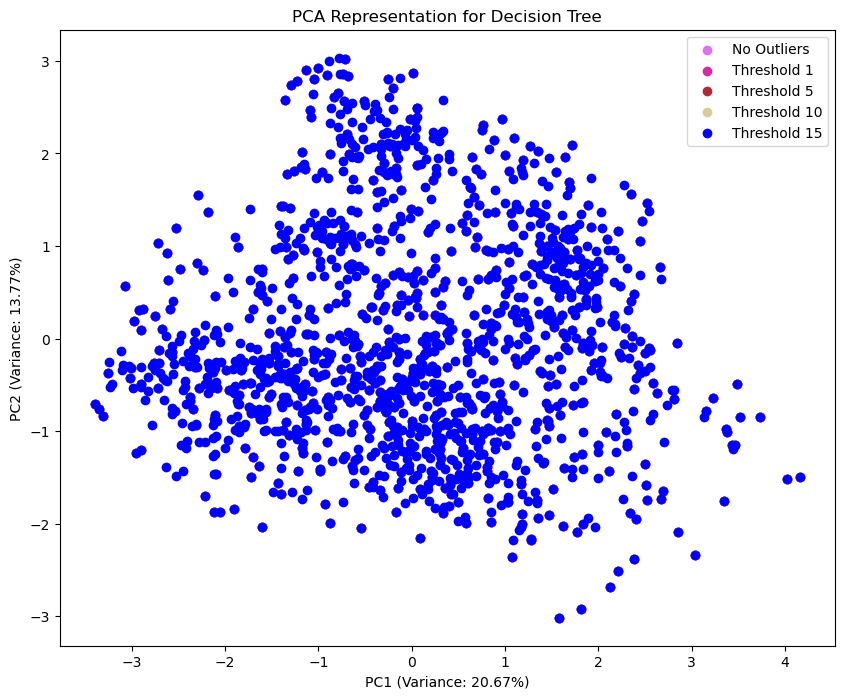

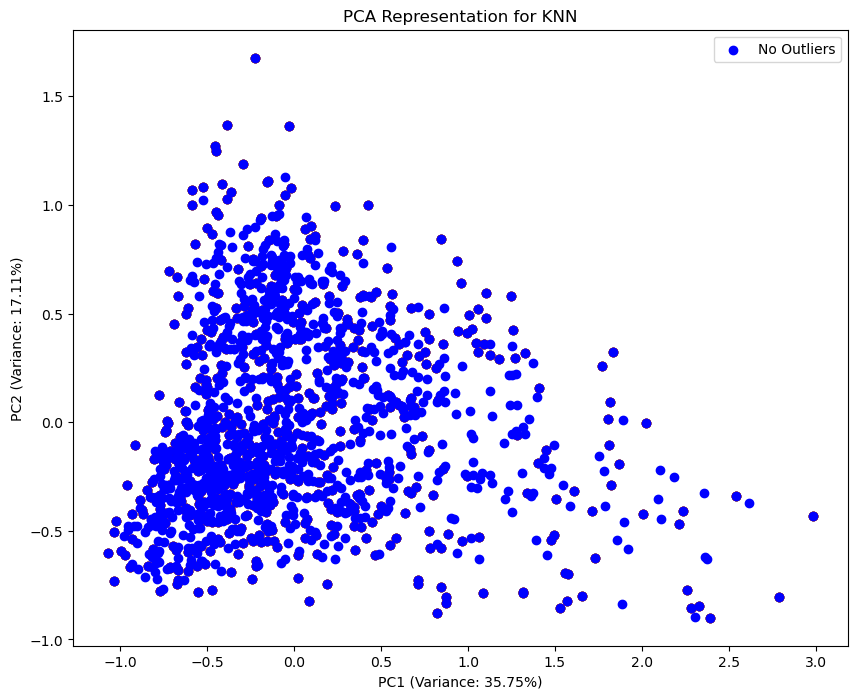

In [27]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the threshold values
threshold_values = [1, 5, 10, 15, None]  # None represents no outlier removal

# Create a table to store the results
results_table = pd.DataFrame(
    columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT', 'Train KNN', 'Test KNN'])

# Initialize a dictionary to store PCA points for each threshold elimination
pca_points_DT = {}
pca_points_KNN = {}

# Iterate over the threshold values
for threshold in threshold_values:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]
    inliers = np.where(in_degree > T)[0]

    # Remove the outliers from the training set for Decision Tree
    X_train_filtered_DT = X_train.iloc[inliers]
    y_train_filtered_DT = y_train.iloc[inliers]

    # Train a Decision Tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered_DT, y_train_filtered_DT)

    # Make predictions on the train set for Decision Tree
    y_train_pred_DT = dtc.predict(X_train)
    train_accuracy_DT = accuracy_score(y_train, y_train_pred_DT)

    # Make predictions on the test set for Decision Tree
    y_test_pred_DT = dtc.predict(X_test)
    test_accuracy_DT = accuracy_score(y_test, y_test_pred_DT)

    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]
    inliers_KNN = np.where(in_degree_KNN > T)[0]

    # Remove the outliers from the training set for KNN
    X_train_filtered_KNN = X_train_KNN.iloc[inliers_KNN]
    y_train_filtered_KNN = y_train_KNN.iloc[inliers_KNN]

    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_filtered_KNN, y_train_filtered_KNN)

    # Make predictions on the train set for KNN
    y_train_pred_KNN = knn.predict(X_train_KNN)
    train_accuracy_KNN = accuracy_score(y_train_KNN, y_train_pred_KNN)

    # Make predictions on the test set for KNN
    y_test_pred_KNN = knn.predict(X_test_KNN)
    test_accuracy_KNN = accuracy_score(y_test_KNN, y_test_pred_KNN)

    # Add the results to the table
    if threshold is not None:
        results_table = results_table.append({'Threshold Elim.': threshold,
                                              'Obs.': len(outliers),
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)
        # Store the PCA points for the current threshold elimination for Decision Tree
        pca_points_DT[threshold] = pca_data_outliers_DT

        # Store the PCA points for the current threshold elimination for KNN
        pca_points_KNN[threshold] = pca_data_outliers_KNN
    else:
        results_table = results_table.append({'Threshold Elim.': 'No',
                                              'Obs.': 0,
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)

# Print the table
print(results_table)

# Plot the PCA representation for Decision Tree
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'red', 'purple']
labels = ['No Outliers']
for threshold, points in pca_points_DT.items():
    colors.append(np.random.rand(3,))
    labels.append(f'Threshold {threshold}')
    plt.scatter(points[:, 0], points[:, 1], label=f'Threshold {threshold}', color=colors[-1])
plt.scatter(pca_data_DT[:, 0], pca_data_DT[:, 1], color='blue', label='No Outliers')
plt.title('PCA Representation for Decision Tree')
plt.xlabel(f'PC1 (Variance: {round(pca_DT.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PC2 (Variance: {round(pca_DT.explained_variance_ratio_[1] * 100, 2)}%)')
plt.legend(labels)
plt.show()

# Plot the PCA representation for KNN
plt.figure(figsize=(10, 8))
labels = ['No Outliers']
for threshold, points in pca_points_KNN.items():
    plt.scatter(points[:, 0], points[:, 1], label=f'Threshold {threshold}', color=colors.pop(0))
plt.scatter(pca_data_KNN[:, 0], pca_data_KNN[:, 1], color='blue', label='No Outliers')
plt.title('PCA Representation for KNN')
plt.xlabel(f'PC1 (Variance: {round(pca_KNN.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PC2 (Variance: {round(pca_KNN.explained_variance_ratio_[1] * 100, 2)}%)')
plt.legend(labels)
plt.show()


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/807580584.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/807580584.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/807580584.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/807580584.py:84: FutureWarning: The frame.append method is deprecated and will b

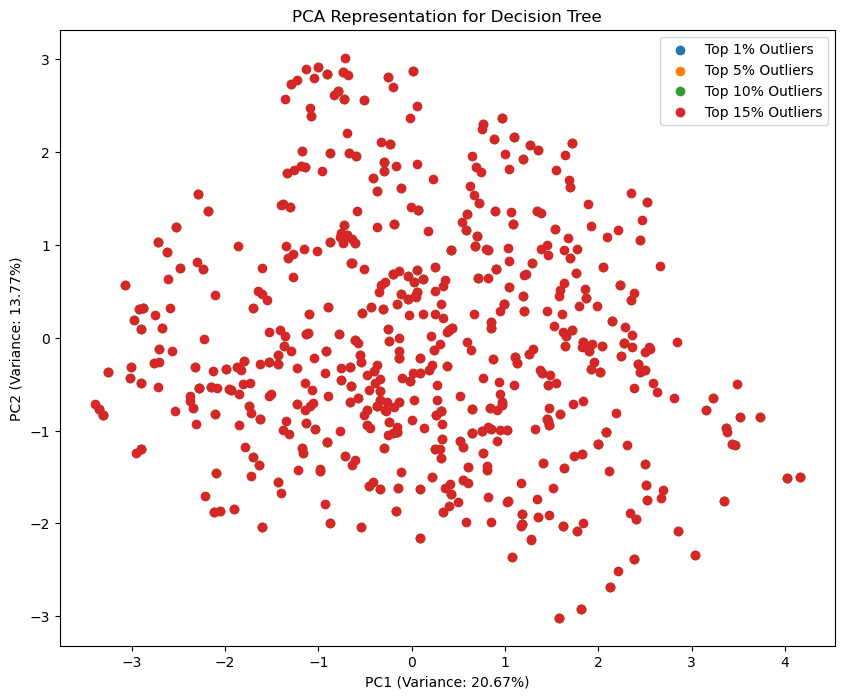

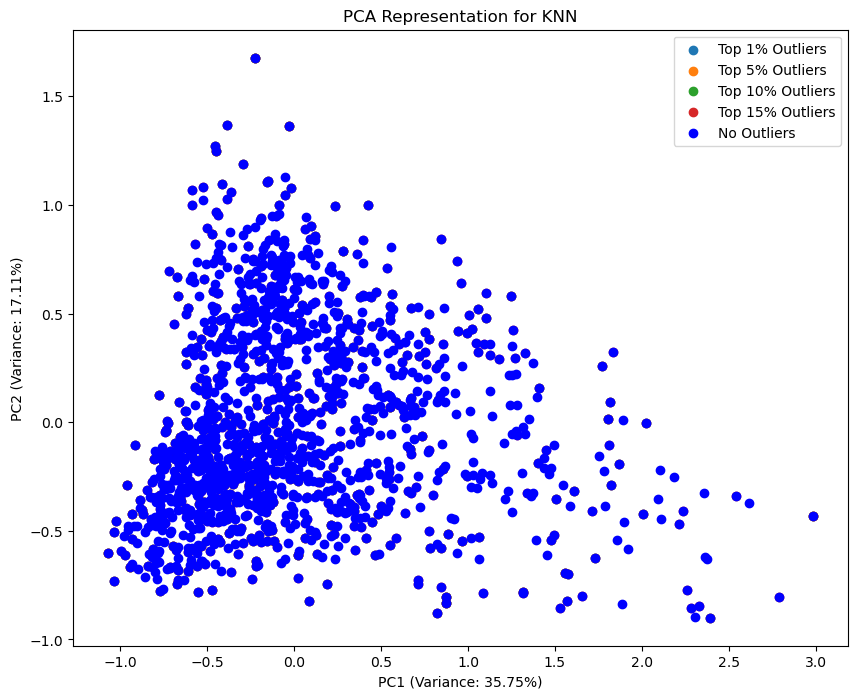

  Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0             1.0   18.0  0.993435  0.657051   0.778264  0.748397
1             5.0   92.0  0.980306  0.706731   0.776076  0.750000
2            10.0  265.0  0.942378  0.684295   0.773888  0.745192
3            15.0  506.0  0.881109  0.639423   0.756382  0.740385
4              No    0.0  0.998541  0.647436   0.778264  0.748397


In [18]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the threshold values
threshold_values = [1, 5, 10, 15, None]  # None represents no outlier removal

# Create a table to store the results
results_table = pd.DataFrame(columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT', 'Train KNN', 'Test KNN'])

# Define a dictionary to store the outlier points
outlier_points = {}

# Iterate over the threshold values
for threshold in threshold_values:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]
    inliers = np.where(in_degree > T)[0]

    # Remove the outliers from the training set for Decision Tree
    X_train_filtered_DT = X_train.iloc[inliers]
    y_train_filtered_DT = y_train.iloc[inliers]

    # Train a Decision Tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered_DT, y_train_filtered_DT)

    # Make predictions on the train set for Decision Tree
    y_train_pred_DT = dtc.predict(X_train)
    train_accuracy_DT = accuracy_score(y_train, y_train_pred_DT)

    # Make predictions on the test set for Decision Tree
    y_test_pred_DT = dtc.predict(X_test)
    test_accuracy_DT = accuracy_score(y_test, y_test_pred_DT)

    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]
    inliers_KNN = np.where(in_degree_KNN > T)[0]

    # Remove the outliers from the training set for KNN
    X_train_filtered_KNN = X_train_KNN.iloc[inliers_KNN]
    y_train_filtered_KNN = y_train_KNN.iloc[inliers_KNN]

    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_filtered_KNN, y_train_filtered_KNN)

    # Make predictions on the train set for KNN
    y_train_pred_KNN = knn.predict(X_train_KNN)
    train_accuracy_KNN = accuracy_score(y_train_KNN, y_train_pred_KNN)

    # Make predictions on the test set for KNN
    y_test_pred_KNN = knn.predict(X_test_KNN)
    test_accuracy_KNN = accuracy_score(y_test_KNN, y_test_pred_KNN)

    # Add the results to the table
    if threshold is not None:
        results_table = results_table.append({'Threshold Elim.': threshold,
                                              'Obs.': len(outliers),
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)
    else:
        results_table = results_table.append({'Threshold Elim.': 'No',
                                              'Obs.': 0,
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)

    # Store the outlier points for Decision Tree
    outlier_points_DT = X_train.iloc[outliers]
    outlier_points[f"DT_{threshold}"] = outlier_points_DT

    # Store the outlier points for KNN
    outlier_points_KNN = X_train_KNN.iloc[outliers_KNN]
    outlier_points[f"KNN_{threshold}"] = outlier_points_KNN

# Generate PCA representation for Decision Tree
pca_DT = PCA(n_components=2)
pca_data_DT = pca_DT.fit_transform(X_train)

# Generate PCA representation for KNN
pca_KNN = PCA(n_components=2)
pca_data_KNN = pca_KNN.fit_transform(X_train_KNN)

# Plot PCA representation for Decision Tree
plt.figure(figsize=(10, 8))

# Iterate over the threshold values
for threshold in threshold_values[:-1]:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]
    # Generate PCA representation for outliers
    pca_data_outliers_DT = pca_DT.transform(outlier_points[f"DT_{threshold}"])
    label = f'Top {threshold}% Outliers' if threshold is not None else 'All Outliers'
    plt.scatter(pca_data_outliers_DT[:, 0], pca_data_outliers_DT[:, 1], label=label)

plt.title('PCA Representation for Decision Tree')
plt.xlabel(f'PC1 (Variance: {round(pca_DT.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PC2 (Variance: {round(pca_DT.explained_variance_ratio_[1] * 100, 2)}%)')
plt.legend()
plt.show()


# Plot PCA representation for KNN
plt.figure(figsize=(10, 8))

# Iterate over the threshold values
for threshold in threshold_values[:-1]:
    K = 15
    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]

    # Generate PCA representation for outliers
    pca_data_outliers_KNN = pca_KNN.transform(outlier_points[f"KNN_{threshold}"])
    label = f'Top {threshold}% Outliers' if threshold is not None else 'All Outliers'
    plt.scatter(pca_data_outliers_KNN[:, 0], pca_data_outliers_KNN[:, 1], label=label)

plt.scatter(pca_data_KNN[:, 0], pca_data_KNN[:, 1], color='blue', label='No Outliers')

plt.title('PCA Representation for KNN')
plt.xlabel(f'PC1 (Variance: {round(pca_KNN.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PC2 (Variance: {round(pca_KNN.explained_variance_ratio_[1] * 100, 2)}%)')
plt.legend()
plt.show()


# Display the results table
print(results_table)


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/2944113949.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/2944113949.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/2944113949.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Threshold Elim.': threshold,
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_36895/2944113949.py:81: FutureWarning: The frame.append method is deprecated and wi

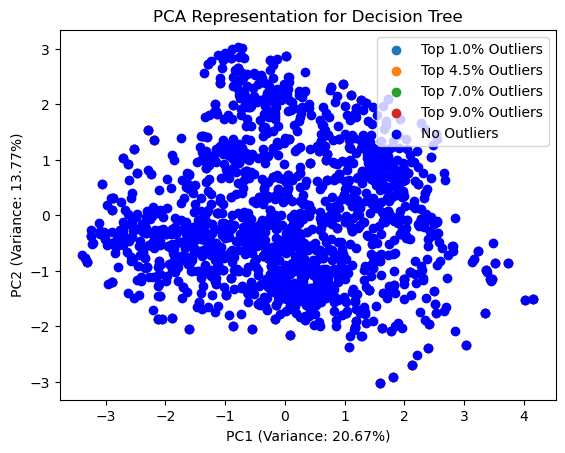

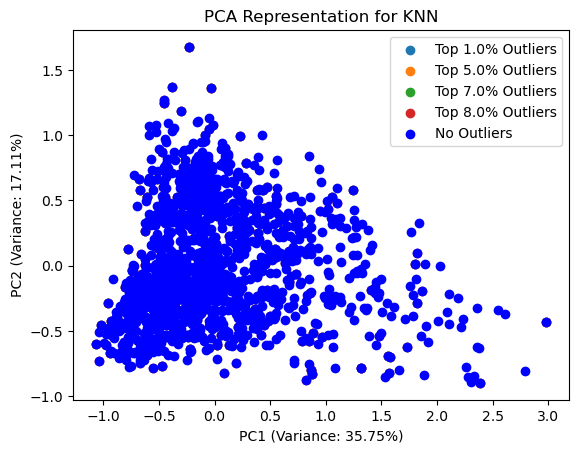

  Threshold Elim.   Obs.  Train DT   Test DT  Train KNN  Test KNN
0             1.0   18.0  0.993435  0.657051   0.778264  0.748397
1             5.0   92.0  0.980306  0.706731   0.776076  0.750000
2            10.0  265.0  0.942378  0.684295   0.773888  0.745192
3            15.0  506.0  0.881109  0.639423   0.756382  0.740385
4              No    0.0  0.998541  0.647436   0.778264  0.748397


In [15]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the threshold values
threshold_values = [1, 5, 10, 15, None]  # None represents no outlier removal

# Create a table to store the results
results_table = pd.DataFrame(columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT', 'Train KNN', 'Test KNN'])

# Iterate over the threshold values
for threshold in threshold_values:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold if threshold is not None else 0  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]
    inliers = np.where(in_degree > T)[0]

    # Remove the outliers from the training set for Decision Tree
    X_train_filtered_DT = X_train.iloc[inliers]
    y_train_filtered_DT = y_train.iloc[inliers]

    # Train a Decision Tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered_DT, y_train_filtered_DT)

    # Make predictions on the train set for Decision Tree
    y_train_pred_DT = dtc.predict(X_train)
    train_accuracy_DT = accuracy_score(y_train, y_train_pred_DT)

    # Make predictions on the test set for Decision Tree
    y_test_pred_DT = dtc.predict(X_test)
    test_accuracy_DT = accuracy_score(y_test, y_test_pred_DT)

    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]
    inliers_KNN = np.where(in_degree_KNN > T)[0]

    # Remove the outliers from the training set for KNN
    X_train_filtered_KNN = X_train_KNN.iloc[inliers_KNN]
    y_train_filtered_KNN = y_train_KNN.iloc[inliers_KNN]

    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_filtered_KNN, y_train_filtered_KNN)

    # Make predictions on the train set for KNN
    y_train_pred_KNN = knn.predict(X_train_KNN)
    train_accuracy_KNN = accuracy_score(y_train_KNN, y_train_pred_KNN)

    # Make predictions on the test set for KNN
    y_test_pred_KNN = knn.predict(X_test_KNN)
    test_accuracy_KNN = accuracy_score(y_test_KNN, y_test_pred_KNN)

    # Add the results to the table
    if threshold is not None:
        results_table = results_table.append({'Threshold Elim.': threshold,
                                              'Obs.': len(outliers),
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)
    else:
        results_table = results_table.append({'Threshold Elim.': 'No',
                                              'Obs.': 0,
                                              'Train DT': train_accuracy_DT,
                                              'Test DT': test_accuracy_DT,
                                              'Train KNN': train_accuracy_KNN,
                                              'Test KNN': test_accuracy_KNN}, ignore_index=True)

# Generate PCA representation for Decision Tree
pca_DT = PCA(n_components=2)
pca_data_DT = pca_DT.fit_transform(X_train)

# Generate PCA representation for KNN
pca_KNN = PCA(n_components=2)
pca_data_KNN = pca_KNN.fit_transform(X_train_KNN)

# Calculate threshold values based on percentiles
threshold_percentiles = [1, 5, 10, 100]
threshold_values = np.percentile(in_degree, threshold_percentiles)

# Iterate over the threshold values
for threshold in threshold_values:
    # Detect outliers based on in-degree threshold
    T = threshold  # in-degree threshold for outlier detection
    outliers = np.where(in_degree <= T)[0]

    # Generate PCA representation for outliers
    pca_data_outliers_DT = pca_DT.transform(X_train.iloc[outliers])
    label = f'Top {threshold}% Outliers'
    if len(outliers) > 0:
        plt.scatter(pca_data_outliers_DT[:, 0], pca_data_outliers_DT[:, 1], label=label)

# Plot No Outliers
plt.scatter(pca_data_DT[:, 0], pca_data_DT[:, 1], color='blue', label='No Outliers')

plt.title('PCA Representation for Decision Tree')
plt.xlabel(f'PC1 (Variance: {round(pca_DT.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PC2 (Variance: {round(pca_DT.explained_variance_ratio_[1] * 100, 2)}%)')
plt.legend()
plt.show()

# Repeat the same process for KNN
# Calculate threshold values based on percentiles
threshold_percentiles = [1, 5, 10, 100]
threshold_values = np.percentile(in_degree_KNN, threshold_percentiles)

# Iterate over the threshold values
for threshold in threshold_values:
    # Detect outliers based on in-degree threshold for KNN
    T = threshold  # in-degree threshold for outlier detection
    outliers_KNN = np.where(in_degree_KNN <= T)[0]

    # Generate PCA representation for outliers
    pca_data_outliers_KNN = pca_KNN.transform(X_train_KNN.iloc[outliers_KNN])
    label = f'Top {threshold}% Outliers'
    if len(outliers_KNN) > 0:
        plt.scatter(pca_data_outliers_KNN[:, 0], pca_data_outliers_KNN[:, 1], label=label)

# Plot No Outliers
plt.scatter(pca_data_KNN[:, 0], pca_data_KNN[:, 1], color='blue', label='No Outliers')

plt.title('PCA Representation for KNN')
plt.xlabel(f'PC1 (Variance: {round(pca_KNN.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PC2 (Variance: {round(pca_KNN.explained_variance_ratio_[1] * 100, 2)}%)')
plt.legend()
plt.show()





# Print the table
print(results_table)


In [16]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the threshold values
threshold_values = [1, 5, 10, 15]

# Create a table to store the results
results_table = pd.DataFrame(columns=['Threshold Elim.', 'Obs.', 'Train DT', 'Test DT', 'Train KNN', 'Test KNN'])

# Iterate over the threshold values
for threshold in threshold_values:
    # Calculate the in-degree of each vertex in the kNN graph for Decision Tree
    k = 20  # number of neighbors for kNN graph
    T = threshold  # in-degree threshold for outlier detection
    n = X_train.shape[0]  # number of vertices in graph
    graph = np.zeros((n, n))
    for i in range(n):
        distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
        neighbors = np.argsort(distances)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors:
            graph[i][j] = 1  # add directed edge from i to j
    in_degree = np.sum(graph, axis=0)

    # Detect outliers based on in-degree threshold
    outliers = np.where(in_degree <= T)[0]
    inliers = np.where(in_degree > T)[0]

    # Remove the outliers from the training set for Decision Tree
    X_train_filtered_DT = X_train.iloc[inliers]
    y_train_filtered_DT = y_train.iloc[inliers]

    # Train a Decision Tree classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train_filtered_DT, y_train_filtered_DT)

    # Make predictions on the train set for Decision Tree
    y_train_pred_DT = dtc.predict(X_train)
    train_accuracy_DT = accuracy_score(y_train, y_train_pred_DT)

    # Make predictions on the test set for Decision Tree
    y_test_pred_DT = dtc.predict(X_test)
    test_accuracy_DT = accuracy_score(y_test, y_test_pred_DT)

    # Calculate the in-degree of each vertex in the kNN graph for KNN
    n_KNN = X_train_KNN.shape[0]  # number of vertices in graph
    graph_KNN = np.zeros((n_KNN, n_KNN))
    for i in range(n_KNN):
        distances_KNN = np.linalg.norm(X_train_KNN - X_train_KNN.iloc[i], axis=1)
        neighbors_KNN = np.argsort(distances_KNN)[1:k + 1]  # exclude self as nearest neighbor
        for j in neighbors_KNN:
            graph_KNN[i][j] = 1  # add directed edge from i to j
    in_degree_KNN = np.sum(graph_KNN, axis=0)

    # Detect outliers based on in-degree threshold for KNN
    outliers_KNN = np.where(in_degree_KNN <= T)[0]
    inliers_KNN = np.where(in_degree_KNN > T)[0]

    # Remove the outliers from the training set for KNN
    X_train_filtered_KNN = X_train_KNN.iloc[inliers_KNN]
    y_train_filtered_KNN = y_train_KNN.iloc[inliers_KNN]

    # Train a KNN classifier
    knc = KNeighborsClassifier(n_neighbors=5)
    knc.fit(X_train_filtered_KNN, y_train_filtered_KNN)

    # Make predictions on the train set for KNN
    y_train_pred_KNN = knc.predict(X_train_KNN)
    train_accuracy_KNN = accuracy_score(y_train_KNN, y_train_pred_KNN)

    # Make predictions on the test set for KNN
    y_test_pred_KNN = knc.predict(X_test)
    test_accuracy_KNN = accuracy_score(y_test, y_test_pred_KNN)

    # Add the results to the results table
    results_table = results_table.append({'Threshold Elim.': threshold,
                                          'Obs.': len(outliers),
                                          'Train DT': train_accuracy_DT,
                                          'Test DT': test_accuracy_DT,
                                          'Train KNN': train_accuracy_KNN,
                                          'Test KNN': test_accuracy_KNN},
                                         ignore_index=True)

    # Generate PCA representation for Decision Tree
    pca_DT = PCA(n_components=2)
    pca_data_DT = pca_DT.fit_transform(X_train)

    # Generate PCA representation for KNN
    pca_KNN = PCA(n_components=2)
    pca_data_KNN = pca_KNN.fit_transform(X_train_KNN)

    # Scatter plot for Decision Tree
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(pca_data_DT[:, 0], pca_data_DT[:, 1], c=y_train, cmap='viridis', alpha=0.7, label='All Points')
    plt.title(f"Decision Tree (Threshold={threshold})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()

    # Scatter plot for KNN
    plt.subplot(1, 2, 2)
    plt.scatter(pca_data_KNN[:, 0], pca_data_KNN[:, 1], c=y_train_KNN, cmap='viridis', alpha=0.7, label='All Points')
    plt.title(f"KNN (Threshold={threshold})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

# Display the results table
print(results_table)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- emotion_1
- emotion_2
- emotion_3
- emotion_4
- emotion_5
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 386 features, but KNeighborsClassifier is expecting 50 features as input.